# 1. INTRODUCTION to **FPL**
**⚽ FPL (Fantasy Premier League)**: <br>
- A free	<span style="background-color:#665c00; color:white;">**online game**</span> where you manage a team of real-life **English Premier League** (*EPL*) players.
- Your team scores points based on how those players perform in actual matches.

**🎮 GAME RULES**:
- **Budget**: £100 million  
- **Squad**: 15 players (2 Goalkeepers, 5 Defenders, 5 Midfielder, 3 Fowarders)  
- **Max 3 players** from any one EPL team  
- **Weekly gameweeks** (GW): Set your starting 11, captain and vice-captain  
- **Points**: Earned from goals, assists, clean sheets; lost from cards (*yellow/red cards)*, missed penalties  

➡️➡️ FPL combines **real match** stats with strategy to build your team, plan your moves and compete all season long.

---

# 2. **OBJECTIVE** of this Analysis

- Utilize the raw dataset of 2024/25 FPL season to <span style="background-color:#665c00; color:white;">**analyze**</span> and <span style="background-color:#665c00; color:white;">**identify**</span> top-performing teams and players.
- Based on this analysis, <span style="background-color:#665c00; color:white;">**construct an optimal squad**</span> and **develop strategic insights** to approach the upcoming 2025/26 season effectively.
- Highlight key information such as *player value*, *total points* earned and individual *performance metrics*.

---

# 3. Analysis **INFORMATION**

- **Conducted by**: Tai Nguyen *(tainguyen0604@gmail.com)*
- **Period**: Jul 1st – Jul 27th, 2025 *(post-24/25 season, pre-25/26 season)*  
- **Contribution Breakdown**:  
  - Self-conducted: 60%  
  - AI-assisted: 30%  
  - Google research: 10%

---

# 4. **Table of contents**

In [2620]:
from IPython.display import Markdown
import re
import nbformat
import os

def generate_markdown_toc(notebook_path=None):
    # If no path is provided, use current path (open notebook)
    if notebook_path is None:
        notebook_path = os.path.basename(__file__) if '__file__' in globals() else None
        if notebook_path is None:
            print("Unable to automatically determine notebook path. Please pass it in manually.")
            return
    # Read notebook contents
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    toc = "## 📚 Table of Contents\n\n"
    for cell in nb.cells:
        if cell.cell_type == 'markdown':
            for line in cell.source.splitlines():
                m = re.match(r'^(#+)\s+(.*)', line)
                if m:
                    level = len(m.group(1))
                    title = m.group(2).strip()
                    # Create anchor: remove special characters, lowercase, replace spaces = "-"
                    anchor = re.sub(r'[^a-zA-Z0-9 ]', '', title).lower().replace(' ', '-')
                    toc += f"{'  ' * (level - 1)}- [{title}](#{anchor})\n"
    return Markdown(toc)
generate_markdown_toc("fpl_test.ipynb")

## 📚 Table of Contents

- [1. INTRODUCTION to **FPL**](#1-introduction-to-fpl)
- [2. **OBJECTIVE** of this Analysis](#2-objective-of-this-analysis)
- [3. Analysis **INFORMATION**](#3-analysis-information)
- [4. **Table of contents**](#4-table-of-contents)
- [5. Prepare **DATASET**](#5-prepare-dataset)
  - [5.1. Import **LIBRARY**](#51-import-library)
  - [5.2. **DOWNLOAD** raw dataset files into a folder](#52-download-raw-dataset-files-into-a-folder)
  - [5.3. **MERGE** files into 01 file](#53-merge-files-into-01-file)
  - [5.4. **IMPORT** merged file](#54-import-merged-file)
  - [5.5. **DATAFRAME** information](#55-dataframe-information)
    - [5.5.1. Dataframe **OVERVIEW**](#551-dataframe-overview)
      - [5.5.1.+ Import **TEAM ID** & joined with **DATAFRAME**](#551-import-team-id--joined-with-dataframe)
    - [5.5.2. Dataframe **DESCRIPTION**](#552-dataframe-description)
- [6. **TEAMs** analysis](#6-teams-analysis)
  - [6.1. Team **RANKING**](#61-team-ranking)
      - [6.1.+ Team dataframe **DESCRIPTION**](#61-team-dataframe-description)
  - [6.2. Team **AVERAGE POINT per GW**](#62-team-average-point-per-gw)
  - [6.3. Team **AVERAGE POINT per PLAYER**](#63-team-average-point-per-player)
  - [6.4. Team **BEST PLAYERS**](#64-team-best-players)
    - [6.4.+ Visualize team **BEST PLAYERS**](#64-visualize-team-best-players)
  - [6.5. **BEST** and **WORST** teams](#65-best-and-worst-teams)
  - [6.6. **THE BEST TEAM** Performance](#66-the-best-team-performance)
    - [6.6.+ Visualize **THE BEST TEAM** GW by GW](#66-visualize-the-best-team-gw-by-gw)
- [7. **PLAYERs** analysis](#7-players-analysis)
  - [7.1. Player **SELECTION DISTRIBUTION** by player value](#71-player-selection-distribution-by-player-value)
  - [7.2. **BEST** players](#72-best-players)
    - [7.2.1 Player dataframe **DESCRIPTION**](#721-player-dataframe-description)
    - [5.5.1. Dataframe **OVERVIEW**](#551-dataframe-overview)
    - [7.2.2 **BEST PLAYERs**](#722-best-players)
    - [7.2.3 Visualize **BEST 20 PLAYERs**](#723-visualize-best-20-players)
  - [7.3. **MOST VALUED** players](#73-most-valued-players)
  - [7.4. **MOST EFFECTIVE** players](#74-most-effective-players)
  - [7.5. **MOST INEFFECTIVE** players](#75-most-ineffective-players)
  - [7.6. **The MVP** performance](#76-the-mvp-performance)
      - [7.6.+ **The MVP performance** GW by GW](#76-the-mvp-performance-gw-by-gw)
  - [7.7. Best players of **EACH POSITION**](#77-best-players-of-each-position)
    - [7.7.+ Visualize top 10 players of **EACH POSITION**](#77-visualize-top-10-players-of-each-position)
  - [7.8. **DREAM TEAM**](#78-dream-team)
- [8. Build **YOUR FPL TEAM**](#8-build-your-fpl-team)
  - [8.1 **BUILD** your team](#81-build-your-team)
  - [8.2. **VISUALIZE** your team](#82-visualize-your-team)
  - [8.3. Your team **DATAFRAME**](#83-your-team-dataframe)
    - [8.3.+ Your team add-on **CAPTAIN** & **CHIPS**](#83-your-team-addon-captain--chips)
  - [8.4. Your team **PERFORMANCE**](#84-your-team-performance)
    - [8.4.+ Visualize your team **PERFORMANCE**](#84-visualize-your-team-performance)
  - [8.5. Your team **LINE-UP**](#85-your-team-lineup)
  - [8.6. Your team **STATS**](#86-your-team-stats)
- [9. Build a **PERFECT TEAM** automatically *( *** pending...)*](#9-build-a-perfect-team-automatically---pending)
  - [9.1. **PLAN** to build an **AUTOMATED** GW-by-GW team](#91-plan-to-build-an-automated-gwbygw-team)
  - [9.2. **MODEL BUILDING**](#92-model-building)
    - [9.2.1. **Squad initialization** (GW01)](#921-squad-initialization-gw01)
    - [9.2.2. **GW looping** (GW02 to GW38)](#922-gw-looping-gw02-to-gw38)
      - [8.3.2.+ **Team overall tracking**](#832-team-overall-tracking)
- [*** **THE END** ***](#-the-end-)


---

# 5. Prepare **DATASET**

## 5.1. Import **LIBRARY**

In [72]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

---

## 5.2. **DOWNLOAD** raw dataset files into a folder

- The raw datasets are provided for each **Gameweek** (GW) during the 24/25 FPL season.  
- To perform a comprehensive analysis, all GW datasets were downloaded individually and merged into a single consolidated dataset.


In [1483]:
# Create a folder if doesn't exist
save_folder = "gws_2024_25"
os.makedirs(save_folder, exist_ok=True)

# Base URL
base_url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2024-25/gws/"

# Download file from gw1.csv to gw38.csv
for i in range(1, 39):
    file_name = f"gw{i}.csv"
    url = base_url + file_name
    save_path = os.path.join(save_folder, file_name)

    print(f"Downloading: {file_name}...", end=" ")
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, "wb") as f:
            f.write(response.content)
        print("Download completed file.")
    else:
        print(f"Error ({response.status_code})")

print("Download completed all files.")

Downloading: gw1.csv... Download completed file.
Downloading: gw2.csv... Download completed file.
Downloading: gw3.csv... Download completed file.
Downloading: gw4.csv... Download completed file.
Downloading: gw5.csv... Download completed file.
Downloading: gw6.csv... Download completed file.
Downloading: gw7.csv... Download completed file.
Downloading: gw8.csv... Download completed file.
Downloading: gw9.csv... Download completed file.
Downloading: gw10.csv... Download completed file.
Downloading: gw11.csv... Download completed file.
Downloading: gw12.csv... Download completed file.
Downloading: gw13.csv... Download completed file.
Downloading: gw14.csv... Download completed file.
Downloading: gw15.csv... Download completed file.
Downloading: gw16.csv... Download completed file.
Downloading: gw17.csv... Download completed file.
Downloading: gw18.csv... Download completed file.
Downloading: gw19.csv... Download completed file.
Downloading: gw20.csv... Download completed file.
Downloadi

---

## 5.3. **MERGE** files into 01 file

In [1484]:
# Get the list of 38 files
file_paths = [os.path.join(save_folder, f"gw{i}.csv") for i in range(1, 39)]

# Dataframe for 38 files
dfs = []

# Read 38 files
for i, path in enumerate(file_paths, start=1):
    try:
        df = pd.read_csv(path)
        df["gw"] = i  # Thêm cột Gameweek
        dfs.append(df)
    except Exception as e:
        print(f"Error getting the file {path}: {e}")

# Merge 38 files to 01 dataframe
merged_df = pd.concat(dfs, ignore_index=True)

# Save dataframe to 01 file
output_path = os.path.join(save_folder, "merged_gw.csv")

# Save as CSV
merged_df.to_csv(output_path, index=False)

print("Merge completed! File saved as: merged_gw.csv")

Merge completed! File saved as: merged_gw.csv


---

## 5.4. **IMPORT** merged file

In [2529]:
df = pd.read_csv('/Users/tainguyen/Desktop/Python/gws_2024_25/merged_gw.csv')

---

## 5.5. **DATAFRAME** information

### 5.5.1. Dataframe **OVERVIEW**

In [2530]:
# Remove "Manager" position out of dataframe
df = df[df["position"] != "AM"]

# Change "value" to match reality
df['value'] = df['value']/10 # type: ignore
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 27283 entries, 0 to 27604
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        27283 non-null  object 
 1   position                    27283 non-null  object 
 2   team                        27283 non-null  object 
 3   xP                          27283 non-null  float64
 4   assists                     27283 non-null  int64  
 5   bonus                       27283 non-null  int64  
 6   bps                         27283 non-null  int64  
 7   clean_sheets                27283 non-null  int64  
 8   creativity                  27283 non-null  float64
 9   element                     27283 non-null  int64  
 10  expected_assists            27283 non-null  float64
 11  expected_goal_involvements  27283 non-null  float64
 12  expected_goals              27283 non-null  float64
 13  expected_goals_conceded     27283 no

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,modified,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,mng_clean_sheets,mng_draw,mng_goals_scored,mng_loss,mng_underdog_draw,mng_underdog_win,mng_win
0,Alex Scott,MID,Bournemouth,2,0,0,11,0,13,77,0,0,0,1,6,1,0,4,23,2024-08-17T14:00:00Z,62,False,16,0,0,0,0,1,0,4339,1,1,1,0,2,0,0,0,5,False,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2,0,0,0,0,0,427,0,0,0,0,6,0,0,0,0,2024-08-17T14:00:00Z,0,False,3,0,0,0,0,1,0,33324,0,1,1,0,0,0,0,0,4,True,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tomiyasu Takehiro,DEF,Arsenal,0,0,0,0,0,0,22,0,0,0,0,2,0,0,0,0,2024-08-17T14:00:00Z,0,False,20,0,0,0,0,1,0,8462,0,0,2,0,0,0,0,0,5,True,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malcolm Ebiowei,MID,Crystal Palace,0,0,0,0,0,0,197,0,0,0,0,8,0,0,0,0,2024-08-18T13:00:00Z,0,False,4,0,0,0,0,1,0,716,0,1,2,0,0,0,0,0,4,False,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ben Brereton Díaz,MID,Southampton,1,0,0,-2,0,14,584,0,0,0,0,5,1,0,3,3,2024-08-17T14:00:00Z,70,False,15,0,0,0,0,1,0,66244,1,0,1,16,1,0,0,0,6,False,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27598,Tawanda Chirewa,MID,Wolves,0,0,0,0,0,0,538,0,0,0,0,380,0,0,0,0,2025-05-25T15:00:00Z,0,False,4,0,0,0,0,38,0,2486,0,1,1,0,0,-4,0,4,4,True,0,38,0,0,0,0,0,0,0
27599,Cameron Humphreys,MID,Ipswich,0,0,0,0,0,0,273,0,0,0,0,373,0,0,0,0,2025-05-25T15:00:00Z,0,False,19,0,0,0,0,38,0,1201,0,3,1,0,0,-9,0,9,4,True,0,38,0,0,0,0,0,0,0
27600,Ashley Young,DEF,Everton,3,0,0,23,1,25,238,0,0,0,1,376,0,0,4,14,2025-05-25T15:00:00Z,90,False,15,0,0,0,0,38,0,162239,1,1,0,0,5,-1971,3037,5008,4,False,1,38,0,0,0,0,0,0,0
27601,Somto Boniface,DEF,Ipswich,-0,0,0,0,0,0,799,0,0,0,0,373,0,0,0,0,2025-05-25T15:00:00Z,0,False,19,0,0,0,0,38,0,518,0,3,1,0,0,64,177,113,4,True,0,38,0,0,0,0,0,0,0


#### 5.5.1.+ Import **TEAM ID** & joined with **DATAFRAME**

In [2535]:
team_id = pd.read_csv('/Users/tainguyen/Desktop/Python/gws_2024_25/fpl_team_id.csv')
df = df.merge(team_id, left_on="opponent_team", right_on="Team_id", how="left", suffixes=('', '_opponent'))
df = df.rename(columns={"Team_id": "opponent_team_id","Team_name": "opponent_team_name","Team_code":"opponent_team_code"})
df = df.merge(team_id, left_on="team", right_on="Team_name", how="left", suffixes=('', '_team'))
df = df.rename(columns={"Team_id": "team_id","Team_name": "team_name","Team_code":"team_code"})
df.head(5)

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,modified,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gw,mng_clean_sheets,mng_draw,mng_goals_scored,mng_loss,mng_underdog_draw,mng_underdog_win,mng_win,opponent_team_id,opponent_team_name,opponent_team_code,team_id,team_name,team_code
0,Alex Scott,MID,Bournemouth,2,0,0,11,0,13,77,0,0,0,1,6,1,0,4,23,2024-08-17T14:00:00Z,62,False,16,0,0,0,0,1,0,4339,1,1,1,0,2,0,0,0,5,False,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,Nott'm Forest,NFO,3,Bournemouth,BOU
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2,0,0,0,0,0,427,0,0,0,0,6,0,0,0,0,2024-08-17T14:00:00Z,0,False,3,0,0,0,0,1,0,33324,0,1,1,0,0,0,0,0,4,True,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Bournemouth,BOU,16,Nott'm Forest,NFO
2,Tomiyasu Takehiro,DEF,Arsenal,0,0,0,0,0,0,22,0,0,0,0,2,0,0,0,0,2024-08-17T14:00:00Z,0,False,20,0,0,0,0,1,0,8462,0,0,2,0,0,0,0,0,5,True,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,Wolves,WOL,1,Arsenal,ARS
3,Malcolm Ebiowei,MID,Crystal Palace,0,0,0,0,0,0,197,0,0,0,0,8,0,0,0,0,2024-08-18T13:00:00Z,0,False,4,0,0,0,0,1,0,716,0,1,2,0,0,0,0,0,4,False,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Brentford,BRE,7,Crystal Palace,CRY
4,Ben Brereton Díaz,MID,Southampton,1,0,0,-2,0,14,584,0,0,0,0,5,1,0,3,3,2024-08-17T14:00:00Z,70,False,15,0,0,0,0,1,0,66244,1,0,1,16,1,0,0,0,6,False,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,Newcastle,NEW,17,Southampton,SOU


>##### **TRANSFORM** dataframe
> - After checking the dataset quickly, we found that it includes not only players (*GK, DEF, MID, FWD*) but also **managers** (with position code: AM). Since this analysis is only about players, we <span style="background-color:#665c00; color:white;">**removed all rows with AM**</span> from the dataset.
>
> - Also, the player `value` in the data are **10 times higher** than the real values in the FPL game. For example, if a player costs £5.0 in the game, the data shows `50.0`. So, we fixed this by <span style="background-color:#665c00; color:white;">**dividing all player values by 10**</span>.
> - In addition, we noticed a column `opponent_team`, but it only contains the ID of the team (from 1 to 20, sorted alphabetically by `team` name). Therefore, we decided to <span style="background-color:#665c00; color:white;">join the raw dataframe with *AN EXTERNAL TABLE*</span> to identify the actual team name of the opponent_team.  
> This external table is also used to determine the `team_code` of the player's own club, which will be useful for further analysis.
>
> ##### Dataframe **SUMMARY**:
> - **Total entries (rows)**: 27,283  
>
> - **Total columns**: 49  
> - **Index range**: 0 to 27,604 *(Note: There are gaps because of removed rows)*  
> ##### Column **types**:
> - `object` (text): 4 columns  
>
> - `int64` (integers): 26 columns  
> - `float64` (decimals): 17 columns  
> - `bool`: 2 columns  
> ##### **Key** columns:
> - `element`: Player ID (unique)
>
> - `name`, `position`, `team`, `team_code`: Basic player and player's own club info
> - `opponent_team_name`, `opponent_team_code`: Basic opponent info
> - `goals_scored`, `assists`, `clean_sheets`, `ict_index`, `influence`,`creativity`, `threat`: Performance stats
> - `gw`: **Gameweek** – Represents the gameweek number. *A team may have multiple fixtures in a single gameweek (e.g. double gameweeks), or in some cases, no fixture at all, resulting in missing values (`NaN`) for that team in that gameweek.*
> - `fixture`: **Fixture round** – Refers to the actual match round within the gameweek. *Each fixture has a unique ID representing a specific match.*
> - `expected_goals`, `expected_assists`, `bps`: Advanced metrics  

---

### 5.5.2. Dataframe **DESCRIPTION**

In [2537]:
# Show all columns of dataframe
pd.set_option('display.max_columns', None)

# Describe dataframe
describe = df.describe()

# Format number
formatted_describe = describe.applymap(lambda x: f"{x:,.2f}")
formatted_describe

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/970731006.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,gw,mng_clean_sheets,mng_draw,mng_goals_scored,mng_loss,mng_underdog_draw,mng_underdog_win,mng_win,opponent_team_id,team_id
count,"27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","27,283.00","13,105.00","13,105.00","13,105.00","13,105.00","13,105.00","13,105.00","13,105.00","27,283.00","27,283.00"
mean,1.06,0.04,0.09,4.75,0.08,4.31,361.61,0.03,0.07,0.04,0.44,197.97,0.45,0.04,1.46,6.34,27.43,10.51,0.00,0.00,0.00,0.00,20.26,0.09,"230,025.46",0.31,1.42,1.52,3.92,1.15,923.39,"15,764.24","14,840.63",4.91,0.06,20.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.51,10.45
std,1.81,0.20,0.44,9.34,0.27,10.15,210.98,0.08,0.18,0.14,0.75,109.23,0.91,0.21,2.71,12.18,38.05,5.76,0.04,0.02,0.02,0.04,10.91,0.60,"652,376.67",0.46,1.19,1.28,10.38,2.31,"76,642.41","64,858.88","56,868.30",1.04,0.23,10.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.76,5.85
min,-2.20,0.00,0.00,-25.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,"-2,741,008.00",0.00,0.00,3.80,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,104.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,11.00,0.00,"4,657.00",0.00,1.00,1.00,0.00,0.00,"-1,296.00",31.00,117.00,4.40,0.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,5.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,359.00,0.00,0.00,0.00,0.00,202.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,21.00,0.00,"21,867.00",0.00,1.00,1.00,0.00,0.00,-78.00,332.00,892.00,4.50,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,10.00
75%,1.70,0.00,0.00,6.00,0.00,2.00,539.00,0.01,0.03,0.00,0.72,293.00,1.00,0.00,2.00,8.00,72.00,15.00,0.00,0.00,0.00,0.00,30.00,0.00,"142,241.00",1.00,2.00,2.00,2.00,1.00,21.00,"3,794.50","6,908.50",5.10,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,16.00
max,24.80,3.00,3.00,97.00,1.00,114.30,804.00,1.23,3.03,2.41,5.43,380.00,7.00,4.00,28.60,149.00,90.00,20.00,2.00,2.00,2.00,1.00,38.00,13.00,"8,268,869.00",1.00,6.00,7.00,120.00,25.00,"1,298,587.00","1,340,772.00","2,766,073.00",15.40,1.00,38.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,20.00


> ##### **Key observations**  
> *Each row is an index of 01 match (01 `fixture` in 01 `gameweek`)*
>
> - **`total_points`**: mean = 1.15 | min = -5 | max = 25  
>
> - **`assists`**: mean = 0.04 | min = 0 | max = 3  
> - **`bonus`**: mean = 0.09 | min = 0 | max = 3  
> - **`clean_sheets`**: mean = 0.08 | min = 0 | max = 1  
> - **`goals_conceded`**: mean = 0.45 | min = 0 | max = 7  
> - **`goals_scored`**: mean = 0.04 | min = 0 | max = 4  
> - **`own_goals`**: mean = 0.00 | min = 0 | max = 2  
> - **`penalties_missed`**: mean = 0.00 | min = 0 | max = 2  
> - **`penalties_saved`**: mean = 0.00 | min = 0 | max = 2  
> - **`yellow_cards`**: mean = 0.06 | min = 0 | max = 1  
> - **`red_cards`**: mean = 0.00 | min = 0 | max = 1
> - **`ict_index`**: mean = 1.46 | min = 0.00 | max = 114.30    
> - **`influence`**: mean = 6.34 | min = 0.00 | max = 28.60  
> - **`creativity`**: mean = 4.31 | min = 0.00 | max = 114.30  
> - **`threat`**: mean = 3.92 | min = 0.00 | max = 120    

---

# 6. **TEAMs** analysis

## 6.1. Team **RANKING**

>##### To begin the analysis, we will start with a high-level overview by evaluating the <span style="background-color:#665c00; color:white;">**OVERALL PERFORMANCE**</span> of each team.  
> - The performance will be measured by calculating the <span style="background-color:#665c00; color:white;">**TOTAL_POINTS**</span> earned by all players from each team throughout the season.
>
> - Based on this, teams will be <span style="background-color:#665c00; color:white;">**ranked in descending order**</span> according to their `total_points`, helping us identify the most productive squads in FPL.

In [2539]:
# Create pivot table by team, reset index to be a normal table
pivot = df.pivot_table(
     index = ["team","team_code"],
     values = ["total_points","assists","bonus","clean_sheets","goals_conceded","goals_scored","own_goals","penalties_missed","penalties_saved","saves","yellow_cards","red_cards","ict_index","influence","creativity","threat"],
     aggfunc = sum
     ).sort_values(by="total_points", ascending=False).reset_index()

# Create a table to calculate average index, reset index to be a normal table
avg_points_df = df.groupby("team").agg(
    total_points_sum=("total_points", "sum"),
    total_value_sum=("value", "sum"),
    num_gw=("gw", "nunique"),
    num_player=("element", "nunique")
)
avg_points_df["avg_points_per_gw"] = avg_points_df["total_points_sum"] / avg_points_df["num_gw"]
avg_points_df["avg_value_per_gw"] = avg_points_df["total_value_sum"] / avg_points_df["num_gw"]
avg_points_df["avg_points_per_player"] = avg_points_df["total_points_sum"] / avg_points_df["num_player"]
avg_points_df = avg_points_df[["avg_points_per_gw","avg_value_per_gw","avg_points_per_player"]].reset_index()

# Merge 2 tables
pivot = pivot.merge(avg_points_df, on="team")

# Adjust the columns to the desired order
desired_order = ["team", "team_code", "total_points", "avg_points_per_gw","avg_points_per_player", "avg_value_per_gw", "assists", "bonus", "clean_sheets", "goals_conceded", "goals_scored", "own_goals","penalties_missed", "penalties_saved", "saves", "yellow_cards", "red_cards","ict_index","influence","creativity","threat"]

pivot2 = pivot[desired_order].replace(0, "").round()
pivot2

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/783122069.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,team,team_code,total_points,avg_points_per_gw,avg_points_per_player,avg_value_per_gw,assists,bonus,clean_sheets,goals_conceded,goals_scored,own_goals,penalties_missed,penalties_saved,saves,yellow_cards,red_cards,ict_index,influence,creativity,threat
0,Liverpool,LIV,2066,57,59,190,78,183,159,451,85,2,,1,106,64,3,"2,500","9,985","7,660",7399
1,Arsenal,ARS,1840,50,46,187,62,159,144,374,67,,,,86,64,6,"2,226","8,673","6,917",6679
2,Newcastle,NEW,1820,49,52,172,60,144,143,517,66,2,1,1,117,68,1,"2,126","9,065","6,260",5956
3,Man City,MCI,1802,49,47,197,62,158,154,484,71,2,1,,87,57,2,"2,377","8,935","8,083",6755
4,Nott'm Forest,NFO,1736,46,48,162,49,149,150,506,57,,,,120,86,2,"1,897","8,971","5,216",4782
5,Chelsea,CHE,1711,45,32,219,59,150,123,473,61,,1,1,115,99,2,"2,197","8,657","7,114",6206
6,Bournemouth,BOU,1626,43,40,165,52,120,116,506,57,,1,,128,97,3,"2,171","8,983","6,556",6195
7,Brentford,BRE,1619,43,42,170,58,118,94,627,64,3,1,,156,62,1,"2,074","9,736","5,301",5708
8,Brighton,BHA,1619,43,31,227,55,128,97,647,64,2,,,94,75,3,"2,069","8,756","6,130",5829
9,Aston Villa,AVL,1615,45,36,203,51,139,108,561,56,,3,1,108,72,4,"1,924","8,175","5,667",5440


>##### Looking at the FPL team rankings, we can see that the order is <span style="background-color:#665c00; color:white;">**quite similar to the actual EPL standings**</span> of the 24/25 season.
> - **Top 3 teams in FPL points**:
>    1. Liverpool  
>    2. Arsenal  
>    3. Newcastle
> - **Top 3 teams in the real EPL table**:
>    1. Liverpool  
>    2. Arsenal  
>    3. Man City
>     - Newcastle ranked 3rd in FPL (vs. 5th in real EPL) because they had several high-scoring players, which boosted their FPL `total_points`.
>
> - **Bottom 3 teams in both FPL and EPL standings**:
>
>    18. Leicester
>    19. Ipswich Town
>    20. Southampton
> - This shows that FPL point often <span style="background-color:#665c00; color:white;">**reflects real-life performance**</span>, though standout individual players can sometimes shift rankings slightly.


#### 6.1.+ Team dataframe **DESCRIPTION**

In [2440]:
### Cast string to numeric (only if havent casted yet)
# pivot2['red_cards'] = pd.to_numeric(pivot2['red_cards'], errors='coerce')

# Describe
pivot2.describe()

,total_points,avg_points_per_gw,avg_points_per_player,avg_value_per_gw,assists,bonus,clean_sheets,goals_conceded,goals_scored,saves,yellow_cards,ict_index,influence,creativity,threat
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
mean,"1,564.5",41.9,39.4,178.5,48.9,120.0,104.0,613.1,54.0,117.0,77.3,"1,985.3","8,647.5","5,885.3","5,341.5"
std,248.0,7.1,9.0,24.3,13.7,33.5,39.3,158.6,14.6,20.5,11.4,257.1,611.9,"1,062.2","1,086.8"
min,"1,090.0",29.0,25.0,142.0,22.0,59.0,29.0,374.0,25.0,86.0,57.0,"1,553.0","7,612.0","4,293.0","3,479.0"
25%,"1,479.0",38.8,31.8,161.2,39.5,109.0,80.8,500.5,42.8,103.5,69.5,"1,834.8","8,153.8","5,180.5","4,661.2"
50%,"1,607.5",43.0,40.0,172.5,50.0,118.5,105.5,577.5,56.5,116.0,76.5,"2,023.0","8,665.0","5,824.5","5,459.0"
75%,"1,717.2",45.2,46.2,194.0,58.2,145.2,140.8,690.2,64.0,129.0,85.2,"2,137.2","8,974.0","6,522.2","6,015.8"
max,"2,066.0",57.0,59.0,227.0,78.0,183.0,159.0,946.0,85.0,162.0,99.0,"2,500.0","9,985.0","8,083.0","7,399.0"


> #### **TEAM dataframe description**:
> - `total_points`: *avg = 1,564 | min = 1,090 | max = 2,066*  
> ➡️ Total points per team show a wide range, from just over 1,000 to more than 2,000, reflecting differences in <span style="background-color:#665c00; color:white;">**SQUAD DEPTH**</span> and **top players**.
>
> - `avg_points_per_gw`: *avg = 42 | min = 29 | max = 57*  
> ➡️ On average, each team contributes around 42 `total_points` per GW, with top teams delivering nearly **DOUBLE** what the lowest-scoring teams manage.
> - `avg_points_per_player`: *avg = 39 | min = 25 | max = 59*  
> ➡️ Indicates per-player contributions — top teams likely have more consistent <span style="background-color:#665c00; color:white;">**HIGH PERFORMERS**</span>.
> - `avg_value_per_gw`: *avg = 178 | min = 142 | max = 227*  
> → Reflects the combined player `values` used each GW. Higher values suggest more **EXPENSIVE** squads with more playing time.
> - `assists`: *avg = 49 | min = 22 | max = 78*  
> → Top teams produce significantly more `assists`, in line with <span style="background-color:#665c00; color:white;">**OFFENSIVE productivity**</span>.
> - `bonus`: *avg = 120 | min = 59 | max = 183*  
> ➡️ `bonus` points are concentrated in teams with standout individuals who <span style="background-color:#665c00; color:white;">**INFLUENCE matches consistently**</span>.
> - `clean_sheets`: *avg = 104 | min = 29 | max = 159*  
> ➡️ Big spread here, showing some teams rely heavily on <span style="background-color:#665c00; color:white;">**DEFENSIVE returns**</span>.
> - `goals_conceded`: *avg = 613 | min = 374 | max = 946*  
> ➡️ <span style="background-color:#665c00; color:white;">**DEFENSIVE STRENGTH**</span> varies a lot; some teams concede 2.5x more goals than others.
> - `goals_scored`: *avg = 54 | min = 25 | max = 85*  
> ➡️ A key differentiator between top and bottom teams — **SCORING OUTPUT** is closely tied to fantasy returns.
> - `yellow_cards`: *avg = 77 | min = 57 | max = 99*  
> ➡️ Fairly consistent across teams; defensive teams may pick up slightly more **BOOKINGS**.
> - `saves`: *avg = 117 | min = 86 | max = 162*  
> ➡️ Goalkeepers in weaker teams often record **MORE `saves`**, offering consistent `bonus` points despite conceding goals.
> - `red_cards`: *avg = 3 | min = 1 | max = 6*  
> ➡️ Most teams received between 1 to 6 `red_cards` over the season. This indicate <span style="background-color:#665c00; color:white;">**AGGRESSIVE playing styles**</span>, tactical fouls, or disciplinary issues. Such teams might lose points due to suspensions.
> - `ict_index`: *avg = 1,985 | min = 1,553 | max = 2,500*  
> ➡️ A composite metric of *Influence, Creativity and Threat* — top teams usually score above 2,000, reflecting strong **ATTACKING** presence.
> - `influence`: *avg = 8,647 | min = 7,612 | max = 9,985*  
> ➡️ Captures **OVERALL IMPACT** on the game — `assists`, `goals_scored` and key moments. Higher in teams with dominant midfielders or talisman players.
> - `creativity`: *avg = 5,885 | min = 4,293 | max = 8,083*  
> ➡️ Measures **CHANCE CREATION** — teams with structured, possession-based play tend to rank higher.
> - `threat`: avg = *5,342 | min = 3,479 | max = 7,399*  
> ➡️ Indicates **LIKELIHOOD TO SCORE** — typically higher in teams with aggressive forwards and attacking style.
---

## 6.2. Team **AVERAGE POINT per GW**

>#####  Next, we analyze the <span style="background-color:#665c00; color:white;">**average points per GW**</span> of each team to <span style="background-color:#665c00; color:white;">**evaluate their consistency**</span> throughout the season.
> - Some teams may have a **high `avg_point_per_gw`** but still rank lower in `total_points` due to having **fewer GW** recorded — often caused by *blank* or *postponed* `fixtures` that are later rescheduled into *double GW*.
>
> - This helps identify teams that perform well **on a per-match basis**, even if their total contribution looks modest at first glance.
> 
> ➡️➡️ **Insight**: FPL managers (the one who plays this game) can target players from such teams during **double GW**, when their strong per-GW performance can compound.

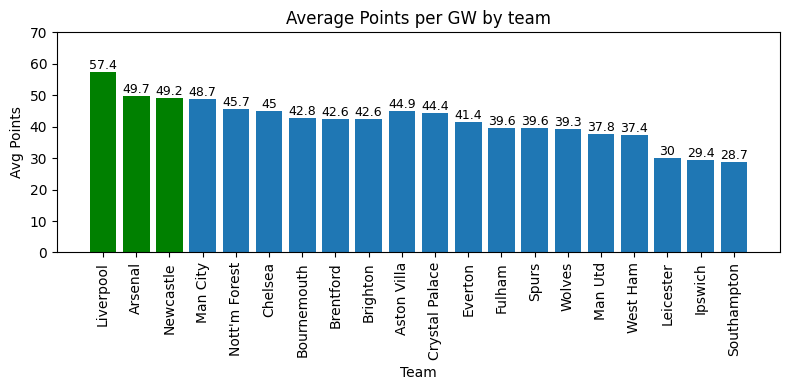

In [1538]:
# Create a bar chart
fig, ax1 = plt.subplots(figsize=(8,4))
bars = ax1.bar(pivot["team"],pd.to_numeric(pivot["avg_points_per_gw"]).round(1))   # Cast avg_points from object to int and have 01 decimal

# X-axis
ax1.set_xticklabels(pivot["team"],rotation=90)

# Labels and title
ax1.set_title("Average Points per GW by team",)
ax1.set_xlabel("Team",)
ax1.set_ylabel("Avg Points",)
ax1.bar_label(bars,fontsize=9) # Adds labels to the bars
ax1.grid(False)
ax1.set_ylim(0,70)

# Highlight top 03
top3 = pivot.nlargest(3, "avg_points_per_gw")
ax1.bar(top3["team"], top3["avg_points_per_gw"], color="green", label="Top 3 teams")

plt.tight_layout()
plt.show()

> We can see that the **average points per GW** generally aligns with the overall team rankings.  
> - Teams that rank higher in FPL `total_points` also tend to have higher GW averages.
>
> - However, there are some exceptions: **`Aston Villa`** and **`Crystal Palace`** both have a higher `avg_points_per_gw` than **03 teams ranked above them**.
> - To better understand the context behind this, we now examine how many GW each team participated in:

In [2541]:
team_count_gw = df.groupby("team").agg(
    count_gw=("gw", "nunique"),
    count_fixture=("fixture", "nunique")
).sort_values(by="count_gw", ascending=True)

team_count_gw

,count_gw,count_fixture
team,,
Aston Villa,36,38
Crystal Palace,36,38
Liverpool,36,38
Arsenal,37,38
Newcastle,37,38
Everton,37,38
Man City,37,38
Spurs,38,38
Southampton,38,38


> - It turns out that **`Aston Villa`**, **`Crystal Palace`** and **`Liverpool`** had the **fewest GW**, each with only **36**, compared to most other teams which played **37 or 38 GWs**.
>
> - This helps explain why **`Aston Villa`** and **`Crystal Palace`** had relatively high average points.
> - For **`Liverpool`**, already a top-performing team, having fewer GWs didn’t hurt their dominance. In fact, their strong per-GW efficiency helped **solidify their #1 rank** in FPL `total_points`.

---

## 6.3. Team **AVERAGE POINT per PLAYER**

>#####  Next, we look at the <span style="background-color:#665c00; color:white;">**average points per player**</span> across the season for each team.
> - This metric reflects the overall <span style="background-color:#665c00; color:white;">**EFFECTIVENESS**</span> and <span style="background-color:#665c00; color:white;">**CONSISTENCY**</span> of a team’s squad.  
> - A higher average suggests that the team’s players, on the whole, contribute well in FPL — not just relying on a few stars.
>   
> ➡️➡️ It can also indicate:
> 1. **Squad stability**: Teams with fewer **injuries** or less **rotation** tend to have more consistent contributors.
>
> 2. **Even performance distribution**: Rather than relying on a few top scorers, the team’s `total_points` are more evenly spread.
> 3. On the flip side, teams with a few **OUTSTANDING PLAYERS** or **VERY POOR CONTRIBUTORS** may see this average pulled up or down significantly.

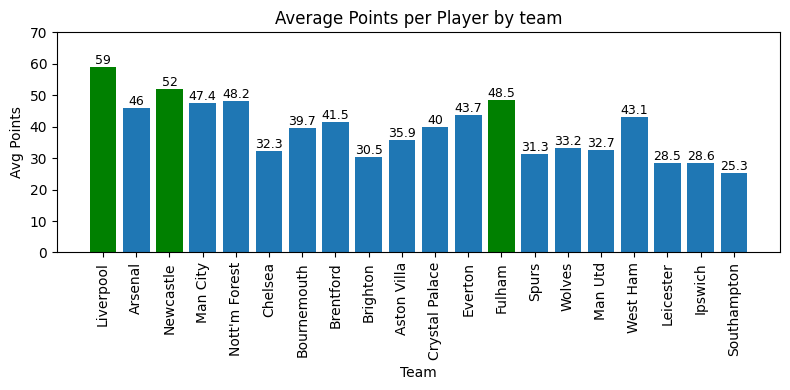

In [1511]:
# Create a bar chart
fig, ax2 = plt.subplots(figsize=(8,4))
bars = ax2.bar(pivot["team"],pd.to_numeric(pivot["avg_points_per_player"]).round(1))   # Cast avg_points from object to int and have 01 decimal

# X-axis
ax2.set_xticklabels(pivot["team"],rotation=90)

# Labels and title
ax2.set_title("Average Points per Player by team",)
ax2.set_xlabel("Team",)
ax2.set_ylabel("Avg Points",)
ax2.bar_label(bars,fontsize=9)
ax2.grid(False)
ax2.set_ylim(0,70)

# Highlight top 03
top3 = pivot.nlargest(3, "avg_points_per_player")
ax2.bar(top3["team"], top3["avg_points_per_player"], color="green", label="Top 3 teams")

plt.tight_layout()
plt.show()

> Interestingly, this metric <span style="background-color:#665c00; color:white;">**does not correlate closely**</span> with the overall FPL team rankings.
> - **Top 3 teams** in average points per player:
>   1. **`Liverpool`** (*#1 in FPL*)  
>   2. **`Newcastle`** (*#3 in FPL)*  
>   3. **`Fulham`** (*#13 in FPL*)  
>    **`Fulham`**, despite being a mid-table team, has a **very high per-player average**.
>
> On the other hand, some **high-ranking teams show low per-player averages**:
> - For example, **`Chelsea`** (*#6th in FPL*) has a per-player average **comparable to teams in the bottom half**.
> - To better understand why, let's look at the **total number of players used by each team** over the season:

In [1510]:
team_count_player = df.groupby("team").agg(count_player=("element", "nunique"),).sort_values(by="count_player", ascending=True)
team_count_player

,count_player
team,
Fulham,31
West Ham,33
Newcastle,35
Liverpool,35
Everton,35
Nott'm Forest,36
Man City,38
Ipswich,39
Brentford,39


> - **`Fulham`** had the **smallest squad** with only **31 players**, followed by **`West Ham`** (*33 players*) and **`Liverpool`** (*35 players — still in the top 4 smallest squads*).
>
> - On the other hand, **`Chelsea`** and **`Brighton`** had the **largest squads**, each with **53 players**.<br>
> This is why **`Chelsea`** and **`Brighton`** saw their per-player averages drop into the 30s, despite decent team-level performances.  
>  
> ➡️ Conclusion: A **larger squad size** may reflect issues like:
> - *Squad rotation*
> - *Injuries*
> - *Tactical experimentation*
> - *Mid-season transfers*

---

## 6.4. Team **BEST PLAYERS**

>##### Next, we identify the <span style="background-color:#665c00; color:white;">**BEST-PERFORMING PLAYER**</span> from each team based on FPL `total_points`.
> This helps us understand:
> - Which **STAR PLAYERS** are carrying their teams in FPL  
> - Whether a team’s playstyle is more **OFFENSIVE-focused** (*e.g. FWD/MID topping the chart*) or **DEFENSIVE-oriented** (*e.g. GK/DEF leading in points*)  
> - The overall **STRENGTH and BALANCE** of the squad — teams heavily reliant on one standout player may lack depth    
>    
> ➡️➡️ These insights can guide FPL managers in spotting:
> - *Key assets from each team*  
> - *Differential picks from lower-ranked teams*  
> - *Consistent performers to build around*

In [2542]:
# Get columns to be summarized
sum_cols = ["total_points","assists","bonus","clean_sheets","goals_conceded","goals_scored","own_goals","penalties_missed","penalties_saved","saves","yellow_cards","red_cards","ict_index","influence","creativity","threat"]

# Create a summary table
sum_player = df.groupby(["team_code","element","name","position"])[sum_cols].sum().reset_index()

# Create an average of value table
avg_player = df.groupby(["team_code","element","name","position"])["value"].mean().reset_index()

# Merge 02 tables
sum_player = sum_player.merge(avg_player)

# Create a table sorting max "total_points"
top_players = sum_player.loc[sum_player.groupby("team_code")["total_points"].idxmax()].round(2)

# Get the order of team based on the order in "pivot" table
team_order = pivot["team_code"].drop_duplicates().tolist()

# Force the order of team
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=team_order, ordered=True) 
top_players["team_code"] = top_players["team_code"].astype(cat_type)

# Sort the table
top_players = top_players.sort_values(by=["team_code", "total_points"], ascending=[True, False])

# Show table
top_players[["name","team_code","position","value","total_points","assists","bonus","clean_sheets","goals_conceded","goals_scored","own_goals","penalties_missed","penalties_saved","saves","yellow_cards","red_cards","ict_index","influence","creativity","threat"]].replace(0,"").set_index("name")

,team_code,position,value,total_points,assists,bonus,clean_sheets,goals_conceded,goals_scored,own_goals,penalties_missed,penalties_saved,saves,yellow_cards,red_cards,ict_index,influence,creativity,threat
name,,,,,,,,,,,,,,,,,,,
Mohamed Salah,LIV,MID,13,344,18,55,15,40,29,,,,,1,,476,"1,577","1,199",1985
Leandro Trossard,ARS,MID,7,152,8,18,11,27,8,,,,,2,1,202,609,618,798
Alexander Isak,NEW,FWD,9,211,6,36,12,41,23,,,,,1,,293,"1,043",573,1320
Erling Haaland,MCI,FWD,15,181,3,26,10,38,22,,1,,,2,,282,946,359,1511
Chris Wood,NFO,FWD,7,200,3,41,15,37,20,,,,,1,,206,838,320,900
Cole Palmer,CHE,MID,11,214,10,35,10,41,15,,1,,,7,,338,"1,068","1,259",1052
Antoine Semenyo,BOU,MID,6,165,7,14,11,41,11,,,,,9,,268,792,689,1204
Bryan Mbeumo,BRE,MID,8,236,9,29,9,55,20,,1,,,3,,341,"1,237","1,108",1060
Mitoma Kaoru,BHA,MID,6,145,5,12,6,40,10,,,,,1,,211,671,578,856


>##### Looking at the top performers from each team, we observe some clear positional trends:
> - <span style="background-color:#665c00; color:white;">The **MAJORITY** of top players are either **Forwards (*FWD*)** or **Midfielders (*MID*)**</span> — which is expected, as they are typically involved in `goals_scored` and `assists`.
>
> - Surprisingly, **no Defenders (*DEF*)** appear as the highest scorer for their respective teams.
> - However, there are **02 Goalkeepers (*GK*)** who top their teams in `total_points` — each for very different reasons:
> 1. GK **`Jordan Pickford`** – *Everton*
>    - `total_points`: 158  
>    - `saves`: 122  
>    - `clean_sheets`: 12  
>    - `goals_conceded`: 44      
>
>         ➡️ `Jordan Pickford` had an **OUTSTANDING SEASON**, combining a high number of `saves` with solid defensive support from his team.   
> His ability to secure `clean_sheets` while keeping `goals_conceded` relatively low made him a **reliable FPL asset** throughout the season.
>
> 2. GK **`Aaron Ramsdale`** – *Southampton*
>    - `total_points`: 97  
>    - `saves`: 125 (more than `Pickford`)  
>    - `clean_sheets`: 3  
>    - `goals_conceded`: 66  
>
>         ➡️ In contrast, `Aaron Ramsdale` had a **NIGHTMARE SEASON** — topping his team mostly due to sheer volume of defensive pressure.   
> Despite a high `saves` count, `Southampton`'s porous defense meant he conceded heavily, with only 03 `clean_sheets` all season. His presence at the top highlights **how weak the rest of the squad performed**.
>
> ➡️➡️ **Summary**:  
> - GKs can top FPL points for a team either through **genuine defensive solidity** (like `Jordan Pickford`) or due to **being overworked under constant threat** (like `Aaron Ramsdale`).  
>
> - This contrast reflects the **polar nature of GK scoring in FPL**.
>
> Besides the 02 standout GK mentioned above, let's take a broader look at the **top players from each team** using a visual representation below:

### 6.4.+ Visualize team **BEST PLAYERS**

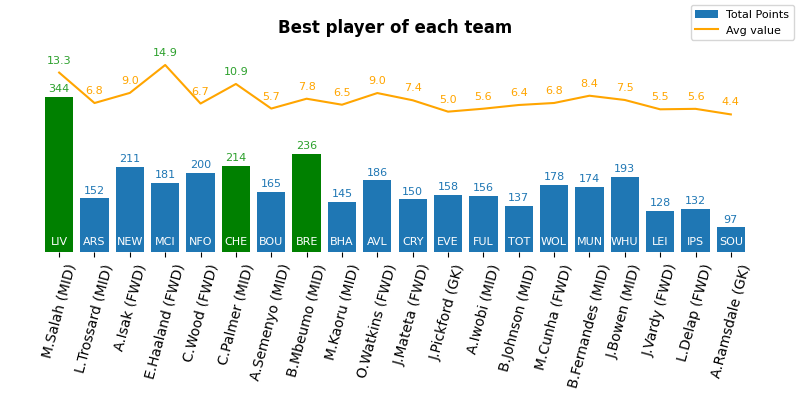

In [2546]:
# Create a function to shorten the player's name
def shorten_name(name):
    parts = name.strip().split()
    if len(parts) >= 2:
        return f"{parts[0][0]}.{parts[-1]}"
    else:
        return name  # Case of name just have 01 word

# Apply shorten_name function
top_players["short_name"] = top_players["name"].apply(shorten_name) + " (" + top_players["position"] + ")"

# Create a mix chart
fig, ax3 = plt.subplots(figsize=(8,4))
bars = ax3.bar(top_players["short_name"], top_players["total_points"],label="Total Points")

# X-axis
ax3.set_xticklabels(top_players["short_name"],rotation=75) 

# Y-axis
ax3.set_yticks([])
ax3.set_ylim(50,450)
ax3.set_title("Best player of each team", fontweight="bold")
ax3.grid(False)

# 2nd Y-axis
ax4 = ax3.twinx()
ax4.plot(top_players["short_name"], top_players["value"], color="orange",label="Avg value")
ax4.set_ylim(-25,20)
ax4.set_yticks([])

# Highlight top 3 (total_points)
top3 = top_players.nlargest(3, "total_points")
ax3.bar(top3["short_name"], top3["total_points"], color="green")

# Create label for "total_points" and highlight top 3
top3_names_point = top_players.nlargest(3, "total_points")["short_name"].tolist()
for bar, name, val in zip(bars, top_players["short_name"], top_players["total_points"]):
    color = "tab:green" if name in top3_names_point else "tab:blue"
    ax3.text(bar.get_x() + bar.get_width()/2, val + 10, f"{int(val)}", ha="center", fontsize=8, color=color)

# Create label for "value" and highlight top 3
top3_names_value = top_players.nlargest(3, "value")["short_name"].tolist()
for bar, name, val in zip(bars, top_players["short_name"], top_players["value"]):
    color = "tab:green" if name in top3_names_value else "orange"
    ax4.text(bar.get_x() + bar.get_width()/2, val + 2, f"{val:.1f}", ha="center", fontsize=8, color=color)

# Create label for "team"
for bar, team, val in zip(bars, top_players["team_code"], top_players["total_points"]):
    ax3.text(bar.get_x() + bar.get_width()/2, 65, team, ha="center", fontsize=8, color='white')

# Remove border
import seaborn as sns
sns.despine(bottom = True, left = True)

fig.legend(loc="upper right",fontsize=8)
plt.tight_layout()
plt.show()

>##### Looking at the top players from each team, we see <span style="background-color:#665c00; color:white;">**A MASSIVE GAP** between the league's top performer and the rest</span>.
>
> 🥇 **`Mohamed Salah`** – *Liverpool*
> - `total_points`: 344 (*Gap to 2nd place: Over **100–150 points***)
> - `Salah` had a **PHENOMENAL SEASON**, exploding with elite-level performances that helped **`Liverpool` secure the title**.
> - He continues to prove himself as one of the most valuable FPL assets.
>
> **`Bryan Mbeumo`** – *Brentford*  
>  - `total_points`: 236  
>  - `avg_value`: 7.8M  
>  - Excellent value-for-money pick, consistently overperforming his price.
> 
> **`Cole Palmer`** – *Chelsea*  
>  - `total_points`: 214  
>  - `avg_value`: 10.9M  
>  - Delivered solid returns, living up to his valuation.
>
> 📉 **Underperformers**: **`Erling Haaland`** – *Manchester City*  
>  - `total_points`: 181  
>  - `avg_value`: 14.9M (*The most expensive FPL player season 24/25*)  
>  - After a record-breaking previous season, this season was **A MAJOR LETDOWN** for FPL managers who heavily invested in him.  
>  - His points-to-price ratio was **underwhelming**.
>
> **`Arsenal`** – A team of balance
> - **Top Player**: `Leandro Trossard` – 151 points  
> - `avg_value`: 6.8M  
> - Despite finishing **2nd in the league**, `Arsenal` had **NO STANDOUT SUPERSTAR** in FPL.  
> - This suggests a **well-balanced squad** with contributions spread across multiple players rather than reliance on a single asset.
>
> ➡️➡️ Overall, this comparison highlights the importance of evaluating both **`total_points` and player `value`**, and not just relying on big-name or high-price players.

---

## 6.5. **BEST** and **WORST** teams

>##### Next, we’ll dive into a breakdown of <span style="background-color:#665c00; color:white;">**which teams performed the BEST and WORST**</span> across various FPL-related metrics.
> 
> This analysis provides insight into:
> - **Tactical profiles**: Which teams focused on attacking vs. defending  
> - **Team strengths & weaknesses**: `clean_sheets`, `assists`, `goals_scored` and more  
> - How these patterns impacted **`total_points` and player `value`**
>
> By examining **top and bottom TEAM** in each metric, we gain a clearer picture of how teams operated throughout the season — whether they relied on offense, had a solid defense, or struggled on both ends.

In [2547]:
# Get numeric columns
numeric_cols = ["total_points", "avg_points_per_gw", "avg_points_per_player","avg_value_per_gw", "assists", "bonus", "clean_sheets","goals_conceded", "goals_scored", "own_goals","penalties_missed", "penalties_saved", "saves", "yellow_cards", "red_cards", "ict_index", "influence", "creativity", "threat"]

# Cast all numeric columns to float
for col in numeric_cols:
    pivot[col] = pivot[col].astype(str).str.replace(",", "").str.strip()    # Nếu cột chứa string có dấu phẩy: loại dấu phẩy
    pivot[col] = pd.to_numeric(pivot[col], errors="coerce")                 # Sau đó chuyển về dạng số

# Dataframe for results
results = []

# Find min and max of each column
for col in numeric_cols:            # type: ignore
    max_value = pivot[col].max()
    min_value = pivot[col].min()

    max_team = pivot.loc[pivot[col] == max_value, "team"].values[0]     # Find "team" that have that max_value
    min_team = pivot.loc[pivot[col] == min_value, "team"].values[0]     # Find "team" that have that min_value

    # Append the results to a dictionary
    results.append({
        "Index": col,
        "Best team": max_team,
        "Best value": max_value,
        "Worst team": min_team,
        "Worst value": min_value
    })

# Create a table from results
summary_df = pd.DataFrame(results)

# Set index for table and then remove index
summary_df = summary_df.set_index("Index").reindex(numeric_cols).reset_index()

# Format number
summary_df[["Best value","Worst value"]]=summary_df[["Best value","Worst value"]].applymap(lambda x: f"{x:,.0f}")

summary_df

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/1686200755.py:36: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,Index,Best team,Best value,Worst team,Worst value
0,total_points,Liverpool,"2,066",Southampton,"1,090"
1,avg_points_per_gw,Liverpool,57,Southampton,29
2,avg_points_per_player,Liverpool,59,Southampton,25
3,avg_value_per_gw,Brighton,227,Fulham,142
4,assists,Liverpool,78,Southampton,22
5,bonus,Liverpool,183,Leicester,59
6,clean_sheets,Liverpool,159,Ipswich,29
7,goals_conceded,Southampton,946,Arsenal,374
8,goals_scored,Liverpool,85,Southampton,25
9,own_goals,Spurs,4,Arsenal,0


> ##### **Key takeaways**:
>
> 1. **`Liverpool`** – Most dominant overall
>    - Topped **7/16** metrics, including `total_points`, `assists`, `bonus`, `clean_sheets` and `goals_scored`.
>    - Their performance was strong both offensively and defensively.
>    - Also 0 `penalties_missed`, showing clinical finishing.
> 
> 2. **`Southampton`** – Struggled across the board
>    - Ranked **worst in 04 categories**, including `total_points`, `goals_scored`, `assists` and `goals_conceded`.
>    - Despite poor results, their **high `saves` count (162)** reflects extreme defensive pressure — especially on their GK.
>
> 3. **`Brighton`** – Best average value per GW
>    - Topped the league with **227 `average_value_per_gw`**.
>    - This wasn't necessarily due to undervalued players, but rather because most of their squad had **consistently high price tags**.
>    - The reason traces back to the **previous season**, where `Brighton` were a surprise package, finishing in the **Top 6** with multiple breakout players.
>    - As a result, their player prices were **significantly inflated** going into this season — reflecting their strong reputation rather than current performance.
>
> 4. **`Arsenal`** – Paradoxical profile
>    - Conceded the **fewest goals** *(374)*, showing defensive strength.
>    - However, also had **lowest number of `saves` and `penalty_saves`**, likely due to strong control and minimal threats faced.
>    - Topped in **`red_cards`** *(6)* — an anomaly for a top team.
>
> 5. **Others**:
>    - **`Ipswich`** had the **LOWEST `ict_index` and `clean_sheets`**, signaling a very passive season.
>    - **`Chelsea`** received the most `yellow_cards` — possibly reflecting a more aggressive or disorganized defensive style.
>    - **`Spurs`** had the most `own_goals` — a sign of defensive lapses under pressure.
>
> *To enhance the way the data is communicated, we will create an alternative version of the table to better illustrate the key metrics:*

In [2444]:
# Create new format "value" columns for display
summary_df["Best value (formatted)"] = summary_df["Best value"]
summary_df["Worst value (formatted)"] = summary_df["Worst value"]

# Create new format columns with team name + value in each cell
summary_df["Best"] = summary_df["Best team"] + "<br><b>" + summary_df["Best value (formatted)"] + "</b>"
summary_df["Worst"] = summary_df["Worst team"] + "<br><b>" + summary_df["Worst value (formatted)"] + "</b>"

### Create a # column 🚨🚨🚨 (IF CREATED, DONT RUN AGAIN)
# summary_df.insert(0, "#", range(1, len(summary_df) + 1))

# Create heatmap table using Plotly
fig = go.Figure(data=[go.Table(
     columnwidth=[30, 100, 100, 100],
          header=dict(
               values=["<b>#</b>", "<b>Index</b>", "<b>Best Team</b>", "<b>Worst Team</b>"],
               fill_color='lightgrey',
               align='center',
               font=dict(size=12)
          ),
          cells=dict(
          values=[
               summary_df["#"],
               summary_df["Index"],
               summary_df["Best"],
               summary_df["Worst"]
          ],
          fill_color=[
               ['white'],
               ['white'],
               ['lightgreen'],
               ['lightcoral']
          ],
          align=['center', 'left', 'center', 'center'],
          font=dict(size=10),
          # height=20
          )
     )])

fig.update_layout(
    width=600,
    height=800,
    title="Best and Worst performance teams",
    title_x=0.5
)

fig.show()


---

## 6.6. **THE BEST TEAM** Performance

>##### Since we already know that <span style="background-color:#665c00; color:white;">**`Liverpool`** were **the champions of the 24/25 EPL**</span> and also the **1st place in FPL `total_points`**, it's worth taking a closer look at how their performance evolved **week by week (GW)**.   
>
> By examining their GW-level performance, we can uncover patterns such as:
> - *Periods of peak form or potential slumps*
> - *How consistent their players were*
> - *Whether they relied on a few standout performances or maintained balanced output throughout the season*
> 
> This analysis will help us understand the **stability**, **momentum** and **fantasy reliability** of `Liverpool`'s squad during the title-winning season.

In [2549]:
# Get columns to be summarize
sum_cols = ["assists", "bonus", "goals_scored", "own_goals","penalties_missed", "penalties_saved", "red_cards","total_points", "value", "yellow_cards", "ict_index", "influence", "creativity", "threat"]
sum_df = df.groupby(["team", "gw", "fixture", "was_home", "opponent_team_code"])[sum_cols].sum().reset_index()
sum_df = sum_df.groupby(["team", "gw"]).agg(
    was_home=("was_home", lambda x: ", ".join(["H" if v else "A" for v in x])),
    opponent=("opponent_team_code", lambda x: list(sorted(set(x)))),
    **{col: (col, "sum") for col in sum_cols}
)
sum_df["opponent"] = sum_df["opponent"].apply(lambda x: ", ".join(x))
final_df = sum_df.copy()

# Average index (only if > 0)
avg_clean_sheets = df[df["clean_sheets"] > 0].groupby(["team", "gw"])["clean_sheets"].mean()
avg_goals_conceded = df[df["goals_conceded"] > 0].groupby(["team", "gw"])["goals_conceded"].mean()

# Create dataframe from Series
avg_df = pd.concat([
    avg_clean_sheets.rename("clean_sheets"),
    avg_goals_conceded.rename("goals_conceded")
], axis=1)

# Merge 2 tables
final_df = final_df.join(avg_df)
final_df = final_df.reset_index()  # Đưa 'team' và 'gw' từ index thành cột thường

# Re-order the columns
final_df = final_df[["team","gw","was_home","opponent","total_points", "value", "assists", "goals_scored", "goals_conceded", "bonus", "clean_sheets", "own_goals", "penalties_missed", "penalties_saved","red_cards", "yellow_cards", "ict_index", "influence", "creativity", "threat"]]

# Filter the best team (Liverpool)
liverpool_df = final_df[final_df["team"] == "Liverpool"]

# Format number
pd.options.display.float_format = "{:,.0f}".format

# Remove NA, set index for table
liverpool_df=liverpool_df.replace([0, pd.NA, float("nan")], "").fillna("").set_index("team")

liverpool_df

,gw,was_home,opponent,total_points,value,assists,goals_scored,goals_conceded,bonus,clean_sheets,own_goals,penalties_missed,penalties_saved,red_cards,yellow_cards,ict_index,influence,creativity,threat
team,,,,,,,,,,,,,,,,,,,
Liverpool,1,A,IPS,69,164,2,2,,7,1,,,,,1,63,211,195,221
Liverpool,2,H,BRE,74,160,2,2,,7,1,,,,,2,78,275,250,255
Liverpool,3,A,MUN,82,166,3,3,,6,1,,,,,1,58,301,144,140
Liverpool,4,H,NFO,22,166,,,1,,1,,,,,4,53,148,209,169
Liverpool,5,H,BOU,80,170,3,3,,6,1,,,,,1,88,401,232,254
Liverpool,6,A,WOL,44,170,2,2,1,5,,,,,,3,52,205,132,182
Liverpool,7,A,CRY,64,170,1,1,,7,1,,,,,2,57,213,234,123
Liverpool,8,H,CHE,43,169,2,2,1,5,,,,,,4,44,224,90,126
Liverpool,9,A,ARS,39,173,2,2,2,3,,,,,,2,45,212,107,136


>##### The table above summarizes the **GW stats of all `Liverpool` players**:
> - We can observe that in **almost every GW**, **`Liverpool`** players consistently recorded both `goals_scored` and `assists`.  
> - This indicates strong attacking output across the entire season.
> - The`goals_conceded` is calculated as the **average across all `Liverpool` players** in each GW, since every player on the field typically receives the same defensive penalty in FPL when the team concedes.
>
> **Key takeaways**:
> - **`Liverpool`** maintained an **attacking playstyle** (*heavily reliant on their **MID** and **FWD** players*).
> - Their **defensive record** was also solid, with relatively **low `goals_conceded` index** across most GWs.
> - Although the dataset does not include match outcomes *(win/draw/loss)*, the consistent high `goals_scored` and attacking returns strongly suggest that **`Liverpool` won the majority of their matches**.
> - This aligns with their status as both **EPL champions** and **FPL top-performing team** for the 24/25 season.

### 6.6.+ Visualize **THE BEST TEAM** GW by GW

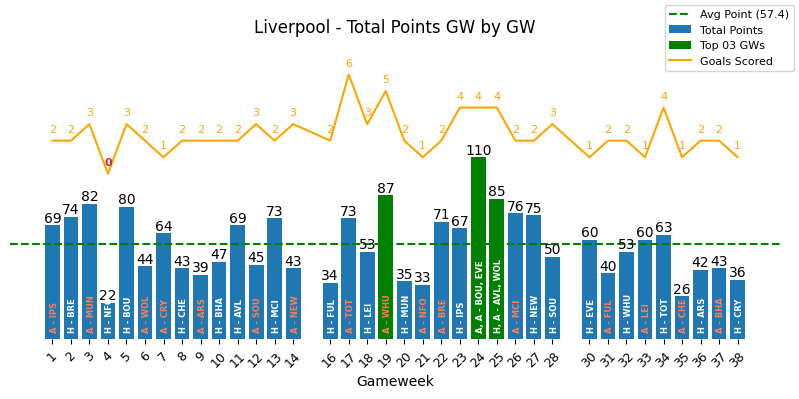

In [2551]:
# Create a bar chart
fig, ax5 = plt.subplots(figsize=(8,4))
bars = ax5.bar(liverpool_df["gw"], liverpool_df["total_points"], label="Total Points")

# X-axis (1 to 38)
ax5.set_xticks(liverpool_df["gw"])
ax5.set_xticklabels(liverpool_df["gw"],rotation=45,fontsize=9)  # Optional: rotate for better spacing

# Labels and title
ax5.set_title("Liverpool - Total Points GW by GW",)
ax5.set_xlabel("Gameweek",)
ax5.bar_label(bars) # Adds labels to the bars
ax5.grid(False)
ax5.set_ylim(0,180)
ax5.set_yticks([])

# 2nd Y-axis
ax6 = ax5.twinx()
ax6.plot(liverpool_df["gw"], pd.to_numeric(liverpool_df["goals_scored"]).fillna(0), color="orange",label="Goals Scored")
ax6.set_ylim(-10,8)
ax6.set_yticks([])

# Create label for goals_scored
for bar, gw, val in zip(bars, liverpool_df["gw"], pd.to_numeric(liverpool_df["goals_scored"]).fillna(0)):
    color = "tab:red" if val == 0 else "orange"
    fontweight = "bold" if val == 0 else 'normal'
    ax6.text(bar.get_x() + bar.get_width()/2, val+0.5, f"{int(val)}", ha="center", fontsize=8, color=color, fontweight=fontweight)

# Highlight top 03
top3 = liverpool_df.nlargest(3, "total_points")
ax5.bar(top3["gw"], top3["total_points"], color="green", label="Top 03 GWs")

# Create a "Average" line
avg = liverpool_df["total_points"].mean()
ax5.axhline(avg, color="green", linestyle="--", linewidth=1.5, label=f"Avg Point ({avg:.1f})")

# Create label for was_home & opponent
for bar, gw, val1, val2 in zip(bars, liverpool_df["gw"], liverpool_df["was_home"], liverpool_df["opponent"]):
    color = "coral" if val1 == "A" else "white"
    ax5.text(bar.get_x() + bar.get_width()/2 + 0.1, 5, val1 + " - " + val2, ha="center", fontsize=6, color=color, fontweight="bold", rotation=90)

fig.legend(loc="upper right",fontsize=8)
sns.despine(bottom = True, left = True)
plt.tight_layout()
plt.show()

>##### To better visualize **`Liverpool`**’s performance throughout the season, we’ve plotted a chart showing their **`total_points` by GW**.
>
> **Key observations**:
> 1. **Average GW point**: **`Liverpool`** averaged **57.4 points per GW**, far above most other teams (*which ranged from 29 to 50 based on section 5.1*).
> 
> 2. **Peak GWs**: There were several explosive GWs where **`Liverpool`** hit **80–110 points**, showcasing their offensive power.
> 3. **Low points GWs**: Although they had a few low-scoring GWs, `total_points` never dropped to a level that significantly impacted their overall lead.
> 4. **Final 04 GWs**: `total_points` noticeably dipped during the last 04 GWs.  This aligns with real-world context — *`Liverpool` had already secured the EPL title with 5 GWs to go*, allowing rotation and rest for key players.
> 5. **Mid-season surge**: Between **GW22–GW27**, **`Liverpool`** entered their strongest phase, consistently scoring high — this was the crucial period where they broke away from **`Arsenal`** and **`Man City`**.
> 6. **Goal contribution**: **`Liverpool`** players scored in nearly every GW. Only **GW04** saw zero goals and one of their lowest `total_points` totals — likely their **only form dip** of the season.   
> Notably, both GWs vs. `Tottenham` (*GW17 & GW34*) had high goal counts, regardless of being *home* or *away*, reaffirming `Liverpool`’s attacking mindset even against top-six opponents.
> 7. **Home vs. away performance**: Contrary to expectations, `Liverpool` often performed better **Away** than at **Home**, with several top-scoring GWs coming in **Away** fixtures — highlighting their consistency and strength regardless of venue.
> 
> ➡️➡️ Overall, the data confirms a classic football trend: ***Home* advantage matters**, but `Liverpool`’s ability to score big even in *Away* fixtures was a key differentiator this season.   
> In contrast, some GWs featured **5–6 goals**, reaffirming **`Liverpool`**’s position as one of the **most attack-driven teams in world football**.
---

# 7. **PLAYERs** analysis

> ##### We now move on to the **player-level analysis**, which aims to identify the most effective and valuable players from the 2024/25 FPL season.
> 
> Key metrics to focus on:  
> **1. `Total points`**  
> **2. `Value`**  
> **3. Performance stats**: 
>  - `Goals`
>  - `Assists`
>  - `Bonus Points`
>  - `Creativity`
>  - `Saves` (for GK)
>  - Discipline: `Yellow cards`, `Red cards`
>  - `Threat`: Influence metrics (pressure on opponents)   
>
> **4. GW involvement**:
>  - `Minutes` Played
>  - Number of `Matches played`
>  - Number of `Matches started`
>
> **5. Popularity trends**:
>  - Percentage of FPL managers who `selected` the player
>  - `Transfer_balance`= Transfers_in-Transfers_out
>
> By analyzing these metrics, we can identify players who were not only impactful in real matches but also delivered high value for FPL managers.  
> **Objective**: Use this analysis to **highlight high-performing and cost-effective players**, which will support decision-making for selecting an optimal squad in the upcoming **25/26 season**.


## 7.1. Player **SELECTION DISTRIBUTION** by player value

>##### To begin the player analysis, we first examine the <span style="background-color:#665c00; color:white;">**distribution of player values**</span> and the **Number of FPL managers who selected them**.  
> **Purpose**: Understanding how player prices are spread and how often players are chosen gives us an overview of:
> - ***Selection trends**: At what cost of players are most popular among FPL managers?*
> - ***Cost dynamics**: Are high-value players always more popular, or do budget picks stand out?*
> - ***Market efficiency**: Whether certain undervalued players provided exceptional returns.*   
>
> This initial overview helps identify patterns in <span style="background-color:#665c00; color:white;">**player affordability vs. desirability**</span>, which is critical when planning for budget constraints in the upcoming 25/26 season.


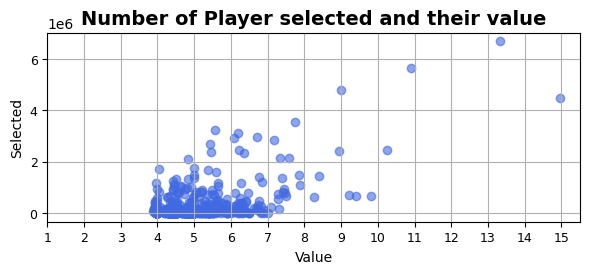

In [1624]:
# Create a table of average
player_avg = df.groupby(["element"]) \
               .agg(
                   avg_value=("value", "mean"),
                   avg_selected=("selected", "mean")
               ).reset_index()

# Create a scatter chart
plt.figure(figsize=(6,3))
plt.scatter(
    player_avg["avg_value"],
    player_avg["avg_selected"],
    alpha=0.6,
    color="royalblue"
)

plt.title("Number of Player selected and their value",fontsize=14, fontweight="bold")
plt.xlabel("Value")
plt.ylabel("Selected")
plt.xticks(range(1, 16), fontsize=9)
plt.yticks(fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

>##### From the scatter plot, we can observe several key trends:
> 1. **Majority cluster between £4.0M–£7.5M**:
>    - Most players fall within the `value` range of **£4.0M to £7.5M**.
>    - This cluster also has the **widest spread of `selection` count**, showing that both low- and mid-priced players can be very popular or completely overlooked.
> 2. **High-value players (≥ £10M)**:
>    - There are very **few players** priced above £10M.
>    - These players tend to have **high `selection` counts**, indicating they are likely superstar picks (e.g. `Salah`, `Haaland`).
> 3. **No strong correlation**:
>    - There’s **no clear linear correlation** between player value and selection.
>    - Some mid-value players (e.g. £6M–£7.5M) are selected by **millions**, proving that **performance and popularity** aren’t always tied to price.
> 4. **Hidden gems**:
>    - A few players priced around **£4.0M–£5.5M** appear to have very high selection counts, suggesting these could be **budget enablers** or early breakout stars.
>
> ➡️➡️ **Conclusion**: While high-value players are popular, many **mid-priced** and even **budget options** also see strong interest.  
> Smart FPL managers often spot value players who outperform their price tag.
---

## 7.2. **BEST** players

### 7.2.1 Player dataframe **DESCRIPTION**

>##### We now build a dedicated table summarizing <span style="background-color:#665c00; color:white;">**key statistics for each player**</span>. Let's reflect on the overall dataset.  
> - This table encapsulates **core FPL metrics** such as `total_points`, `value`, performance stats (`goals`, `assists`, `bonus`), playing time (`matched_played`, `minute`) and popularity trends (`selected`, `transfers_balance`).  

In [2556]:
# Create a pivot table of player, reset index to be a normal table
pivot_player = df.groupby(["element", "name", "position"]).agg(
    team_list=("team_code", lambda x: list(sorted(set(x)))),               # List of teams
    total_points=("total_points", "sum"),
    value=("value", "sum"),
    assists=("assists", "sum"),
    bonus=("bonus", "sum"),
    clean_sheets=("clean_sheets", "sum"),
    goals_scored=("goals_scored", "sum"),
    own_goals=("own_goals", "sum"),
    saves=("saves", "sum"),
    penalties_missed=("penalties_missed", "sum"),
    penalties_saved=("penalties_saved", "sum"),
    yellow_cards=("yellow_cards", "sum"),
    red_cards=("red_cards", "sum"),
    minutes=("minutes", "sum"),
    selected=("selected", "sum"),
    starts=("starts", "sum"),
    transfers_balance=("transfers_balance", "sum"),
    ict_index=("ict_index", "sum"),
    influence=("influence", "sum"),
    creativity=("creativity", "sum"),
    threat=("threat", "sum"),
    num_fixture=("fixture", "nunique"),                                  # count fixture of each team
    match_played=("minutes", lambda x: (x > 0).sum())               # count if minutes > 0 is the players participant the game
).reset_index()

# Calculate average index, reset index to be a normal table
pivot_player["avg_points"] = pivot_player["total_points"] / pivot_player["num_fixture"]
pivot_player["avg_value"] = pivot_player["value"] / pivot_player["num_fixture"]
pivot_player["avg_minute"] = pivot_player["minutes"] / pivot_player["num_fixture"]
pivot_player["avg_selected"] = pivot_player["selected"] / pivot_player["num_fixture"]
pivot_player["avg_ict_index"] = pivot_player["ict_index"] / pivot_player["num_fixture"]
pivot_player["avg_influence"] = pivot_player["influence"] / pivot_player["num_fixture"]
pivot_player["avg_creativity"] = pivot_player["creativity"] / pivot_player["num_fixture"]
pivot_player["avg_threat"] = pivot_player["threat"] / pivot_player["num_fixture"]
pivot_player["avg_transfers_balance"] = pivot_player["transfers_balance"] / pivot_player["num_fixture"]

# Calculate no of team played by player
pivot_player["no_of_team_played"] = pivot_player["team_list"].apply(len)

# Cast team_list (list) to team (string)
pivot_player["team"] = pivot_player["team_list"].apply(lambda x: ", ".join(x))

# Adjust desired order for table
desired_order2 = ["name","position","team","no_of_team_played","avg_value","total_points", "avg_points","assists","bonus","clean_sheets",
                  "goals_scored","own_goals","saves", "penalties_missed","penalties_saved","yellow_cards","red_cards",
                  "ict_index","avg_ict_index", "influence", "avg_influence", "creativity", "avg_creativity", "threat", "avg_threat",
                  "minutes", "avg_minute", "starts", "selected", "avg_selected", "transfers_balance", "avg_transfers_balance", "match_played"]

# Format number
pd.options.display.float_format = "{:,.1f}".format

pivot_player[desired_order2].describe()

,no_of_team_played,avg_value,total_points,avg_points,assists,bonus,clean_sheets,goals_scored,own_goals,saves,penalties_missed,penalties_saved,yellow_cards,red_cards,ict_index,avg_ict_index,influence,avg_influence,creativity,avg_creativity,threat,avg_threat,minutes,avg_minute,starts,selected,avg_selected,transfers_balance,avg_transfers_balance,match_played
count,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0,784.0
mean,1.0,4.9,39.9,1.1,1.2,3.1,2.7,1.4,0.0,3.0,0.0,0.0,2.0,0.1,50.6,1.4,220.6,6.0,150.1,4.1,136.3,3.7,954.7,25.9,10.7,"8,004,827.3","212,837.4","32,133.6","1,069.2",14.8
std,0.2,1.0,48.8,1.3,2.3,6.0,3.7,3.1,0.2,15.9,0.1,0.2,2.6,0.3,66.0,1.8,271.3,7.2,230.6,6.1,236.7,6.3,"1,074.6",28.6,12.4,"22,107,248.8","585,203.4","490,227.4","15,047.8",13.8
min,1.0,3.9,-1.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"-3,174,856.0","-83,548.8",0.0
25%,1.0,4.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"130,146.2","3,568.2","-15,153.5",-398.8,0.0
50%,1.0,4.5,19.5,0.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.8,0.6,105.8,2.9,34.2,1.0,23.5,0.7,477.5,13.1,5.0,"731,877.0","19,971.7","-1,420.0",-37.4,12.0
75%,1.0,5.0,65.0,1.8,2.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,81.7,2.2,374.6,10.3,213.8,5.8,182.5,4.9,"1,792.2",50.0,20.0,"5,324,538.5","141,446.4","4,637.0",175.7,29.0
max,2.0,15.0,344.0,9.1,18.0,55.0,15.0,29.0,3.0,153.0,2.0,2.0,12.0,2.0,476.0,12.5,"1,577.0",41.5,"1,407.7",37.0,"1,985.0",52.2,"3,420.0",90.0,38.0,"254,065,676.0","6,685,938.8","4,582,393.0","236,879.8",38.0


### 5.5.1. Dataframe **OVERVIEW**

> ##### This summary provides an overview of **784 players** across the 24/25 FPL season, highlighting key performance and engagement metrics.
> 1. **Team distribution**:  
>    - Almost all players (*mean: 1.0*) played for only **01 team** during the season, with very few transferring clubs (max: **2**).  
>    - This consistency reinforces the reliability of club-level stats in analyzing individual player performance.
> 2. **Value & points output**:  
>    - Most players had an average `value` between **£4.0M–£5.0M**, with only a few reaching premium price tags (up to **£15.0M**).  
>    - The average `total_points` per player was just **39.9**, though the range was wide (*from -1.0 to 344.0*), indicating a strong concentration of high scores among a small elite group.
> 3. **Performance metrics**:  
>    - Most players contributed little to `assists` (mean: 0) and `goals_scored` (mean: 0), with the **75th percentile** achieving only **01 goal** and **02 assists**.
>    - `bonus` points were similarly scarce, with **75% of players** earning **04 or fewer** `bonus` points over the entire season.  
>    - `ict_index` (influence, creativity, threat):  avg **51.1**, max **476** – most players had low FPL contribution potential.  
>        • `influence`: avg **221** but highly skewed – most players had <100, only top assets >1000.  
>        • `creativity`: avg **150**, mean only **34** – creators were rare; few MIDs stood out.  
>        • `threat`: avg **136**, mean **24** – only top attackers broke the **1,000** mark.  
>         - These 03 metrics reveal how **a small group of players drive almost all FPL-relevant actions**.
> 4. **Defensive actions**:  
>    - `Saves`, `clean_sheets`, `own_goals` and `penalties_saved` mostly applied to GKs and DEFs.  
>    - Most players did not make any `saves` or have `clean_sheets` — **mean `saves`: 0**, **mean `clean_sheets`: 1.0**.  
>    - `Yellow_cards` and `red_cards` were rare, with most players receiving **0–3** `yellow_cards` and almost no `red_cards` (max: 2).
> 5. **Playing time**:  
>    - The average `minutes` played was **954.7**, but the range varied dramatically (from **0** to **3,420**).  
>    - **50% of players** played fewer than **478 minutes**, reflecting the depth and rotation within EPL squads.
> 6. **Popularity & transfers**:  
>    - Players’ popularity (`avg_selected`) varied widely: while the top had over **6.7M selections**, most had **<200K** and many below **100K**.  
>    - The average `transfers_balance` (`transfers_in` - `transfer_out`) was **1,069**, suggesting many players were slightly more transferred in than out.
> 7. **Starts & match involvement**:  
>    - `starts`: mean **5** matches, but top players reached **38** matches – crucial when targeting consistent starters.  
>    - `match_played`: median **12** matches, indicating many had limited involvement across the season.
>
> ➡️➡️ **Key takeaway**: The dataframe reflects the highly unequal distribution of performance in FPL — only a minority of players deliver consistent high returns, while most have limited impact.  
> This emphasizes the importance of identifying **value picks** and **breakout players** for optimal squad building.


### 7.2.2 **BEST PLAYERs**

> ##### Let’s take a look at the <span style="background-color:#665c00; color:white;">**TOP-PERFORMING PLAYERS**</span> of the season through key metrics such as **performance stats**, **match involvement** and **popularity** among FPL managers.

In [2560]:
# Duplicate table for formatting
pivot_formatted = pivot_player.copy().sort_values(by="total_points", ascending=False)

# Get numeric columns, format numeric columns
numeric_cols3 = pivot_formatted.select_dtypes(include="number").columns.drop(["avg_value","avg_points","avg_ict_index","avg_influence","avg_creativity","avg_threat"])
pivot_formatted[numeric_cols3] = pivot_formatted[numeric_cols3].applymap(lambda x: "" if x == 0 or pd.isna(x) else f"{x:,.0f}")

# Remove if value = 0
pivot_formatted = pivot_formatted[desired_order2].replace("0.0", "")

pivot_formatted.head(20)

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2032127876.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,name,position,team,no_of_team_played,avg_value,total_points,avg_points,assists,bonus,clean_sheets,goals_scored,own_goals,saves,penalties_missed,penalties_saved,yellow_cards,red_cards,ict_index,avg_ict_index,influence,avg_influence,creativity,avg_creativity,threat,avg_threat,minutes,avg_minute,starts,selected,avg_selected,transfers_balance,avg_transfers_balance,match_played
327,Mohamed Salah,MID,LIV,1,13.3,344,9.1,18,55,15,29,,,,,1,,476,12.5,"1,577",41.5,"1,199",31.6,"1,985",52.2,"3,374",89,38,"254,065,676","6,685,939","3,998,608","105,227",38
98,Bryan Mbeumo,MID,BRE,1,7.7,236,6.2,9,29,9,20,,,1,,3,,341,9.0,"1,237",32.5,"1,108",29.1,"1,060",27.9,"3,415",90,38,"133,925,307","3,524,350","4,582,393","120,589",38
181,Cole Palmer,MID,CHE,1,10.9,214,5.6,10,35,10,15,,,1,,7,,338,8.9,"1,068",28.1,"1,259",33.1,"1,052",27.7,"3,193",84,36,"213,871,708","5,628,203","-398,454","-10,486",37
400,Alexander Isak,FWD,NEW,1,9.0,211,5.6,6,36,12,23,,,,,1,,293,7.7,"1,043",27.4,573,15.1,"1,320",34.7,"2,758",73,34,"182,064,579","4,791,173","476,407","12,537",34
446,Chris Wood,FWD,NFO,1,6.7,200,5.3,3,41,15,20,,,,,1,,206,5.4,838,22.1,320,8.4,900,23.7,"2,958",78,35,"112,518,335","2,961,009","2,675,596","70,410",36
513,Jarrod Bowen,MID,WHU,1,7.5,193,5.1,11,21,8,13,,,,,1,,272,7.2,903,23.8,738,19.4,"1,081",28.4,"2,974",78,34,"29,645,346","780,141","1,259,667","33,149",34
57,Ollie Watkins,FWD,AVL,1,9.0,186,4.9,8,32,10,16,,,,,2,,224,5.9,766,20.2,345,9.1,"1,148",30.2,"2,593",68,31,"91,751,303","2,414,508","573,329","15,088",38
109,Yoane Wissa,FWD,BRE,1,6.3,185,4.9,6,32,9,18,,,,,5,,242,6.4,849,22.4,400,10.5,"1,181",31.1,"2,921",77,34,"45,055,267","1,185,665","2,323,741","61,151",35
326,Luis Díaz,MID,LIV,1,7.6,183,4.8,7,21,15,13,,,,,2,,246,6.5,771,20.3,748,19.7,946,24.9,"2,393",63,28,"81,913,191","2,155,610","1,171,542","30,830",36
350,Erling Haaland,FWD,MCI,1,15.0,181,4.8,3,26,10,22,,,1,,2,,282,7.4,946,24.9,359,9.5,"1,511",39.8,"2,736",72,31,"170,082,985","4,475,868","-3,174,856","-83,549",31


>##### This is the list of the **Top 20 best-performing players** this season, based on their **`total_points`** in FPL.  
> 1. Most players in this table scored between **150–200 points**, with a few **outstanding performances** like `Mohamed Salah` *(344)* and `Bryan Mbeumo` *(236)* far ahead of the rest.  
> This aligns with our earlier analysis in Section *5.4.+ Visualize Team BEST PLAYERS*.  
>
> 2. `Jordan Pickford` is the **only GK** to appear in this list, and there are **no DEFs**, highlighting the dominance of **FWD and MID** positions in point contributions.  
> 3. The top 20 players come from a **wide variety of teams**, not just the top-ranked teams, reflecting the **high competitiveness** and **depth** of EPL squads.  
> This also shows how the **attacking playstyle** across teams limits the ability of DEFs to earn high FPL points.  
> 4. Looking at the `avg_selected` metric, we see a wide gap in popularity:  
>    - Highly selected players like `Mohamed Salah` (6.6M) and `Cole Palmer` (5.6M).  
>    - Underrated names like `Antoine Semenyo` (800k) and `Jacob Murphy` (600k), who quietly delivered impressive returns.  
>    These **hidden gems** add flavor to the EPL season and FPL strategy.  
> 5. Transfer acctivity highlights **FPL trends**, bandwagons and potential price risks.
>    - `Mohamed Salah`, `Bryan Mbeumo` and `Morgan Rogers` saw consistent **positive transfer trends**.
>    - `Erling Haaland`, `Bruno Fernandes` and `Cole Palmer` surprisingly had **net negative** despite regular returns.
>
> To visualize this clearly, we will now plot a chart of these top 20 players by `total_points`.

### 7.2.3 Visualize **BEST 20 PLAYERs**

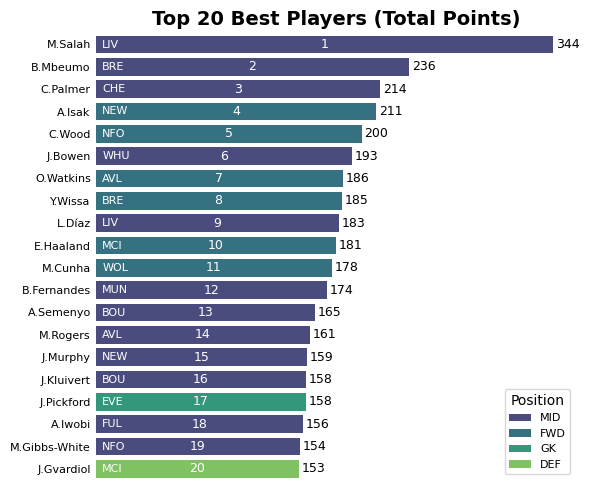

In [2561]:
import seaborn as sns

# Create a Top 20 players table
top_points = pivot_player.sort_values(by="total_points", ascending=False).head(20)

# Add a short_name column
top_points["short_name"] = top_points["name"].apply(shorten_name)

# Create a horizontal bar chart 
plt.figure(figsize=(6, 5))
ax6 = sns.barplot(
    data=top_points,
    y="short_name",
    x="total_points",
    hue="position",
    dodge=False,
    palette="viridis"
)
ax6.set_xlabel("")
ax6.set_ylabel("")
ax6.tick_params(axis='y', labelsize=8, length=0)
ax6.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax6.grid(False)
sns.despine(bottom = True, left = True)

# Add label to bars
for i, (value, team) in enumerate(zip(top_points["total_points"], top_points["team"])):
     ax6.text(value + 2, i, f"{value:,.0f}", va="center", fontsize=9, color="black")         # Total_points
     ax6.text(5, i, team, va="center", ha="left", fontsize=8, color="white")                 # Team
     ax6.text(value / 2, i, f"{i+1}", ha="center", va="center",  fontsize=9, color="white")    # Rank

plt.title("Top 20 Best Players (Total Points)", fontsize=14, fontweight="bold")
plt.legend(title="Position", loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

> 1. As analyzed in previous sections, `Mohamed Salah` was **the standout player** of the season, creating a significant `total_points` gap from all others.  
>
> 2. Additionally, `Liverpool` contributed another top-20 player — `Luis Díaz` — who made it into this elite list despite only **28/38 starts** and **36/38 appearances**, highlighting his exceptional impact even as a substitute.  
> 3. Interestingly, 04 teams had **02 players** each in the top 20:  
>    - **Newcastle**: `Alexander Isak` *(211 pts)* & `Jacob Murphy` *(159 pts)*  
>    - **Aston Villa**: `Ollie Watkins` *(186 pts)* & `Morgan Rogers` *(161 pts)*  
>    - **Brentford**: `Bryan Mbeumo` *(236 pts)* & `Yoane Wissa` *(185 pts)*  
>    - **Bournemouth**: `Antoine Semenyo` *(165 pts)* & `Justin Kluivert` *(158 pts)*  
> 4. A truly impressive case is `Nott'm Forest`, which had **03 players** in the top 20: `Chris Wood` *(200 pts)*, `Morgan Gibbs-White` and `Anthony Elanga` *(153 pts)*.  
> This performance reinforces their identity as a **real dark horse**, finishing **7th in the EPL** and **4th in FPL total_points**, a remarkable feat for a club that has only been back in the EPL for 04 years, having placed 16th–17th in the first 03.  
> 5. In terms of player roles, most top performers were either **MID** or **FWD**, with a striking **13 MIDs** compared to just **06 FWDs**.  
>    - This underlines the strategic importance of **MIDs** in modern football, as teams now favor **PLAYMAKER** and even deploy **FALSE 9s** rather than relying on traditional strikers.  
>    - It also reflects the current **tactical trends**, where MIDs are more involved in attacking returns, while the league still lacks a deep pool of elite-level forwards.
---

## 7.3. **MOST VALUED** players

> ##### To explore how player valuation aligns with in-game performance and popularity, we now take a closer look at the <span style="background-color:#665c00; color:white;">**Highest-valued players**</span> of the 24/25 FPL season.  
> - These values are shaped by a combination of factors: <span style="background-color:#665c00; color:white;">**on-field contribution**</span>, <span style="background-color:#665c00; color:white;">**efficiency**</span>, <span style="background-color:#665c00; color:white;">**popularity**</span> and <span style="background-color:#665c00; color:white;">**historical selection trends**</span> by FPL managers across multiple seasons.

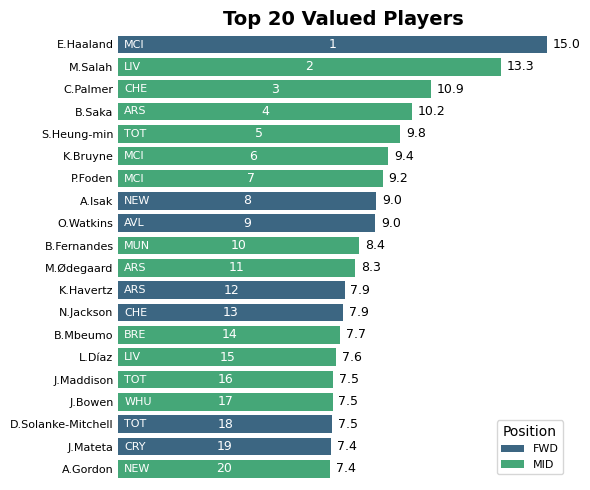

In [2562]:
# Create a Top 20 valued players table
top_valued = pivot_player.sort_values(by="avg_value", ascending=False).head(20)

# Add a short_name column
top_valued["short_name"] = top_valued["name"].apply(shorten_name)

# Create a horizontal bar chart
plt.figure(figsize=(6, 5))
ax7 = sns.barplot(
    data=top_valued,
    y="short_name",
    x="avg_value",
    hue="position",
    dodge=False,
    palette="viridis"
)
ax7.set_xlabel("")
ax7.set_ylabel("")
ax7.tick_params(axis='y', labelsize=8, length=0)
ax7.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax7.grid(False)
sns.despine(bottom = True, left = True)

# Add label to bars
for i, (value, team) in enumerate(zip(top_valued["avg_value"], top_valued["team"])):
     ax7.text(value + 0.2, i, f"{value:,.1f}", va="center", fontsize=9, color="black")         # Avg value
     ax7.text(0.2, i, team, va="center", ha="left", fontsize=8, color="white")                 # Team
     ax7.text(value / 2, i, f"{i+1}", ha="center", va="center",  fontsize=9, color="white")    # Rank

plt.title("Top 20 Valued Players", fontsize=14, fontweight="bold")
plt.legend(title="Position", loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

> 1. `Erling Haaland` leads the list with a peak value of **£15.0M**, followed closely by `Mohamed Salah` at **£13.3M**, clearly standing out as premium assets.
>
> 2. The rest of the list features a more balanced spread of `values`, mostly ranging from **£7.4M to £11M**, indicating a cluster of high-performing players that are still relatively affordable compared to `Haaland` and `Salah`.
> 3. **MIDs** dominate the chart with 13/20 players, reflecting how current FPL strategy and modern football tactics prioritize MIDs for both `points` and `value` creation.
> 4. **Top teams** such as `Arsenal` *(03 players)*, `Man City` *(03 players)*, `Liverpool` *(02 players)* and `Chelsea` *(02 players)* are heavily represented.  
> But we also see inclusions from `Brentford`, `Crystal Palace`, `West Ham` and `Newcastle`, proving that value can be found across the league.
> 5. Interestingly, many of these highly-valued players also featured in the **Top Performance** list (e.g. `Salah`, `Palmer`, `Isak`), suggesting a strong correlation between FPL price and actual performance.
> 6. A few names such as `Jean-Philippe Mateta` and `Anthony Gordon` made it into this high-value bracket, reflecting their breakout seasons and market popularity during key periods.  
>
> ➡️ **Takeaway**: MIDs dominate value in modern FPL, and while premium players remain essential, smart picks from outside the "Big 6" can deliver great returns.
---

## 7.4. **MOST EFFECTIVE** players

> ##### However, evaluating `total_points` and `value` in isolation can be misleading when judging a player's true effectiveness.  
> - A player may have a high `value` but deliver fewer `points` relative to that price, making them less efficient, despite a strong overall total.  
> - Conversely, some lower-priced players may outperform their cost dramatically.  
>##### To better understand this, <span style="background-color:#665c00; color:white;">we’ll examine player efficiency using a custom metric: **Effective Index** (`total_points`/`avg_value`) — indicating how well a player converts `value` into actual FPL returns</span>.

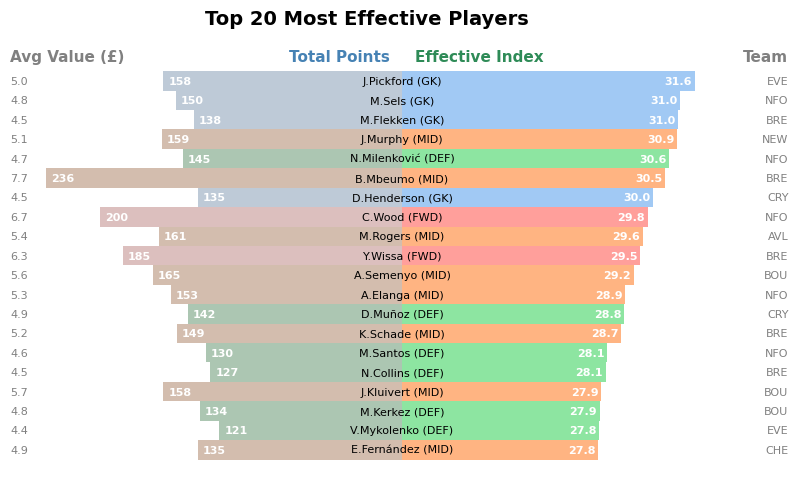

In [2588]:
# Create a table of player
pivot_player_dup = pivot_player.copy()  # Duplicate

# Add a effective_index column
pivot_player_dup["effective_index"] = pivot_player_dup["total_points"] / pivot_player["avg_value"]

# Create a table of Top 20 effective players, using effective_index
top_effective = pivot_player_dup.sort_values(by="effective_index", ascending=False).head(20)

# Add a short_name column
top_effective["short_name"] = top_effective["name"].apply(shorten_name)

# Value to be added to the chart
effective = top_effective["effective_index"]*10-200     # Adjust for better visualization
points = top_effective["total_points"]*0.6              # Adjust for better visualization
names = top_effective["short_name"]
teams = top_effective["team"]
positions = top_effective["position"]
valued = top_effective["avg_value"]

# Create a subplot
fig, ax8 = plt.subplots(figsize=(8, 5))

# Y-axis
y_pos = range(len(top_effective))

# Prepare color_pallete for 2 side of bar
from pypalettes import load_cmap
unique_positions = list(positions.unique()) # Get the unique "position"
viridis_palette1 = sns.color_palette("pastel", len(unique_positions),desat=1.0)   # Get color_pallete based on number of "position" for 01st side of bar
viridis_palette2 = sns.color_palette("pastel", len(unique_positions),desat=0.3)   # Get color_pallete based on number of "position" for 02nd side of bar
position_colors1 = dict(zip(unique_positions, viridis_palette1))  # Apply the color_pallete to the 01st"position"
position_colors2 = dict(zip(unique_positions, viridis_palette2))  # Apply the color_pallete to the 02nd"position"
bar_colors1 = [position_colors1.get(pos, "gray") for pos in positions]    # Create a list of color_pallete matching the order of "position"
bar_colors2 = [position_colors2.get(pos, "gray") for pos in positions]    # Create a list of color_pallete matching the order of "position"

# Create 02 bars: effective_index (rightside) and total_points (leftside)
ax8.barh(y_pos, effective, height=1, align='center', color=bar_colors1, label='Effective Index')
ax8.barh(y_pos, -points, height=1, align='center', color=bar_colors2, label='Total Points')             # Minus to be in the leftside

# Set the axis
ax8.set_yticks([])
ax8.set_xticks([])
# ax.axvline(0, color='black', linewidth=1)
ax8.invert_yaxis()
ax8.set_xlim(-points.max()*1.1, max(effective.max()*1.1,2.5))
ax8.set_title("Top 20 Most Effective Players", fontsize=14, weight='bold', pad=20, ha='center')

# Add label for effective_index and total_points
for i in range(len(top_effective)):
    ax8.text(effective.iloc[i] - 1, i, f"{(effective/10+20).iloc[i]:.1f}", ha='right', va='center', fontsize=8, color='white', fontweight='bold')
    ax8.text(-points.iloc[i] + 2, i, f"{(points/0.6).iloc[i]:.0f}", ha='left', va='center', fontsize=8, color='white', fontweight='bold')

# Add label for name and position
for i, (name, pos) in enumerate(zip(names, positions)):
    ax8.text(0, i, f"{name} ({pos})", ha='center', va='center', fontsize=8, color='black')

# Add label for team (leftside)
for i, teams in enumerate(teams):
    ax8.text(ax8.get_xlim()[1] * 1.2, i, teams, ha='right', va='center', fontsize=8, color='gray')

# Add label for avg value (rightside)
for i, valued in enumerate(valued):
    ax8.text(ax8.get_xlim()[0], i, round(valued,1), ha='left', va='center', fontsize=8, color='gray')

# Add title for each categorized bars
ax8.text(ax8.get_xlim()[0], -1, "Avg Value (£)", ha='left', fontsize=11, weight='bold', color='gray')
ax8.text(-5, -1, "Total Points", ha='right', fontsize=11, weight='bold', color='steelblue')
ax8.text(5, -1, "Effective Index", ha='left', fontsize=11, weight='bold', color='seagreen')
ax8.text(ax8.get_xlim()[1]* 1.2, -1, "Team", ha='right', fontsize=11, weight='bold', color='gray')

# Remove border and grid
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.spines['bottom'].set_visible(False)
ax8.grid(False)

plt.tight_layout()
plt.show()

> ##### The chart above highlights the <span style="background-color:#665c00; color:white;">**Top 20 Most Effective Players**</span> based on the <span style="background-color:#665c00; color:white;">**Effective Index**</span> (`total_points`/`Avg_value`), offering a clearer view of **value-for-money** picks.
> 1. **GKs dominate**: Players like `Jordan Pickford` *(31.6)*, `Matz Sels` *(31.0)* and `Mark Flekken` *(31.0)* top the chart, showing GKs can yield strong returns relative to their price.  
>
> 2. **Budget gems**: Several MIDs and DEFs players with relatively low `avg_value` *(£4.4M – £5.7M)* demonstrate high efficiency. Examples include `J. Murphy`, `M. Milenković` and `J. Kluivert`.  
> 3. **`Brentford` & `Nottingham Forest`** are well-represented — proving their squads housed strong `value` picks throughout the season.  
> 4. **High output, low cost**: Some players like `Chris Wood` and `Yoane Wissa` achieved **`total_points` of 185+** at very modest prices, landing them in the most effective bracket.  
> 5. **Positional spread**: While MIDs dominate the list, we also see strong contributions from GKs, DEFs and even a few FWDs — indicating that **efficiency isn't limited to any one role**.    
>
> ➡️➡️ **Key insight**: This ranking reveals that effectiveness isn't solely about big names or high price tags — it's about maximizing returns per million spent. These players offer massive strategic advantage in squad building.
---

## 7.5. **MOST INEFFECTIVE** players

> ##### After identifying the most effective players, we now shift our focus to those who <span style="background-color:#665c00; color:white;">**UNDERPERFORMED relative to their price**</span>.  
> - To ensure fairness in evaluation, we filter only players with **`avg_value` > £5.0M** in the top 200 **most `selected` players**, removing cheap fringe players whose low playtime might skew the results with extremely low `effective_index`.  
> - This refined approach helps highlight **premium or mid-priced assets** who failed to justify their cost — offering critical insight for avoiding overpriced picks in future seasons.

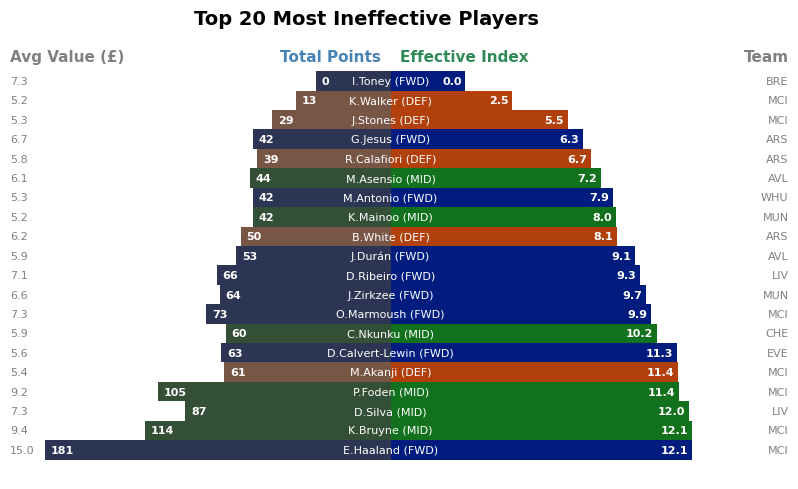

In [ ]:
# Create a table just take out top 200 selected players, and then sorting by effective_index
top_ineffective = pivot_player_dup.sort_values(by="avg_selected", ascending=False).head(200)
top_ineffective = top_ineffective.sort_values(by="effective_index", ascending=True)

# Just take out top 20 players that have avg_value>5
top_ineffective = top_ineffective[top_ineffective["avg_value"] > 5].head(20)

# Add a short_name column
top_ineffective["short_name"] = top_ineffective["name"].apply(shorten_name)

# Value to be added to the chart
effective = top_ineffective["effective_index"]+4            # Adjust for better visualization
points = top_ineffective["total_points"]*0.08+4             # Adjust for better visualization
names = top_ineffective["short_name"]
teams = top_ineffective["team"]
positions = top_ineffective["position"]
valued = top_ineffective["avg_value"]

# Create a subplot
fig, ax9 = plt.subplots(figsize=(8, 5))

# Y-axis
y_pos = range(len(top_ineffective))

# Prepare color_pallete for 2 side of bar
unique_positions = list(positions.unique()) # Get the unique "position"
viridis_palette1 = sns.color_palette("dark", len(unique_positions),desat=1.0)   # Get color_pallete based on number of "position" for 01st side of bar
viridis_palette2 = sns.color_palette("dark", len(unique_positions),desat=0.3)   # Get color_pallete based on number of "position" for 02nd side of bar
position_colors1 = dict(zip(unique_positions, viridis_palette1))  # Apply the color_pallete to the 01st "position"
position_colors2 = dict(zip(unique_positions, viridis_palette2))  # Apply the color_pallete to the 02nd "position"
bar_colors1 = [position_colors1.get(pos, "gray") for pos in positions]    # Create a list of color_pallete matching the order of "position"
bar_colors2 = [position_colors2.get(pos, "gray") for pos in positions]    # Create a list of color_pallete matching the order of "position"

# Create 02 bars: effective_index (rightside) and total_points (leftside)
ax9.barh(y_pos, effective, height=1, align='center', color=bar_colors1, label='Effective Index')
ax9.barh(y_pos, -points, height=1, align='center', color=bar_colors2, label='Total Points')

# Set the axis
ax9.set_yticks([])
ax9.set_xticks([])
# ax.axvline(0, color='black', linewidth=1)
ax9.invert_yaxis()
ax9.set_xlim(-points.max()*1.1, max(effective.max()*1.1,2.5))
ax9.set_title("Top 20 Most Ineffective Players", fontsize=14, weight='bold', pad=20, ha='center')

# Add label for effective_index and total_points
for i in range(len(top_ineffective)):
    if effective.iloc[i] > 0:
        ax9.text(effective.iloc[i] - 0.2, i, f"{(effective-4).iloc[i]:.1f}", ha='right', va='center', fontsize=8, color='white', fontweight='bold')
    if points.iloc[i] > 0:
        ax9.text(-points.iloc[i] + 0.3, i, f"{((points-4)/0.08).iloc[i]:.0f}", ha='left', va='center', fontsize=8, color='white', fontweight='bold')

# Add label for name and postion
for i, (name, pos) in enumerate(zip(names, positions)):
    ax9.text(0, i, f"{name} ({pos})", ha='center', va='center', fontsize=8, color='white')
    
# Add label for team (rightside)
for i, teams in enumerate(teams):
    ax9.text(ax9.get_xlim()[1] * 1.2, i, teams, ha='right', va='center', fontsize=8, color='gray')

# Add label for avg value (leftside)
for i, valued in enumerate(valued):
    ax9.text(ax9.get_xlim()[0], i, round(valued,1), ha='left', va='center', fontsize=8, color='gray')

# Add title for each categorized bars
ax9.text(ax9.get_xlim()[0], -1, "Avg Value (£)", ha='left', fontsize=11, weight='bold', color='gray')
ax9.text(-0.5, -1, "Total Points", ha='right', fontsize=11, weight='bold', color='steelblue')
ax9.text(0.5, -1, "Effective Index", ha='left', fontsize=11, weight='bold', color='seagreen')
ax9.text(ax9.get_xlim()[1]* 1.2, -1, "Team", ha='right', fontsize=11, weight='bold', color='gray')

# Remove border and grid
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax9.spines['bottom'].set_visible(False)
ax9.grid(False)

plt.tight_layout()
plt.show()

> ##### This chart shows players with the **lowest `Effective Index`** (`total_points`/`avg_value`) among those priced **above £5.0M**, highlighting **underperformance relative to cost**.
> 1. **Extreme cases of underperformance**:
>    - `I.Toney` stands out with an **`effective_index` of 0.0** — scoring **0 points** despite an average price of **£7.3M**.   
>      - This anomaly stems from the fact that `I.Toney` transferred to `Al Ahli` *(Saudi Pro League)* in late Aug 2024, while FPL kick-off was on Aug 15th — meaning he was still available in the game.  
>      - Surprisingly, over **170K FPL managers** still `selected` him in their squads, possibly due to **lack of awareness** or **hope for a return**.  
>      - While rare, such cases happen every season when players transfer mid-window, yet remain in the game temporarily.
>    - `K.Walker` *(2.5)* and `J.Stones` *(5.5)* also delivered notably poor returns given their cost and expectations as core `Man City` DEFs.
>
> 2. **Big club disappointments**:
>    - Many underperformers belong to **elite clubs**, such as `Man City` *(07 players)*, `Arsenal` *(03 players)*, `Liverpool` *(02 players)* and `Man Utd` *(02 players)* — suggesting that **premium teams don't always guarantee premium FPL value**.
>    - Particularly, `Man City` appears to be breaking FPL efficiency this season, as their players—previously considered essential due to EPL dominance—**failed to deliver**, leaving many FPL managers disillusioned.  
>      This stark contrast between **historic hype** and **current underperformance** made `City`’s assets a collective trap for value this year.
> 3. **Notable MIDs and FWDs failures**:
>    - MIDs like `D.Silva` (Diogo Jota), `M.Asensio` and even `K.De Bruyne` delivered **low value-for-money**.  
>      - `D.Silva` had an **underwhelming season**, offering little impact despite a high valuation.  
>      - `M.Asensio` joined `Aston Villa` on loan in *Feb 2025*, limiting his number of appearances and effectiveness.  
>      - `K.De Bruyne` spent **most of the season injured**, which heavily affected his output and justified his **low `effective_index`** despite a premium price tag.
>    - Even with a high `total_points` of **181**, `E.Haaland` only produced an `effective_index` of *12.1*, reflecting how his **£15.0M price tag limits ROI**.
> 4. **DEFs risks**:
>    - DEFs like `R.Calafiori`, `Ben White` and `M.Akanji` appeared frequently, reinforcing that **investments in premium DEFs carry significant risk** if attacking returns or `clean_sheets` dry up.
>    
> ➡️ **Key Insight**:  
>    - High price <> high effectiveness.  
>    - This list is a reminder to evaluate players not only based on name and club prestige, but on their **actual FPL Return-0n-Investment**.
---

## 7.6. **The MVP** performance

> ##### Next, we’ll take a closer look at <span style="background-color:#665c00; color:white;">**THE BEST-PERFORMING PLAYER** (the MVP)</span> of the FPL 24/25 season to understand how they consistently delivered outstanding performances across GW.
> - This deep dive will provide insights into their playing style, match impact and the relentless effort that defined the season of FPL’s top star.

In [2567]:
# Get the row that have the max total_points
top_player_row = pivot_player.loc[pivot_player["total_points"].idxmax()]

# Get the element of the player of that max total_points
top_player_element = top_player_row["element"]

# Get columns to be calculated
colll=["total_points", "value", "assists", "bonus", "goals_scored", "own_goals","penalties_missed", "penalties_saved", "yellow_cards", "red_cards","ict_index", "influence", "creativity", "threat", "selected", "starts", "transfers_balance", "minutes"]

# Create a table of GW from RAW df using the element of the max total_points
# top_player_gw = df[df["element"] == top_player_element].groupby(["element", "name","position","team","gw"])[colll].sum().sort_values("gw")

top_player_gw = df[df["element"] == top_player_element].groupby(["element", "name","position","team","gw"]).agg(
    was_home=("was_home", lambda x: ", ".join("H" if v else "A" for v in x)),
    opponent=("opponent_team_code", lambda x: list(sorted(set(x)))),
    **{col: (col, "sum") for col in colll}
).sort_values("gw")
top_player_gw["opponent"] = top_player_gw["opponent"].apply(lambda x: ", ".join(x))

# Create a table of FIXTURE from RAW df using the element of the max total_points
fixture = df[df["element"] == top_player_element].groupby(["element", "name","position","team","gw"])["fixture"].count().reset_index(name="match")

# Merge 2 tables
top_player_gw = top_player_gw.merge(fixture, on=["element", "name","position","team","gw"], how="left")

# Calculated average indexs
top_player_gw["selected"]=top_player_gw["selected"]/top_player_gw["match"]
top_player_gw["transfers_balance"]=top_player_gw["transfers_balance"]/top_player_gw["match"]
top_player_gw["value"]=top_player_gw["value"]/top_player_gw["match"]

# Format number
numeric_colllls = colll=["selected","transfers_balance"]
top_player_gw[numeric_colllls] = top_player_gw[numeric_colllls].applymap(lambda x: "" if x == 0 or pd.isna(x) else f"{int(round(x)):,}")

# Showing without value = 0
top_player_gw.replace(0,"")

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2091894898.py:33: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,element,name,position,team,gw,was_home,opponent,total_points,value,assists,bonus,goals_scored,own_goals,penalties_missed,penalties_saved,yellow_cards,red_cards,ict_index,influence,creativity,threat,selected,starts,transfers_balance,minutes,match
0,328,Mohamed Salah,MID,Liverpool,1,A,IPS,14,12.5,1,3,1,,,,,,15.2,58.0,24.4,70,"2,894,604",1,,90,1
1,328,Mohamed Salah,MID,Liverpool,2,H,BRE,10,12.5,,2,1,,,,,,9.7,38.8,6.2,52,"3,503,305",1,"198,112",82,1
2,328,Mohamed Salah,MID,Liverpool,3,A,MUN,17,12.6,2,3,1,,,,,,16.1,76.8,42.1,42,"3,748,214",1,"122,399",90,1
3,328,Mohamed Salah,MID,Liverpool,4,H,NFO,2,12.7,,,,,,,,,8.3,10.2,20.0,53,"4,742,696",1,"832,364",90,1
4,328,Mohamed Salah,MID,Liverpool,5,H,BOU,6,12.7,1,,,,,,,,20.0,42.0,68.3,90,"4,921,421",1,"162,039",90,1
5,328,Mohamed Salah,MID,Liverpool,6,A,WOL,10,12.8,,3,1,,,,,,12.7,45.6,23.6,58,"4,487,999",1,"-432,418",90,1
6,328,Mohamed Salah,MID,Liverpool,7,A,CRY,3,12.7,,,,,,,,,4.2,4.8,3.4,34,"4,240,919",1,"-270,748",72,1
7,328,Mohamed Salah,MID,Liverpool,8,H,CHE,12,12.6,1,2,1,,,,,,11.5,61.4,25.8,28,"4,011,336",1,"-252,389",90,1
8,328,Mohamed Salah,MID,Liverpool,9,A,ARS,10,12.6,,3,1,,,,,,10.1,38.6,15.8,47,"4,158,733",1,"124,097",90,1
9,328,Mohamed Salah,MID,Liverpool,10,H,BHA,9,12.7,,2,1,,,,,,11.0,38.8,21.8,49,"4,520,911",1,"320,939",90,1


> ##### A GW-by-GW analysis of `Salah`'s season reveals a story of **incredible consistency, peak performance** and **huge FPL value**:
> 1. **Total points & consistency**
>    - `Salah` accumulated **344 `total_points`**, comfortably outperforming all other players.
>    - He scored **10+ points** in **10 different GWs**, with a peak of **29 `total_points` in GW24**, showcasing his explosive FPL potential.
>    - Even in GWs without goals or assists, he still contributed with `bonus` points — a testament to his all-around impact.
>
> 2. **Assists**
>    - Registered **18 `assists`** across 38 appearances — contributing in over **50%** of the matches.
>    - Key assist spikes came in **GW3, GW17 and GW19**, when he assisted **02 `goals_scored` each**.
> 3. **Bonus points**
>    - `Salah` earned **an astounding 55 `bonus` points**, averaging **1.5 per match**.
>    - Frequently picked up 2–3 `bonus` points even in games where he didn’t score, indicating strong underlying stats and influence.
> 4. **ICT index**
>    - Maintained **high `ict_index`** throughout the season — particularly in *GW05 (20.0), GW13 (20.4), GW15 (25.2), GW17 (24.7), GW22 (30.0), GW26 (22.0)*.
>    - With the **average `ict_index` per GW of a top asset being around 12**, `Salah`’s figures reaffirm his sustained attacking influence.
> 5. **Goals scored**
>    - Netted **29 goals**, including a **hat-trick in GW24** (which contains 02 matches) and **multiple braces**.  
>    - And unsurprisingly, with such outstanding numbers, he claimed the **Golden Boot** — finishing **06 goals clear** of runner-up `Alexander Isak` *(Newcastle)*.
>    - `Salah` scored in **22/36 GWs**, maintaining a healthy strike rate of **0.6 goals per GW**.
> 6. **Starts & match involvement**
>    - `Salah` **started all 38 matches** he was available for, reinforcing his reliability as a premium asset.
>    - Maintained full fitness and selection trust from **`Klopp`** (`Liverpool`'s real-world manager) throughout the season.
> 7. **Discipline**
>    - Remarkably clean disciplinary record — **only 01 `yellow_cards` (GW11)** and **0 `red_cards`**.
>    - Demonstrates maturity, avoiding suspensions and ensuring availability.
>
> **Final remark**:
>    - `Mohamed Salah` was not just a high scorer — he was **a model of consistency**, **influenced** and **impact**.  
>    - His performance validated every penny of his premium price tag and proved why he remains an FPL legend season after season.

In [2568]:
top_player_gw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   element            36 non-null     int64  
 1   name               36 non-null     object 
 2   position           36 non-null     object 
 3   team               36 non-null     object 
 4   gw                 36 non-null     int64  
 5   was_home           36 non-null     object 
 6   opponent           36 non-null     object 
 7   total_points       36 non-null     int64  
 8   value              36 non-null     float64
 9   assists            36 non-null     int64  
 10  bonus              36 non-null     int64  
 11  goals_scored       36 non-null     int64  
 12  own_goals          36 non-null     int64  
 13  penalties_missed   36 non-null     int64  
 14  penalties_saved    36 non-null     int64  
 15  yellow_cards       36 non-null     int64  
 16  red_cards          36 non-nu

#### 7.6.+ **The MVP performance** GW by GW

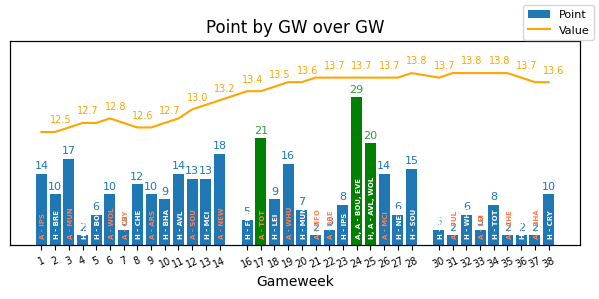

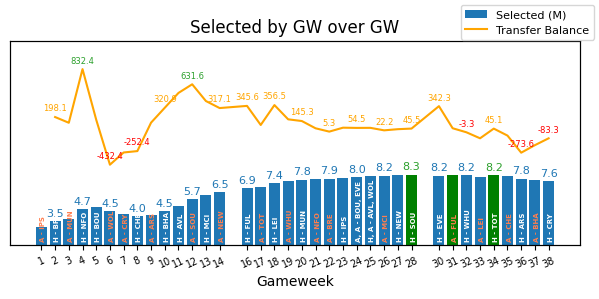

In [2581]:
### CHART 01
# Create a mix bar chart (total_points)
fig, ax10 = plt.subplots(figsize=(6,3))
bars = ax10.bar(top_player_gw["gw"], top_player_gw["total_points"],label="Point")
ax10.set_title("Point by GW over GW")
ax10.set_xlabel("Gameweek")
ax10.set_ylim(0,40)
ax10.grid(False)
ax10.set_yticks([])
ax10.set_xticks(top_player_gw["gw"])
ax10.set_xticklabels(top_player_gw["gw"],rotation=25, fontsize=7) 

# Add 2nd metric to the chart (value)
ax11 = ax10.twinx()
ax11.plot(top_player_gw["gw"], top_player_gw["value"], color="orange",label="Value")
ax11.set_ylim(10,14.5)
ax11.set_yticks([])

# Highlight top 03 (total_points)
top3 = top_player_gw.nlargest(3, "total_points")
ax10.bar(top3["gw"], top3["total_points"], color="green")

# Add label for total_points and label for top 03
top3_gw_point = top_player_gw.nlargest(3, "total_points")["gw"].tolist()
for bar, gw, val in zip(bars, top_player_gw["gw"], top_player_gw["total_points"]):
    color = "tab:green" if gw in top3_gw_point else "tab:blue"
    ax10.text(bar.get_x() + bar.get_width()/2, val+1, f"{int(val)}", ha="center", fontsize=8, color=color)

# Add label for value and label for top 03
top3_gw_value = top_player_gw.nlargest(3, "value")["gw"].tolist()
for bar, gw, val in zip(bars, top_player_gw["gw"], top_player_gw["value"]):
     if gw % 2 == 0:  # even gw
          color = "tab:green" if gw in top3_names_value else "orange"
          ax11.text(bar.get_x() + bar.get_width(), val+0.2, f"{val:.1f}", ha="center", fontsize=7, color=color)

# Add label for was_home & opponent
for bar, gw, val1, val2 in zip(bars, top_player_gw["gw"], top_player_gw["was_home"], top_player_gw["opponent"]):
    color = "coral" if val1 == "A" else "white"
    ax10.text(bar.get_x() + bar.get_width()/2 + 0.15, 1.5, val1 + " - " + val2, ha="center", fontsize=5, color=color, fontweight="bold", rotation=90)

# Add legend
fig.legend(loc="upper right",fontsize=8)

plt.tight_layout()
plt.show()




### CHART 02
# Format number for value to be shown in the chart
top_player_gw["selected2"]=pd.to_numeric(top_player_gw["selected"].str.replace(",", "").str.strip(),errors="coerce")*0.000001                                   # "Selected" is in million, need to scale down
top_player_gw["transfers_balance2"]=pd.to_numeric(top_player_gw["transfers_balance"].str.replace(",", "").str.strip(),errors="coerce")*0.001                    # "transfers_balance" is in thousand, need to scale down

# Create a mix bar chart (selected)
fig, ax12 = plt.subplots(figsize=(6,3))
bars = ax12.bar(top_player_gw["gw"], top_player_gw["selected2"],label="Selected (M)",align="center")
ax12.set_title("Selected by GW over GW")
ax12.set_xlabel("Gameweek")
ax12.set_ylim(1,22)
ax12.grid(False)
ax12.set_yticks([])
ax12.set_xticks(top_player_gw["gw"])
ax12.set_xticklabels(top_player_gw["gw"],rotation=25, fontsize=7) 

# Add 2nd metric to the chart (transfers_index)
ax13 = ax12.twinx()
ax13.plot(top_player_gw["gw"], top_player_gw["transfers_balance2"], color="orange",label="Transfer Balance")
ax13.set_ylim(-1500,1200)
ax13.set_yticks([])

# Highlight top 03 (selected)
top3 = top_player_gw.nlargest(3, "selected2")
ax12.bar(top3["gw"], top3["selected2"], color="green")

# Add label for selected and label for top 03
top3_gw_select = top_player_gw.nlargest(3, "selected2")["gw"].tolist()
for bar, gw, val in zip(bars, top_player_gw["gw"], top_player_gw["selected2"]):
    if gw % 2 == 0:  # even gw
          color = "tab:green" if gw in top3_gw_select else "tab:blue"
          ax12.text(bar.get_x() + bar.get_width()/2, val+0.5, f"{val:.1f}", ha="center", fontsize=8, color=color)

# Add label for transfers_balance and label for top 03
top3_gw_transfer_index = top_player_gw.nlargest(3, "transfers_balance2")["gw"].tolist()
for bar, gw, val in zip(bars, top_player_gw["gw"], top_player_gw["transfers_balance2"]):
     if gw % 2 == 0:  # even gw
          if gw in top3_gw_transfer_index:
               color = "tab:green" 
          elif val < 0:
               color = "red"
          else: color = "orange"
          ax13.text(bar.get_x() + bar.get_width()/2, val+80, f"{val:.1f}", ha="center", fontsize=6, color=color)

# Add label for was_home & opponent
for bar, gw, val1, val2 in zip(bars, top_player_gw["gw"], top_player_gw["was_home"], top_player_gw["opponent"]):
    color = "coral" if val1 == "A" else "white"
    ax12.text(bar.get_x() + bar.get_width()/2 + 0.15, 1.5, val1 + " - " + val2, ha="center", fontsize=5, color=color, fontweight="bold", rotation=90)

# Add legend
fig.legend(loc="upper right",fontsize=8)

plt.tight_layout()
plt.show()

> 1. **Points vs. Value**
>    - `Salah` maintained a consistently **high `value`**, gradually increasing from **£12.5M in GW01** to a peak of **£13.8M during GWs 27–32**.
>    - His point output was volatile, with explosive GWs like **GW22 (29 points)** and **GW17 (21 points)**, but also multiple low-output GWs — notably *GW06, GW20–21 and GW33–37 (~ 02-03 pts)*.
>    - Post-GW28, there was a visible dip in form, likely due to fatigue or `Liverpool`’s overall team performance, despite him maintaining a premium price.
>    - Notably, `Salah`’s **03 highest-scoring GWs** (GW17, GW24, GW25) all came in `Away` fixture, reinforcing his status as a reliable big-game performer on the road.
> 2. **No. of Selected vs. Transfer balance**
>   - `Salah`’s ownership steadily rose from **3.5M (GW01)** to **8.3M (GW26–30)**, showing growing trust.
>   - Big **positive transfer balances** after strong GWs (e.g. **+832K in GW04**, **+631K in GW12**).
>   - **Negative balances** followed poor form (e.g. **–442K in GW06**, **–252K in GW08**, **–276K in GW36**).
>   - Despite dips, he maintained high ownership—highlighting his **long-term value** and **manager loyalty**.
>
> **Insight**:
>   - `Salah` was a **fixture-proof `captain` option** with **explosive ceilings**.
>   - His value was resilient to form dips, supported by consistent selections.
>   - The combination of **performance volatility**, **high transfer activity** and **strong long-term ownership** reflects `Salah`’s status as a **top-tier FPL asset**, regardless of short-term form.
---

## 7.7. Best players of **EACH POSITION**

> ##### To better understand team structure and optimize squad selection, let’s explore the <span style="background-color:#665c00; color:white;">**Top-performing players by POSITION**</span> — from GKs to FWDs — based on their overall impact throughout the 24/25 FPL season.
> - This section helps highlight the **most consistent and impactful choices** per position, making it easier to identify core players for building a balanced and competitive team.

In [2583]:
# Create a Top 10 players of each position table 
top5_by_position = (
    pivot_player
    .sort_values(by="total_points", ascending=False)
    .groupby("position")
    .head(10)
)

# Get numeric columns
numeric_cols5 = top5_by_position.select_dtypes(include="number").columns.drop(["avg_points","avg_value","avg_ict_index", "avg_creativity", "avg_influence", "avg_threat"])

# Format numeric columns
top5_by_position[numeric_cols5] = top5_by_position[numeric_cols5].applymap(lambda x: "" if x == 0 or pd.isna(x) else f"{x:,.0f}")

# Adjust desired order of columns
desired_order3 = ["name","position","team","avg_value","total_points", "avg_points","assists","bonus","clean_sheets",
                  "goals_scored","own_goals","saves", "penalties_missed","penalties_saved","yellow_cards","red_cards","starts",
                  "avg_ict_index", "avg_creativity", "avg_influence", "avg_threat", "avg_minute","avg_selected",
                  "avg_transfers_balance","match_played"]

# Remove value=0
top5_by_position = top5_by_position[desired_order3].replace("0.0", "")

# Desired order for "position"
position_order = ["FWD", "MID", "DEF", "GK"]

# Apply desired order to "position"
top5_by_position["position"] = pd.Categorical(
    top5_by_position["position"],
    categories=position_order,
    ordered=True
)

# Sort by position and total_poins
top5_by_position = top5_by_position.sort_values(by=["position","total_points"], ascending=[True, False]) 
top5_by_position

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/3188282195.py:13: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,name,position,team,avg_value,total_points,avg_points,assists,bonus,clean_sheets,goals_scored,own_goals,saves,penalties_missed,penalties_saved,yellow_cards,red_cards,starts,avg_ict_index,avg_creativity,avg_influence,avg_threat,avg_minute,avg_selected,avg_transfers_balance,match_played
400,Alexander Isak,FWD,NEW,9.0,211,5.6,6,36,12,23,,,,,1,,34,7.7,15.1,27.4,34.7,73,"4,791,173","12,537",34
446,Chris Wood,FWD,NFO,6.7,200,5.3,3,41,15,20,,,,,1,,35,5.4,8.4,22.1,23.7,78,"2,961,009","70,410",36
57,Ollie Watkins,FWD,AVL,9.0,186,4.9,8,32,10,16,,,,,2,,31,5.9,9.1,20.2,30.2,68,"2,414,508","15,088",38
109,Yoane Wissa,FWD,BRE,6.3,185,4.9,6,32,9,18,,,,,5,,34,6.4,10.5,22.4,31.1,77,"1,185,665","61,151",35
350,Erling Haaland,FWD,MCI,15.0,181,4.8,3,26,10,22,,,1,,2,,31,7.4,9.5,24.9,39.8,72,"4,475,868","-83,549",31
540,Matheus Santos Carneiro Da Cunha,FWD,WOL,6.8,178,4.7,7,41,7,15,,,,,4,,29,7.2,22.3,24.6,24.7,68,"1,221,488","30,892",33
206,Jean-Philippe Mateta,FWD,CRY,7.4,150,3.9,2,27,9,14,,,,,2,,33,4.9,10.7,17.7,21.1,70,"824,107","50,284",37
251,Raúl Jiménez,FWD,FUL,5.5,147,3.9,3,26,7,12,,,,,4,,30,5.3,9.8,16.1,26.8,65,"721,254","11,180",38
565,Jørgen Strand Larsen,FWD,WOL,5.4,145,3.8,4,17,7,14,,,,,4,,30,4.7,8.0,17.0,22.3,68,"285,259","6,360",35
267,Liam Delap,FWD,IPS,5.6,132,3.5,2,22,3,12,,,,,12,,32,4.1,7.6,13.5,20.6,68,"370,697","7,078",37


> 1. **Forwarders (FWD)**: This group saw fierce competition. Names like `Alexander Isak`, `Ollie Watkins` and `Erling Haaland` each delivered 20+ `goals_scored`, backed by consistent match time and impressive returns over the season.
>
> 2. **Midfielders (MID)**: Perhaps the most influential group, led by `Mohamed Salah` with a massive haul, followed by breakout stars like `Cole Palmer` and `Bryan Mbeumo` — combining `goals_scored`, `assists` and `ict_index` to dominate the FPL points board.
> 3. **Defenders (DEF)**: Although not as flashy in scoring, DEFs like `Joško Gvardiol`, `Trent Alexander-Arnold` and `Virgil van Dijk` anchored their teams with `clean_sheets`, `assists` and `bonus` points.
> 4. **Goalkeepers (GK)**: While generally scoring lower, GKs such as `Jordan Pickford`, `Matz Sels` and `David Raya` stood out through high `saves` counts and consistent `clean_sheets` records.
>
> ➡️➡️ These top performers demonstrate the value of consistency, regular playing time and all-round contribution — key factors for every successful FPL squad.  
>
> *To better understand how players performed across different positions, the following visualizations highlight the **top players** in each position based on their `total_points`, `avg_value` and how frequently they were `selected`.*


### 7.7.+ Visualize top 10 players of **EACH POSITION**

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/257105436.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/257105436.py:40: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/257105436.py:41: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select t

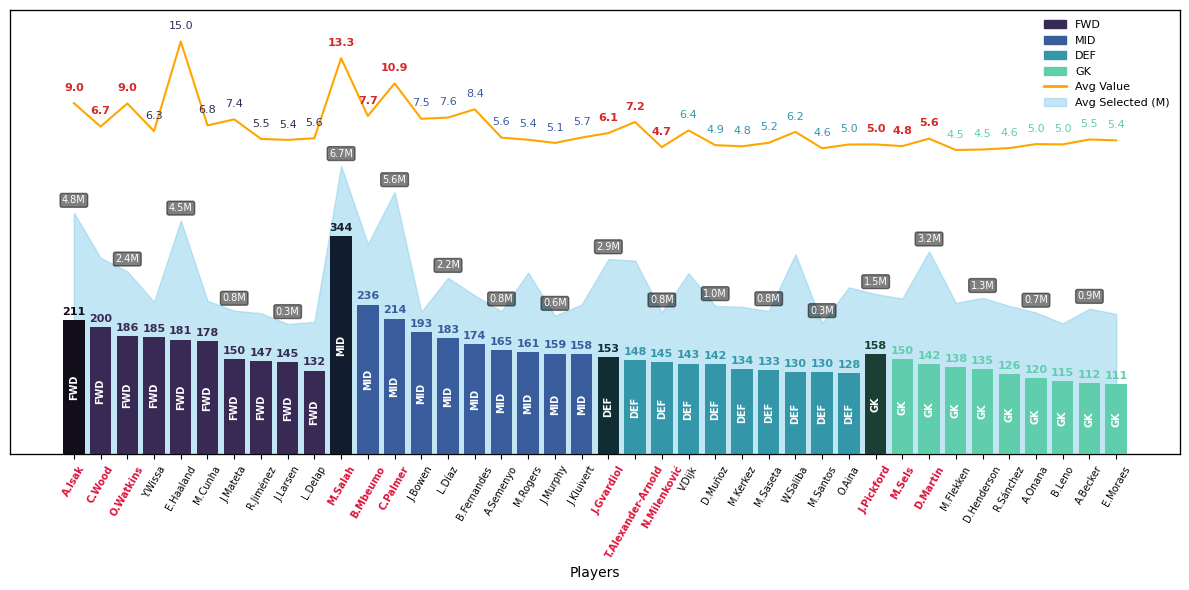

In [2584]:
import matplotlib.patches as mpatches

# Add a short_name column
top5_by_position["short_name"] = top5_by_position["name"].apply(shorten_name)

# Cast the columns to be shown from object to numeric
top5_by_position["total_points"] = top5_by_position["total_points"].astype(float)
top5_by_position["avg_value"] = top5_by_position["avg_value"].astype(float)
top5_by_position["avg_selected2"]=pd.to_numeric(top5_by_position["avg_selected"].str.replace(",", "").str.strip(),errors="coerce")

# Create color_pallete for "position"
unique_positions = top5_by_position["position"].unique()        # Get unique "position"
palette = sns.color_palette("mako", len(unique_positions))      # Get number of color_pallete
position_colors = dict(zip(unique_positions, palette))          # Create a dictionary of each "position" with each color_pallete 
bar_colors = [position_colors[pos] for pos in top5_by_position["position"]]     # Create a table for apply color_pallete to target table

# Get the index of the max total_points of each position
top1_idx = top5_by_position.groupby("position")["total_points"].idxmax().tolist()

# Highlight the Top 01 of each position (with darker color_pallete)
highlight_colors = []
for idx, pos in zip(top5_by_position.index, top5_by_position["position"]):
    base_color = position_colors[pos]
    if idx in top1_idx:
        highlight_colors.append(tuple(min(1, c * 0.3) for c in base_color))         # Increase the dark of color_pallete
    else:
        highlight_colors.append(base_color)

# Create a mix bar chart (total_points)
fig, ax14 = plt.subplots(figsize=(12,6))
bars = ax14.bar(top5_by_position["short_name"], top5_by_position["total_points"],color=highlight_colors)
ax14.set_xlabel("Players")
ax14.set_ylim(0,700)
ax14.grid(False)
ax14.set_yticks([])
ax14.set_xticks(top5_by_position["short_name"])

# Get Top 03 of each position
top3_names = (
    top5_by_position.groupby("position")
    .apply(lambda x: x.nlargest(3, "total_points"))
    .reset_index(drop=True)["short_name"]
    .tolist()
)

# Highlight Top 03: X-axis, fontcolor and fontweight
xticks = ax14.get_xticklabels()
for label in xticks:
    if label.get_text() in top3_names:
        label.set_color("crimson")
        label.set_fontweight("bold")

# X-axis
ax14.set_xticklabels(top5_by_position["short_name"],rotation=60, fontsize=7) 

# Add 2nd metric to the chart (Avg value)
ax15 = ax14.twinx()
ax15.plot(top5_by_position["short_name"], top5_by_position["avg_value"], color="orange",label="Avg Value")
ax15.set_ylim(-25,18)
ax15.set_yticks([])

# Add 3rd metric to the chart (Avg selected)
ax16 = ax14.twinx()
ax16.set_ylim(0,18)
ax16.set_yticks([])
ax16.fill_between(
    top5_by_position["short_name"], 
    top5_by_position["avg_selected2"]*0.000001+5,           # Adjust for better visualization
    color='skyblue',
    alpha=0.5,
    label='Selected (M)',
)

# Make the 01st metric to be in front
ax14.set_zorder(ax16.get_zorder() + 1)
ax14.patch.set_visible(False)           # Make background of 01st metric to be transparent

# Add label for total_points
for bar, val, color in zip(bars, top5_by_position["total_points"], highlight_colors):
    ax14.text(bar.get_x() + bar.get_width()/2, val + 5, f"{val:.0f}", ha='center', va='bottom', fontsize=8, fontweight='bold', color=color)

# Add label for name and label for top 03
for bar, name, val, color in zip(bars, top5_by_position["short_name"], top5_by_position["avg_value"], highlight_colors):
    if name in top3_names:
        ax15.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}", ha='center', va='bottom', fontsize=8, color='tab:red', fontweight='bold')
    else:
        ax15.text( bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}", ha='center', va='bottom', fontsize=8, color=color)

# Add label for position
for bar, pos, val in zip(bars, top5_by_position["position"], top5_by_position["total_points"]):
    ax14.text(bar.get_x() + bar.get_width()/2, val/2, pos, ha='center', va='center', fontsize=7, fontweight='bold', color='white', rotation=90)

# Add label for selected and just show label in even index (for better visualization)
for i, (x, y) in enumerate(zip(top5_by_position["short_name"], top5_by_position["avg_selected2"]*0.000001)):
    if y > 0 and i % 2 == 0:  # Just show label in even index (0,2,4,...)
        ax16.text(x, y+5.5, f"{y:.1f}M", ha='center', va='center', fontsize=7, color='white', bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.2'))

# Add manual legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
position_handles = [Patch(color=color, label=pos) for pos, color in position_colors.items()]        # Create a patch of color_pallete for Position
line_handle = Line2D([0], [0], color='orange', lw=2, label='Avg Value')                             # Create a line for Avg value
area_handle = Patch(color='skyblue', alpha=0.5, label='Avg Selected (M)')                           # Create a patch for Selected
all_handles = position_handles + [line_handle, area_handle]                                         # Merge all legends

# Adjust legend
ax14.legend(handles=all_handles, loc='upper right', fontsize=8, frameon=False)

plt.tight_layout()
plt.show()

In [2596]:
highlight_colors

[(0.06640893, 0.04941573899999999, 0.09912429299999999),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.2213631, 0.16471913, 0.33041431),
 (0.06724193099999999, 0.109462023, 0.182984814),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.22413977, 0.36487341, 0.60994938),
 (0.061295762999999996, 0.177422526, 0.19890053700000002),
 (0.20431921, 0.59140842, 0.66300179),
 (0.20431921, 0.59140842, 0.66300179),
 (0.20431921, 0.59140842, 0.66300179),
 (0.20431921, 0.59140842

> 1. **Insights**
>
>    - **MIDs** clearly dominate in terms of **`total_points`**, with `Mohamed Salah` scoring an extraordinary **344 `total_points`**, far above all other positions.  
>      - **MIDs** also leads in **`avg_selected`**, with multiple MIDs surpassing **2.0M** `avg_selected`, highlighting their popularity and reliability throughout the season.
>      - **`avg_value`** for MIDs fluctuates but includes some of the highest-priced players *(e.g. `Salah` at £13.3, `Palmer` at £10.9)*, reflecting their influence in FPL squads.
>    - **FWDs** also delivered strong returns, especially from `Isak` *(211 pts)* and `C.Wood` *(200 pts)*. Their `avg_value` remains moderate *(mostly £6.0M – £9.0M)*, offering a solid point-to-value ratio.
>
>    - Despite fewer selections, **DEFs** contributed steadily with many in the **130–150 `total_points`** range, and with much lower **`avg_value`** (~£4.6M – £6.4M). This makes DEFs cost-effective picks.
>    - **GKs** posted the lowest **`total_points`**, averaging around **120–150 `total_points`**, but maintained **stable `selection` numbers** and **affordable `values`** (~£4.5M – £5.5M), reinforcing their budget-friendly nature.
> 2. **Positions compared**
>    - In terms of **`total_point`**, the ranking goes: *MID > FWD > DEF > GK*.
>
>    - For **`avg_value`**, MID and FWD tend to be higher priced, while DEF and GK are more budget-friendly.
>    - On **`avg_selected` (M)**, MIDs again leads, showing how central they are in fantasy strategy, followed by GKs (likely due to set-and-forget picks), and then FWDs and DEFs.
> 3. **Other highly `selected` players**
>    - `Luis Díaz` (MID) was `selected` by **2.2M managers** on average, delivering a decent **183 `total_points`** at a modest **£7.6M value** — a solid mid-tier pick especially when fit and starting.
>
>    - `William Saliba` (DEF) reached **3.1M `avg_selected`** — the highest among DEFs — and while his **130 `total_points`** was not exceptional, his consistent starts for `Arsenal` made him a reliable option at **£6.2M value**.
>    - `Ollie Watkins` (FWD) saw **2.4M `avg_selected`** and **186 `total_points`**, proving popular and productive at a fair price of **£9.0M** — a dependable FWD in many squads.
>    - `Trent Alexander-Arnold` (DEF), despite only **148 `total_points`**, maintained a high **2.9M `avg_selected`** due to his attacking threat and reputation. However, his **£7.2M value** was a bit steep given his return.
>    - `D.Martin` (GK) also reached **3.2M `avg_selected`** despite only **142 `total_points`**, mainly due to his starting role at a very low cost, making him a go-to budget GK throughout the season.
>
> ➡️➡️ Overall, MIDs offered the best returns across all dimensions, while DEFs provided great value per pound, and GKs remained stable, low-cost contributors.
---


## 7.8. **DREAM TEAM**

> ##### After evaluating individual performances, it’s time to construct the <span style="background-color:#665c00; color:white;">**ultimate DREAM TEAM**</span> of the season — a 15-man squad selected based on a mix of `total_points` and `position` balance.
>
> Following the official **FPL structure**, the team includes:
> - **2 GKs**
> - **5 DEFs**
> - **5 MIDs**
> - **3 FWDs**
>
> The selection prioritizes overall performance, consistency and strategic value across all 38 GWs.


In [2585]:
# Create a list of number of players for each Position
position_top_n = {
    "FWD": 3,
    "MID": 5,
    "DEF": 5,
    "GK": 2
}

# Create a table from Top 10 players of each Position
best_team = (
    top5_by_position
    .groupby("position", group_keys=False)
    .apply(lambda x: x.nlargest(position_top_n.get(x.name, 0), "total_points"))         # Apply the number of players for each Position to the Top
)

# Format number for avg_points column
top5_by_position["avg_points"] = top5_by_position["avg_points"].astype(float)

# Results
print("Total total_point",best_team["total_points"].sum())
print("Total avg_value",best_team["avg_value"].sum())
print("Total avg_point",best_team["avg_points"].sum())
best_team[["short_name","position","team","avg_value","total_points","avg_points"]]

Total total_point 2806.0
Total avg_value 110.80526315789476
Total avg_point 73.8421052631579


/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/851497713.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/851497713.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,short_name,position,team,avg_value,total_points,avg_points
400,A.Isak,FWD,NEW,9.0,211.0,5.6
446,C.Wood,FWD,NFO,6.7,200.0,5.3
57,O.Watkins,FWD,AVL,9.0,186.0,4.9
327,M.Salah,MID,LIV,13.3,344.0,9.1
98,B.Mbeumo,MID,BRE,7.7,236.0,6.2
181,C.Palmer,MID,CHE,10.9,214.0,5.6
513,J.Bowen,MID,WHU,7.5,193.0,5.1
326,L.Díaz,MID,LIV,7.6,183.0,4.8
349,J.Gvardiol,DEF,MCI,6.1,153.0,4.0
310,T.Alexander-Arnold,DEF,LIV,7.2,148.0,3.9


> **DREAM TEAM Overview**:
> 1. **`total_points`**: The selected 15-man Dream Team accumulated a massive **2,806 points** across the season, an impressive return well above the average team benchmark.
>
> 2. **Total `avg_value`**: With a combined average value of **£110.8M**, this Dream Team slightly exceeds the traditional £100M FPL budget. This reflects the premium quality and consistent performance of top players chosen across all positions.
> 3. **Total `avg_points` per Player**: On average, each player contributed **~73.9 `total_points`**, underscoring the high baseline of performance required to make it into this elite squad.
>
> **Position**:
> 1. **MIDs** were the biggest contributors, led by `Mohamed Salah` *(344 pts)*, followed by `B.Mbeumo` *(236 pts)* and `C.Palmer` *(214 pts)* — all offering strong attacking returns and `bonus` points.
>
> 2. **FWDs** such as `A.Isak` *(211 pts)* and `C.Wood` *(200 pts)* showcased consistent `goals_scored` output and value-for-money picks, outperforming big names like `Haaland`.
> 3. **DEFs** had solid outputs, with `J.Gvardiol` *(153 pts)* and `T.Alexander-Arnold` *(148 pts)* contributing through `clean_sheets` and attacking returns.
> 4. **GKs** like `J.Pickford` *(158 pts)* and `M.Sels` *(150 pts)* offered stable returns in both `saves` and `clean_sheets`, making them top picks in their price bracket.
>
> ➡️➡️ Overall, the team balances star power with smart value picks, ensuring consistent point accumulation across the pitch.
---

# 8. Build **YOUR FPL TEAM**

## 8.1 **BUILD** your team

> ##### With standout players identified across all positions, the next step is to <span style="background-color:#665c00; color:white;">**construct an optimal 15-man squad that maximizes `total_point`**</span> while respecting strict FPL constraints:
> 1. **Budget**: Limited to **£100 million**  
> 2. **Squad structure**: Must include **2 GKs**, **5 DEFs**, **5 MIDs** and **3 FWDs**  
> 3. **Team cap**: No more than **03 players** can be selected from the same EPL 
> 
> The objective is to build the most efficient team — blending high-performing stars with smart budget enablers — that would theoretically yield the **highest possible `total_point`** across the season.

In [2586]:
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, LpBinary

# Create a dataframe from pivot_player, reset index
df2 = pivot_player.copy().reset_index(drop=True)

# Add an index column
df2["player_id"] = df2.index

# Rules to build a team
position_limits = {"FWD": 3, "MID": 5, "DEF": 5, "GK": 2}       # Max players of each position
total_value_limit = 100                                         # Max value of team
total_player_limit = 15                                         # Max players of team

# Decision variable: player index
players = df2["player_id"].tolist()
x = LpVariable.dicts("player", players, cat=LpBinary)

# Solve the case with LpProblem
prob = LpProblem("Dream_team_build_up", LpMaximize)

# Target 1: Reach the Max of total points
prob += lpSum([x[i] * df2.loc[df2["player_id"] == i, "total_points"].values[0] for i in players]), "TotalPoints"

# Target 2: Total avg value ≤ 100
prob += lpSum([x[i] * df2.loc[df2["player_id"] == i, "avg_value"].values[0] for i in players]) <= total_value_limit, "TotalAvgValue"

# Target 3: Max players = 15
prob += lpSum([x[i] for i in players]) == total_player_limit, "TotalPlayers"

# Target 4: Max players of each position
for pos, count in position_limits.items():
    prob += lpSum([x[i] for i in players if df2.loc[df2["player_id"] == i, "position"].values[0] == pos]) == count, f"Position_{pos}"

# Solving
prob.solve()

# Results
your_team_list = df2[df2["player_id"].isin([i for i in players if x[i].varValue == 1])]
your_team_list = your_team_list[["name", "position", "team", "total_points", "avg_value"]].sort_values(by="position")

# Summarize results
print(f"⭐ Total avg_value: {your_team_list['avg_value'].sum():.1f}")
print(f"🏆 Total total_points: {your_team_list['total_points'].sum()}")
# your_team_list.reset_index(drop=True)

# Apply desired order for results
your_team_list["position"] = pd.Categorical(
    your_team_list["position"],
    categories=position_order,
    ordered=True
)

# Sort by position and total_points
your_team_list["avg_value"]=your_team_list["avg_value"].round(1)
your_team_list = your_team_list.sort_values(by=["position","total_points"], ascending=[True, False]) 
your_team_list

# selected.reset_index(drop=True).to_csv("best_16_players.csv", index=False)


Python(71270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/tainguyen/Desktop/Python/venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/66b2004caa6d46f7bcaddc47a90be966-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/66b2004caa6d46f7bcaddc47a90be966-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 4493 RHS
At line 4500 BOUNDS
At line 5285 ENDATA
Problem MODEL has 6 rows, 784 columns and 2352 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2740.23 - 0.01 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 6 rows, 606 columns (606 integer (578 of which binary)) and 1818 elements
Cutoff increment increased from 1e-05 to 0.9999
C

,name,position,team,total_points,avg_value
400,Alexander Isak,FWD,NEW,211,9.0
446,Chris Wood,FWD,NFO,200,6.7
109,Yoane Wissa,FWD,BRE,185,6.3
327,Mohamed Salah,MID,LIV,344,13.3
98,Bryan Mbeumo,MID,BRE,236,7.7
513,Jarrod Bowen,MID,WHU,193,7.5
326,Luis Díaz,MID,LIV,183,7.6
77,Antoine Semenyo,MID,BOU,165,5.6
349,Joško Gvardiol,DEF,MCI,153,6.1
572,Nikola Milenković,DEF,NFO,145,4.7


> The **FINAL SQUAD** was carefully assembled under the FPL constraints, and the outcome demonstrates a well-balanced, high-efficiency team:
> 1. **Total `avg_value`**: **£99.3M** — comfortably within the £100M budget cap.
>
> 2. **Total `total_points`**: **2732** — a solid figure, but note that this is the sum of individual points only.  
>    - The total `total_points` doesn't account for actual gameplay mechanics like `starting 11`, `captaincy` or `chips` such as `Wildcard` or `Bench Boost`.
>
>         * The **`Captain`**'s points are doubled and the **`Vice Captain`** steps in only if the captain does not play.
>         * A **`Wildcard`** allows unlimited free transfers in a GW, typically used to reset the team or adapt to fixture swings.
>         * `Bench Boost`, `Triple Captain` and `Free Hit` are also **`chips`** that can significantly boost returns but are not considered in this base calculation.
>    - So, while **2732 `total_points`** represents strong **individual contributions**, the **realistic weekly scoring** would depend on team management decisions and chip usage throughout the season.
> 3. **Key observations**:
>    - **`Mohamed Salah`** *(344 pts)* anchors the midfield with the **highest individual score**, justifying his premium £13M valuation.
>
>    - Despite lower prices (~£5.0 – £6.0M), DEFs like **`Joško Gvardiol`**, **`Milenković`** and **`Muñoz`** delivered **140+ `total_points`**, showing excellent point-to-cost efficiency.
>    - Budget MIDs such as **`Antoine Semenyo`** and **`Luis Díaz`** played key supporting roles with **160–180 `total_points`** at a mid-range value.
>    - Up front, the strike trio of **`Isak`**, **`Wood`** and **`Wissa`** provided strong returns without exceeding £9.0M each — balancing value and output effectively.
>    - The squad maintains **team diversity**, with no more than 03 players from any single club — complying with FPL regulations while spreading risk and maximizing returns.
>
> ➡️➡️ Overall, this dream team illustrates how smart value picks and well-distributed investments can yield elite performance even under strict constraints.
---

## 8.2. **VISUALIZE** your team

> ##### To better understand **OUR TEAM**, we’ve <span style="background-color:#665c00; color:white;">visualized the squad in a realistic **football pitch formation**</span>.  
> - This gives us a clear view of how each position contributes in terms of both **value** and **performance**.

/Users/tainguyen/Desktop/Python/venv/lib/python3.13/site-packages/mplsoccer/_pitch_base.py:425: PendingDeprecationWarning:

The set_tight_layout function will be deprecated in a future version. Use set_layout_engine instead.



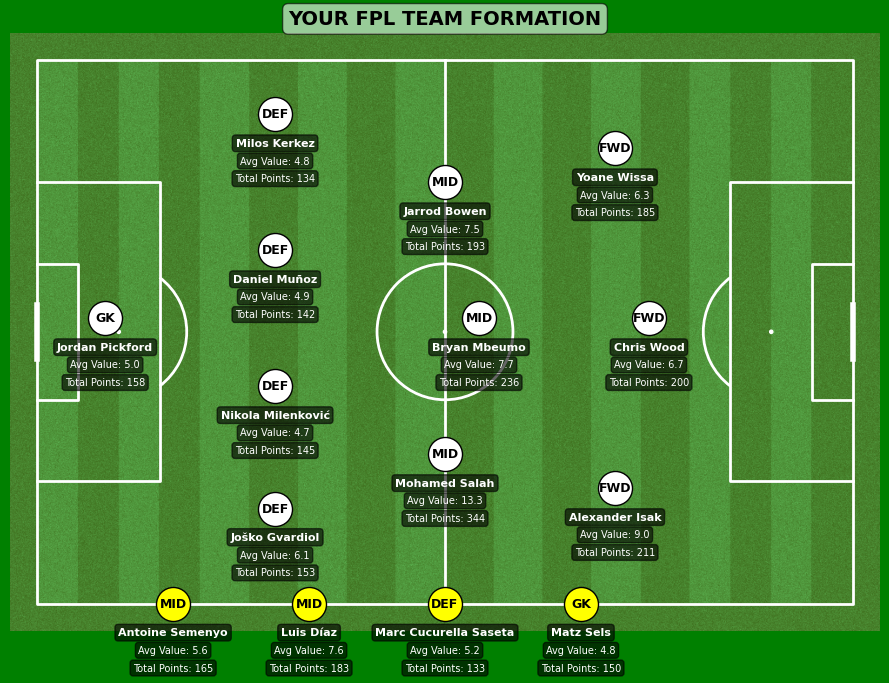

In [2587]:
from matplotlib.patches import Rectangle
from mplsoccer import Pitch

# Desired order for Position
position_order = ["GK", "DEF", "MID", "FWD"]

# Apply desired order for Position
your_team_list["position"] = pd.Categorical(your_team_list["position"], categories=position_order, ordered=True)

# Create a table sorting by Position and Total_points
your_team_list = your_team_list.sort_values(by=["position", "total_points"], ascending=[True, False])

# Create a table of main line-up
starting_11 = pd.concat([
    your_team_list[your_team_list["position"] == "GK"].head(1),
    your_team_list[your_team_list["position"] == "DEF"].head(4),
    your_team_list[your_team_list["position"] == "MID"].head(3),
    your_team_list[your_team_list["position"] == "FWD"].head(3)
])

# Create a table of substitution
bench = your_team_list[~your_team_list["name"].isin(starting_11["name"])].reset_index(drop=True)

# Reset index for line-up table to be a normal table
starting_11 = starting_11.reset_index(drop=True)

# Create a footbal pitch chart
pitch = Pitch(pitch_color='grass',stripe=True,line_color='white')
fig, ax = pitch.draw(figsize=(9, 12),tight_layout=True)
fig.patch.set_facecolor('green')

### Create a dictionary for each Position (by x-y)
# Dictionary for line-up
positions_vertical = {
    "FWD": [(30, 85), (55, 90), (80, 85)],
    "MID": [(35, 60), (55, 65), (75, 60)],
    "DEF": [(27, 35), (45, 35), (65, 35), (85, 35)],
    "GK":  [(55, 10)]
}
# Dictionary for substitution
bench_coords = [(0, 80), (0, 60), (0, 40), (0, 20)]

# Rotate x, y from horizontal to vertical
def rotate(x, y):
    return y, 100 - x

# Add line-up players
for pos in ["FWD", "MID", "DEF", "GK"]:
    players = starting_11[starting_11.position == pos]
    coords = positions_vertical[pos]
    for (x, y), p in zip(coords, players.to_dict('records')):
        x_rot, y_rot = rotate(x, y)
        # Add player names
        ax.text(x_rot, y_rot - 2, p['name'],ha='center', va='bottom', fontsize=8, color='white', fontweight='bold',bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))
        # Add player values
        ax.text(x_rot, y_rot + 0.6, f"Avg Value: {p['avg_value']:.1f}",ha='center', va='bottom', fontsize=7, color='white',bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))
        # Add player total_points
        ax.text(x_rot, y_rot + 3.2, f"Total Points: {p['total_points']}",ha='center', va='bottom', fontsize=7, color='white',bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))
        # Add a scatter to the player
        ax.scatter(x_rot, y_rot - 7, marker='o', s=600, edgecolors='black', facecolors='white')
        # Add player position
        ax.text(x_rot, y_rot - 7, pos, ha='center', va='center', fontsize=9, color='black', fontweight='bold')

# Add substitute players
for (x, y), p in zip(bench_coords, bench.to_dict('records')):
    x_rot, y_rot = rotate(x, y)
    # Add a scatter to the player
    ax.scatter(x_rot, y_rot-20, marker='o', s=600, edgecolors='black', facecolors='yellow')
    # Add player position
    ax.text(x_rot, y_rot - 20, p['position'], ha='center', va='center', fontsize=9, color='black', fontweight='bold')
    # Add player names
    ax.text(x_rot, y_rot - 15, p['name'],ha='center', va='bottom', fontsize=8, color='white', fontweight='bold',bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))
    # Add player values
    ax.text(x_rot, y_rot - 12.4, f"Avg Value: {p['avg_value']:.1f}",ha='center', va='bottom', fontsize=7, color='white',bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))
    # Add player total_points
    ax.text(x_rot, y_rot - 9.8, f"Total Points: {p['total_points']}",ha='center', va='bottom', fontsize=7, color='white',bbox=dict(facecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))

# Show chart
plt.title("YOUR FPL TEAM FORMATION", fontsize=14, fontweight='bold', color="black", bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.3'))
plt.tight_layout()
plt.savefig("Your_FPL_team_vertical.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()



> **OUR TEAM** is presented in a **4-3-3 formation**, a balanced and widely-used setup in both real-life football and FPL.  
>         * This formation offers <span style="background-color:#665c00; color:white;">defensive stability</span>, <span style="background-color:#665c00; color:white;">midfield control</span> and <span style="background-color:#665c00; color:white;">attacking firepower</span> — making it ideal for maximizing `total_points` across all lines.
>
> 1. **Why 4-3-3?**
>    - **Defensive solidity**: With **04 DEFs**, this structure ensures a strong foundation, especially when DEFs like `Joško Gvardiol`, `Nikola Milenković`, `Daniel Muñoz` and `Milos Kerkez` all have high appearance counts and reliable `total_points` returns.
>
>    - **Midfield control**: A compact **03-man MIDs** centers around `Mohamed Salah`, `Bryan Mbeumo` and `Jarrod Bowen` — each of whom contributes both `goals_scored` and `assists`, making up for the fewer midfield slots.
>    - **Attacking trio**: The **front 03**—`Alexander Isak`, `Chris Wood` and `Yoane Wissa`—are selected for their consistent scoring and `value`, forming a powerful attacking line that can deliver GW after GW.
>
> 2. **Bench strength**: The bench includes flexible, value-for-money options like:
>    - **GK**: `Matz Sels` (£4.8M `value` | 150 `total_points`)
>
>    - **DEF**: `Marc Cucurella` (£5.2M `value` | 133 `total_points`)
>    - **MID**: `Luis Díaz` and `Antoine Semenyo` — both capable of rotating into the starting XI depending on fixtures or form.
>
> ➡️➡️ This 4-3-3 setup strikes an excellent **balance between consistency and explosiveness**, providing flexibility to adapt to fixture difficulty, form and injuries, while still fitting within budget and team limits.
---

## 8.3. Your team **DATAFRAME**

> ##### In the next step, we will <span style="background-color:#665c00; color:white;">construct a new DataFrame called **"YOUR TEAM"**</span>. <br> This will capture the weekly performance of each selected player across all GWs.
> * However, due to fixture rescheduling — such as teams missing a GW and later playing a *Double GW* — **not every player has data for all 38 GWs** in the original dataset.  
>
> * To ensure completeness and consistency for analysis, we need to <span style="background-color:#665c00; color:white;">**fill in the missing GWs**</span> for each player. These added rows will contain 0 `total_points` but will allow for more robust and uniform querying of player performance.
> * Once the full GWs coverage is ensured, we will simulate team selection for each GW by:
>    1. Picking the **BEST STARTING XI** based on `total_points` for that GW.
>
>    2. Respecting the positional structure (4-3-3): 01 GK, 04 DEFs, 03 MIDs, 03 FWDs and 04 substitutions
>    3. Add a `gw_played` column to determine if the player was selected to `start` or `benched`
>
> This approach will allow us to:
>    - *Track how many times each player was actually used*
>    - *Evaluate real contributions to the total team score*
>    - *Prepare for further calculations such as `captain` and `chip` usage*


In [2488]:
# Get dream team player names
selected_players = your_team_list["name"]

# Create a original dream team dataframe, joing df with player
your_team = df.merge(selected_players, on="name", how="inner")

# Get unique player elements
selected_elements = your_team["element"].unique()

# Get all unique GW, sort ascending
all_gw = sorted(df["gw"].unique())

# Create a table of each element x each GW
import itertools
full_index = pd.DataFrame(list(itertools.product(selected_elements, all_gw)), columns=["element", "gw"])

# Create a full dream team dataframe merging by 02 tables: For all players to appear in all GW
your_team_df_full = pd.merge(full_index, your_team, on=["element", "gw"], how="left")

# Get valued columns 
cols_to_fill = [col for col in your_team.columns if col not in ["element", "gw", "name", "team", "position"]]

# Force cells from valued = 0 if it is N/A
your_team_df_full[cols_to_fill] = your_team_df_full[cols_to_fill].fillna(0)

# Create a table of players from dream team original dataframe
player_info = your_team[["element", "name", "team", "position"]].drop_duplicates("element")

# Create a table removing name, team, position columns if duplicated
your_team_df_full = your_team_df_full.drop(columns=[col for col in ["name", "team", "position"] if col in your_team_df_full.columns])

# Merge 2 tables
your_team_df_full = pd.merge(your_team_df_full, player_info, on="element", how="left")

# Get columns to be calculated (because we need to get rid of "fixture", so we have to SUM)
cols_to_sum = ["total_points", "assists", "bonus", "clean_sheets","goals_scored", "goals_conceded", "own_goals", "saves","penalties_missed", "penalties_saved", "yellow_cards","red_cards", "starts", "ict_index", "influence", "creativity", "threat", "threat", "minutes","selected","value"]

# Create a table sum all metric from cols_to_sum
your_team_agg = (
    your_team_df_full
    .groupby(["element", "name", "gw", "position", "team"])
    .agg({col: "sum" for col in cols_to_sum})
    .reset_index()
)

# Create a function getting 11 main line-up players of each GW
def select_best_flexible_11(group):
    selected = pd.DataFrame()
    # GK (max 1)
    gk = group[group["position"] == "GK"].nlargest(1, "total_points")
    selected = pd.concat([selected, gk])
    # DEF (max 4)
    def_ = group[group["position"] == "DEF"].nlargest(4, "total_points")
    selected = pd.concat([selected, def_])
    # MID (max 3)
    mid = group[group["position"] == "MID"].nlargest(3, "total_points")
    selected = pd.concat([selected, mid])
    # FWD (max 3)
    fwd = group[group["position"] == "FWD"].nlargest(3, "total_points")
    selected = pd.concat([selected, fwd])
    # If >= 11 players (due to full of each Position) then get the top 11 players
    selected = selected.nlargest(11, "total_points")
    # Create a match_played columns = 1 for line-up players
    selected["gw_played"] = 1
    return selected

# Apply the function, reset index to be a normal table
your_team_df_full_apply = your_team_agg.groupby("gw").apply(select_best_flexible_11).reset_index(drop=True)

# Create a final dream team dataframe, merging the last table
your_team_df_full_final = pd.merge(your_team_agg, your_team_df_full_apply[["element", "gw", "gw_played"]], on=["element", "gw"], how="left")

# Add 0 to gw_played is N/A
your_team_df_full_final["gw_played"] = your_team_df_full_final["gw_played"].fillna(0)

# Create a table to count fixture per GW of each players
count_fixture_df = (
    df.drop_duplicates(subset=["element", "gw", "fixture"])                         # still use raw DF to calculate
    .groupby(["element", "gw"])["fixture"]
    .count()
    .reset_index()
    .rename(columns={"fixture": "count_fixture"})
)

# Merge with count_fixture_df
your_team_df_full_final = pd.merge(your_team_df_full_final,count_fixture_df,on=["element", "gw"],how="left")

# Fill N/A for count_fixture
your_team_df_full_final["count_fixture"] = your_team_df_full_final["count_fixture"].fillna(0).astype(int)

your_team_df_full_final

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/3366372838.py:68: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,element,name,gw,position,team,total_points,assists,bonus,clean_sheets,goals_scored,goals_conceded,own_goals,saves,penalties_missed,penalties_saved,yellow_cards,red_cards,starts,ict_index,influence,creativity,threat,minutes,selected,value,gw_played,count_fixture
0,70,Milos Kerkez,1,DEF,Bournemouth,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.7,12.0,12.7,2.0,90.0,"40,065.0",4.5,1.0,1
1,70,Milos Kerkez,2,DEF,Bournemouth,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,14.8,2.9,2.0,90.0,"41,715.0",4.5,1.0,1
2,70,Milos Kerkez,3,DEF,Bournemouth,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.2,8.2,19.6,4.0,65.0,"46,129.0",4.5,1.0,1
3,70,Milos Kerkez,4,DEF,Bournemouth,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.3,9.4,0.3,3.0,90.0,"41,068.0",4.5,1.0,1
4,70,Milos Kerkez,5,DEF,Bournemouth,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.6,18.0,26.6,1.0,90.0,"40,682.0",4.5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,573,Nikola Milenković,34,DEF,Nott'm Forest,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.1,18.4,10.6,2.0,90.0,"2,026,686.0",5.1,1.0,1
566,573,Nikola Milenković,35,DEF,Nott'm Forest,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.7,26.4,0.1,0.0,90.0,"2,037,273.0",5.2,1.0,1
567,573,Nikola Milenković,36,DEF,Nott'm Forest,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.1,10.4,0.7,0.0,90.0,"2,144,764.0",5.2,0.0,1
568,573,Nikola Milenković,37,DEF,Nott'm Forest,8.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.1,52.0,0.4,39.0,90.0,"2,091,843.0",5.2,1.0,1


> The dataframe above contains our selected squad members, focusing only on the **key performance indicators**.<br>
> Two new columns have been added for enhanced tracking and logic:
> - `gw_played`: marks whether the player was selected in the **starting XI** for each GW (1 = played, 0 = not played).
>
> - `count_fixture`: captures whether the player had **01 or 02 `fixtures`** in a given GW — an essential detail for handling **Double GW**.
> This refined table serves as the foundation for more advanced modeling and analysis in the following sections — including `chip` usage, `substitution` logic, and `captain` optimization.


### 8.3.+ Your team add-on **CAPTAIN** & **CHIPS**

> ##### Now we move into a more **ADVANCE layer of FPL modeling** — <span style="background-color:#665c00; color:white;">selecting CAPTAIN and VICE CAPTAIN for each GW</span>, and <span style="background-color:#665c00; color:white;">**applying CHIPS such as TRIPLE CAPTAIN and BENCH BOOST**.
>
> Here's a quick breakdown of the `chips` we’ll incorporate:
> 1. `Captain`: Scores **DOUBLE POINTS** for that GW.
>
> 2. `Vice Captain`: Steps in for the `Captain` (and gets DOUBLE POINTS) if the `Captain` **doesn't play**.
> 3. `Triple Captain` (Chip): Your chosen `Captain` scores **TRIPLE POINTS** instead of double — this can be used **once per season**.
> 4. `Bench Boost` (Chip): All **15 players** (INCLUDING THE 4 ON THE BENCH) score points that GW — not just the starting XI. This is also usable only **once per season**.
>
> There are **02 more Chips** available in FPL:
> 1. `Free Hit`: Lets you **temporarily change the entire squad** for one GW — squad reverts back afterward.
>
> 2. `Wildcard`: Allows **unlimited free transfers**, permanently updating your team without penalty.  
>
>    For simplicity and stability, we will not apply `Free Hit` or `Wildcard` in this simulation, as these Chips significantly *alter the team and introduce complex dynamic changes*.
>
> ➡️➡️ <span style="background-color:#665c00; color:white;">With this setup, we can now **RECALCULATE THE TOTAL_POINTS** of our squad and unlocking a more **realistic** and **tactically rich** performance analysis</span>.


In [2489]:
# Create columns to be filled
your_team_df_full_final["captain"] = 0
your_team_df_full_final["vice_captain"] = 0
your_team_df_full_final["triple_captain"] = 0
your_team_df_full_final["bench_boost"] = 0

### CAPTAIN & VICE CAPTAIN
# Get top total_points players
season_points = (
    your_team_df_full_final.groupby("element")["total_points"]
    .sum()
    .reset_index()
    .sort_values("total_points", ascending=False)
)
ranked_elements = season_points["element"].tolist()

# Assign captain & vice captain for each GW
for gw, group in your_team_df_full_final.groupby("gw"):
    gw_mask = your_team_df_full_final["gw"] == gw
    # Start
    found_captain = None
    found_vice = None
    # 
    for element in ranked_elements:
        player_row = group[group["element"] == element]
        if not player_row.empty:
            player = player_row.iloc[0]
            if player["starts"] > 0 and player["gw_played"] > 0:
                if found_captain is None:
                    found_captain = element
                elif found_vice is None:
                    found_vice = element
                    break  # If there are 2 people, then stop
    # Assign to the table
    if found_captain:
        your_team_df_full_final.loc[gw_mask & (your_team_df_full_final["element"] == found_captain), "captain"] = 1
    if found_vice:
        your_team_df_full_final.loc[gw_mask & (your_team_df_full_final["element"] == found_vice), "vice_captain"] = 1

### TRIPLE CAPTAIN
# Get 1st GW that captain have count_fixture == 2
captain_fixture_df = your_team_df_full_final.query("captain == 1 and count_fixture == 2")
# Assign to the table
if not captain_fixture_df.empty:
    first_tc_gw = captain_fixture_df["gw"].min()
    your_team_df_full_final.loc[
        (your_team_df_full_final["gw"] == first_tc_gw) & 
        (your_team_df_full_final["captain"] == 1), 
        "triple_captain"
    ] = 1

### BENCH BOOST
# Get the top GW of bench players
bench_df = your_team_df_full_final.query("gw_played == 0")
bench_scores = (
    bench_df.groupby("gw")["total_points"]
    .sum()
    .reset_index()
    .sort_values("total_points", ascending=False)
)
# Assign to the table
if not bench_scores.empty:
    top_bb_gw = bench_scores.iloc[0]["gw"]
    your_team_df_full_final.loc[
        (your_team_df_full_final["gw"] == top_bb_gw) & 
        (your_team_df_full_final["gw_played"] == 0),
        "bench_boost"
    ] = 1

### FUNCTION TO CALCULATE POINTS FOR CAPTAIN AND CHIPS
def calculate_total_points_with_chips(row):
    base = row["total_points"]
    if row["captain"] == 1:
        base += row["total_points"]                     # If captain then +total_points
    if row["triple_captain"] == 1:                      # If Triple Captain then +total_points
        base += row["total_points"]                     # If Bench Boost then +total_points of just bench players
    if row["bench_boost"] == 1:
        base
    return base

# Apply function
your_team_df_full_final["total_points_included_captain_and_chips"] = your_team_df_full_final.apply(
    calculate_total_points_with_chips, axis=1
)

your_team_df_full_final

,element,name,gw,position,team,total_points,assists,bonus,clean_sheets,goals_scored,goals_conceded,own_goals,saves,penalties_missed,penalties_saved,yellow_cards,red_cards,starts,ict_index,influence,creativity,threat,minutes,selected,value,gw_played,count_fixture,captain,vice_captain,triple_captain,bench_boost,total_points_included_captain_and_chips
0,70,Milos Kerkez,1,DEF,Bournemouth,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.7,12.0,12.7,2.0,90.0,"40,065.0",4.5,1.0,1,0,0,0,0,1.0
1,70,Milos Kerkez,2,DEF,Bournemouth,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,14.8,2.9,2.0,90.0,"41,715.0",4.5,1.0,1,0,0,0,0,2.0
2,70,Milos Kerkez,3,DEF,Bournemouth,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.2,8.2,19.6,4.0,65.0,"46,129.0",4.5,1.0,1,0,0,0,0,1.0
3,70,Milos Kerkez,4,DEF,Bournemouth,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.3,9.4,0.3,3.0,90.0,"41,068.0",4.5,1.0,1,0,0,0,0,2.0
4,70,Milos Kerkez,5,DEF,Bournemouth,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.6,18.0,26.6,1.0,90.0,"40,682.0",4.5,1.0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,573,Nikola Milenković,34,DEF,Nott'm Forest,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.1,18.4,10.6,2.0,90.0,"2,026,686.0",5.1,1.0,1,0,0,0,0,1.0
566,573,Nikola Milenković,35,DEF,Nott'm Forest,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.7,26.4,0.1,0.0,90.0,"2,037,273.0",5.2,1.0,1,0,0,0,0,2.0
567,573,Nikola Milenković,36,DEF,Nott'm Forest,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.1,10.4,0.7,0.0,90.0,"2,144,764.0",5.2,0.0,1,0,0,0,0,1.0
568,573,Nikola Milenković,37,DEF,Nott'm Forest,8.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.1,52.0,0.4,39.0,90.0,"2,091,843.0",5.2,1.0,1,0,0,0,0,8.0


> Our DataFrame has now been upgraded with several new columns to simulate the **realistic FPL game logic** by integrating captaincy and chips. Here's what each new column represents:
> 1. **`captain`**: A binary column (1 or 0) indicating whether the player was chosen as `captain` in a specific GW.
>
> 2. **`vice_captain`**: A binary column showing whether the player was selected as `vice_captain` in a specific GW.
> 3. **`triple_captain`**: Indicates whether the `triple_captain` chip was used that GW.
> 4. **`bench_boost`**: Indicates whether the `bench_boost` chip was used that GW.
> 5. **`total_points_included_captain_and_chips`**: This is the final **calculated `total_points`** for the team in each GW, after applying the effects of `Captain`, `Vice Captain` and `Chips`.
>
> ➡️➡️ With these new fields in place, we’re now ready to <span style="background-color:#665c00; color:white;">**analyze performance across GW**</span> with greater tactical depth — helping us understand the actual impact of strategic decisions like captaincy and chip usage.
---

## 8.4. Your team **PERFORMANCE**

In [2590]:
# Create a pivot table of dream team, filter just the players joined the matches
pivot_dream_team_gw = your_team_df_full_final[your_team_df_full_final["gw_played"] == 1].pivot_table(
     index = ["gw"],
     values = ["total_points","assists","bonus","clean_sheets",
               "goals_scored","goals_conceded","own_goals","saves",
               "penalties_missed","penalties_saved","yellow_cards",
               "red_cards","starts","ict_index", "influence", "creativity", "threat","gw_played","count_fixture","captain","vice_captain","triple_captain"],
     aggfunc = sum
     ).sort_values(by="gw", ascending=True).reset_index()

# Add a not_played column to the original dataframe of dream team to detect the players that actually didn't played (mininute = 0)
not_played_df = (
    your_team_df_full_final.query("gw_played == 1 and minutes == 0")
    .groupby("gw")["element"]
    .count()
    .reset_index()
    .rename(columns={"element": "disappearance"})
)

# Table for bench_boost (players that dont joined the match)
bench_boost_df = your_team_df_full_final[your_team_df_full_final["gw_played"] == 0].pivot_table(
     index = ["gw"],
     values = ["bench_boost"],
     aggfunc = sum
     ).sort_values(by="gw", ascending=True).reset_index()

# Table for total_points_included_captain_and_chips
point_included_cap_and_chip = your_team_df_full_final.query("gw_played == 1 or bench_boost == 1").pivot_table(
     index = ["gw"],
     values = ["total_points_included_captain_and_chips"],
     aggfunc = sum
     ).sort_values(by="gw", ascending=True).reset_index()

# Merge 4 tables
pivot_dream_team_gw = pivot_dream_team_gw.reset_index().merge(not_played_df, on="gw", how="left")
pivot_dream_team_gw = pivot_dream_team_gw.merge(bench_boost_df, on="gw", how="left")
pivot_dream_team_gw = pivot_dream_team_gw.merge(point_included_cap_and_chip, on="gw", how="left")

# Format number and replace NA = 0 of not_played columns
pivot_dream_team_gw["disappearance"] = pivot_dream_team_gw["disappearance"].fillna(0).astype(int)

# Add a name column for dream team
pivot_dream_team_gw["team"] = "OUR FPL TEAM"

# Format number, remove NA, set index
pd.options.display.float_format = "{:,.0f}".format
pivot_dream_team_gw=pivot_dream_team_gw.replace([0, pd.NA, float("nan")], "").fillna("").set_index("gw")

# Reset index to re-order the columns
pivot_dream_team_gw=pivot_dream_team_gw.reset_index()
pivot_dream_team_gw=pivot_dream_team_gw[["gw","team","total_points","total_points_included_captain_and_chips","assists","bonus","clean_sheets",
                                        "goals_scored","goals_conceded","own_goals","saves","penalties_missed","penalties_saved","yellow_cards",
                                        "red_cards","ict_index", "influence", "creativity", "threat","starts","disappearance","gw_played","count_fixture","captain","vice_captain","triple_captain","bench_boost"]]



### SUMMARY TABLE
metrics = ["total_points", "total_points_included_captain_and_chips", "assists", "bonus","clean_sheets", "goals_scored", "goals_conceded", "own_goals", "saves","penalties_missed", "penalties_saved", "yellow_cards", "red_cards", "ict_index", "influence", "creativity", "threat"]
# Create a dictionary
summary_data = {
    "metric": [],
    "value": []
}
# Assign columns from pivot_dream_team_gw to dictionary
for col in metrics:
    summary_data["metric"].append(col)
    summary_data["value"].append(pivot_dream_team_gw[col].replace("", 0).astype(float).sum())
# Create triple_captain dictionary
triple_captain_gws = pivot_dream_team_gw.query("triple_captain != ''")["gw"].tolist()
summary_data["metric"].append("triple_captain")
summary_data["value"].append(", ".join(f"GW{int(gw)}" for gw in triple_captain_gws) if triple_captain_gws else "")
# Create bench_boost dictionary
bench_boost_gws = pivot_dream_team_gw.query("bench_boost != ''")["gw"].tolist()
summary_data["metric"].append("bench_boost")
summary_data["value"].append(", ".join(f"GW{int(gw)}" for gw in bench_boost_gws) if bench_boost_gws else "")
# Create dataframe from dictionary
summary_df = pd.DataFrame(summary_data)
summary_df.index.name = "index"

print(summary_df)
pivot_dream_team_gw

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2436463870.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2436463870.py:21: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2436463870.py:28: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/

                                        metric  value
index                                                
0                                 total_points  2,457
1      total_points_included_captain_and_chips  2,889
2                                      assists     78
3                                        bonus    322
4                                 clean_sheets    160
5                                 goals_scored    165
6                               goals_conceded    403
7                                    own_goals      0
8                                        saves    131
9                             penalties_missed      1
10                             penalties_saved      2
11                                yellow_cards     36
12                                   red_cards      1
13                                   ict_index  2,761
14                                   influence 11,631
15                                  creativity  6,332
16                          

,gw,team,total_points,total_points_included_captain_and_chips,assists,bonus,clean_sheets,goals_scored,goals_conceded,own_goals,saves,penalties_missed,penalties_saved,yellow_cards,red_cards,ict_index,influence,creativity,threat,starts,disappearance,gw_played,count_fixture,captain,vice_captain,triple_captain,bench_boost
0,1,OUR FPL TEAM,73,87,4,13,4,5,8,,3,,,2,,71,335,145,226,11,,11,11,1,1,,
1,2,OUR FPL TEAM,54,64,1,5,6,3,7,,1,,,1,,64,231,173,235,11,,11,11,1,1,,
2,3,OUR FPL TEAM,81,98,2,16,2,8,12,,4,,,1,,99,429,173,388,11,,11,11,1,1,,
3,4,OUR FPL TEAM,43,45,1,5,5,1,9,,5,,,2,,44,172,137,126,11,,11,11,1,1,,
4,5,OUR FPL TEAM,55,61,1,6,4,4,14,,1,,,1,,73,296,158,274,10,1,11,11,1,1,,
5,6,OUR FPL TEAM,43,53,,6,,4,10,,3,,,2,,55,238,106,209,9,2,11,11,1,1,,
6,7,OUR FPL TEAM,55,58,2,8,2,3,9,,3,,1,1,,54,235,136,172,9,2,11,11,1,1,,
7,8,OUR FPL TEAM,61,73,1,9,5,3,6,,7,,,2,,75,302,216,228,10,,11,11,1,1,,
8,9,OUR FPL TEAM,83,93,2,13,2,8,14,,,,,1,,85,361,188,296,10,,11,11,1,1,,
9,10,OUR FPL TEAM,72,81,3,11,6,5,7,,1,,,1,,70,319,146,232,11,,11,11,1,1,,


> This summary table provides a holistic view of our team's **PERFORMANCE** throughout the season:
> - **`total_points` = 2,457**: The baseline `total_points` from all starting players without any `chip` or `captain` impact.
>
> - **`total_points_included_captain_and_chips` = 2,889**: After applying captaincy boosts and chips, we gained **an additional 432 points**, highlighting the importance of strategic decisions.
>
> **Key performance stats**:
> 1. **165 `goals_scored`** and **78 `assists`** — indicating a strong attacking contribution from our selected squad.
>
> 2. **160 `clean_sheets`** and **322 `bonus` points** — showing solid defensive output and overall high in-game ratings.
> 3. **Only 01 `red_cards`** and **36 `yellow_cards`** — maintaining a clean disciplinary record.
>
> **Goalkeeping & Defensive metrics**:
> 1. **131 `saves`**, **02 `penalties_saved`** and just **01 `penalties_missed`** — showing our keepers were effective.
>
> 2. **403 `goals_conceded`** — not unexpected, given we likely used budget DEFs to balance our team.
> **Chip Usage**:
> 1. **`triple_captain`** was deployed in **GW24**, <span style="background-color:#665c00; color:white;">*strategically selected as the 1st GW where our CAPTAIN had **02 fixtures***</span>.  
> In this case, it was `Mohamed Salah`, who delivered an outstanding **29 `total_points`** that GW. With the triple multiplier applied, he contributed a massive **84 `total_points`**, leading the total team score to **153 `total_points`** in GW24 alone — a season high and a textbook use of the chip.
>
> 2. **`bench_boost`** was activated in **GW17**, <span style="background-color:#665c00; color:white;">*chosen because our bench players had their **highest combined output** in the entire season*</span>.  
> This decision allowed us to include all 15 players' `total_points` that GW, bringing in **an extra 15 `total_points`** from the bench — an effective gain that would otherwise be missed.  
>
>    Both chips were used with **tactical timing** to maximize returns.
>
> ➡️➡️ Overall, these stats reflect a **well-balanced and efficiently managed squad** with smart `chip` utilization and strong performance across all positions.

### 8.4.+ Visualize your team **PERFORMANCE**

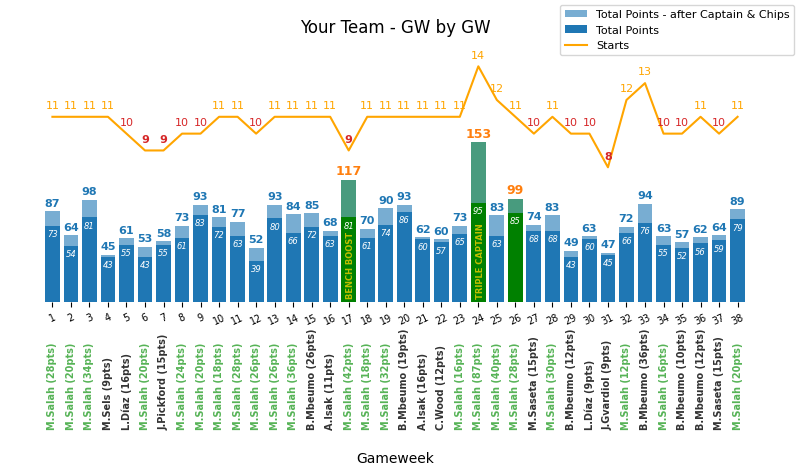

In [1964]:
# Create a mix bar chart (total_points)
fig, ax17 = plt.subplots(figsize=(8,5))
bars2 = ax17.bar(pivot_dream_team_gw["gw"], pivot_dream_team_gw["total_points_included_captain_and_chips"], label="Total Points - after Captain & Chips", align="center",color="tab:blue",alpha=0.6)
bars1 = ax17.bar(pivot_dream_team_gw["gw"], pivot_dream_team_gw["total_points"],label="Total Points",align="center",color="tab:blue")

ax17.set_title("Your Team - GW by GW")
ax17.set_xlabel("Gameweek",labelpad=90)
ax17.set_ylim(0,250)
ax17.grid(False)
ax17.set_yticks([])
ax17.set_xticks(pivot_dream_team_gw["gw"])
ax17.set_xticklabels(pivot_dream_team_gw["gw"],rotation=25, fontsize=7) 

# Create 2nd metric (starts)
ax18 = ax17.twinx()
ax18.plot(pivot_dream_team_gw["gw"], pivot_dream_team_gw["starts"], color="orange",label="Starts")
ax18.set_ylim(0,15.5)
ax18.set_yticks([])

# Highlight top 03 (total_points)
top3_gw = pivot_dream_team_gw.nlargest(3, "total_points_included_captain_and_chips")
ax17.bar(top3_gw["gw"], top3_gw["total_points_included_captain_and_chips"], color="green",alpha=0.4)
ax17.bar(top3_gw["gw"], top3_gw["total_points"], color="green")

# Add label for 1st metric and top 03
top3_gw_point = pivot_dream_team_gw.nlargest(3, "total_points_included_captain_and_chips")["gw"].tolist()
for bar1, bar2, gw, val1, val2 in zip(bars1, bars2, pivot_dream_team_gw["gw"], pivot_dream_team_gw["total_points"], pivot_dream_team_gw["total_points_included_captain_and_chips"]):
    if gw in top3_gw_point:
        ax17.text(bar2.get_x() + bar2.get_width()/2, val2+5, f"{int(val2)}", ha="center", fontsize=9, fontweight='semibold', color="tab:orange")
    else:
        ax17.text(bar2.get_x() + bar2.get_width()/2, val2+5, f"{int(val2)}", ha="center", fontsize=8, fontweight='bold', color="tab:blue")
    ax17.text(bar1.get_x() + bar1.get_width()/2, val1-10, f"{int(val1)}", ha="center", fontsize=6, style='italic', color='white')

# Add label for 2nd metric, highlight if < 11
for bar, gw, val in zip(bars1, pivot_dream_team_gw["gw"], pivot_dream_team_gw["starts"]):
    color = "tab:red" if val < 11 else "orange"
    fontweight = "bold" if val < 10 else 'normal'
    ax18.text(bar.get_x() + bar.get_width()/2, val+0.5, f"{int(val)}", ha="center", fontsize=8, color=color, fontweight = fontweight)

# Add label for triple_captain & bench_boost
for i, row in pivot_dream_team_gw.iterrows():
    x = row["gw"]
    y = row["total_points"]
    if row["triple_captain"] != "":
        ax17.text(x+0.1, 5, "TRIPLE CAPTAIN", ha="center", fontsize=6, color="y", fontweight="semibold", rotation=90)
    if row["bench_boost"] != "":
        ax17.text(x+0.1, 5, "BENCH BOOST", ha="center", fontsize=6, color="y", fontweight="semibold", rotation=90)

top_player_by_gw = (
    your_team_df_full_final[your_team_df_full_final["gw_played"] == 1]
    .sort_values("total_points_included_captain_and_chips", ascending=False)
    .groupby("gw")
    .first()
    .reset_index()[["gw", "name", "total_points_included_captain_and_chips"]]
.rename(columns={"total_points_included_captain_and_chips": "top_player_point", "name": "top_player_name"})
)

pivot_dream_team_gw2 = pivot_dream_team_gw.merge(top_player_by_gw, on="gw", how="left")

# Add label for Top player of the GW
for bar, name, point in zip(bars2, pivot_dream_team_gw2["top_player_name"].apply(shorten_name), pivot_dream_team_gw2["top_player_point"]):
    if pd.notna(name) and pd.notna(point):
        label = f"{name} ({int(point)}pts)"
        color = "tab:green" if name == "M.Salah" else "black"
        ax17.text(bar.get_x() + bar.get_width()/2, -120, label, ha="center", fontsize=7, rotation=90, color=color, alpha=0.8, fontweight="bold")

# Add legend
fig.legend(loc="upper right",fontsize=8)

sns.despine(bottom = True, left = True)
plt.tight_layout()
plt.show()


> ##### Performance Overview
> 1. **Consistent core performance**  
>    - The team maintained steady returns between **60–90 `total_points` per GW**, highlighting a well-balanced squad and reliable `captain` choices across the season.
> 2. **Chip - game changers**  
>    - **GW24 – `triple_captain`**: A standout GW with **153 `total_points`**, powered by **`M.Salah`’s 29 `total_points`** being tripled (87 pts alone), creating a huge spike.
>    - **GW17 – `bench_boost`**: Scored **117 points**, making full use of all 15 players although there were just 09 players started in the main line-up. It reflects strong bench planning, typically aligned with a Double GW.
>    - `chips` were used **when key players had multiple fixtures and good form**, maximizing gains
> 3. **Captaincy & `Salah`’s influence**  
>    - `M.Salah` was the **primary `captain` and top scorer**, delivering explosively in key GWs like **GW17 (42 `total_points`)**, **GW24 (87 `total_points`)** and **GW25 (40 `total_points`)**.   
>    His impact aligned well with `chip` deployment — maximizing return on investment.
> 4. **Low GWs – unavoidable**  
>    - GWs like **GW04, GW06, GW12, GW29** saw dips (~50 `total_points`/GW), mostly caused by tough fixtures or blank GWs.   
>    However, the overall trend stayed resilient.
> 5. **Stable `start`-ers**  
>    - The number of active `start`-ers remained between **10–11 most GWs**, rarely dropping to 09 — a sign of effective squad rotation, minimal injuries and careful transfer strategy.
> 6. **Squad depth & reliability**  
>    - `bench_boost` success in GW20 (15 bench `total_points`) shows the team had **depth beyond the starting XI**, a key competitive edge, especially during mid-season double GWs.
---

## 8.5. Your team **LINE-UP**

> ##### In this section, we take a closer look at <span style="background-color:#665c00; color:white;">how each player in our squad contributed over the GWs</span>.  
> - By breaking down the **`total_points` scored by individual players**, we can identify who consistently delivered, who peaked during key GWs and which assets underperformed.  
>
> - This insight not only highlights our best picks of the season but also helps inform smarter decisions for future transfers and chip strategies.

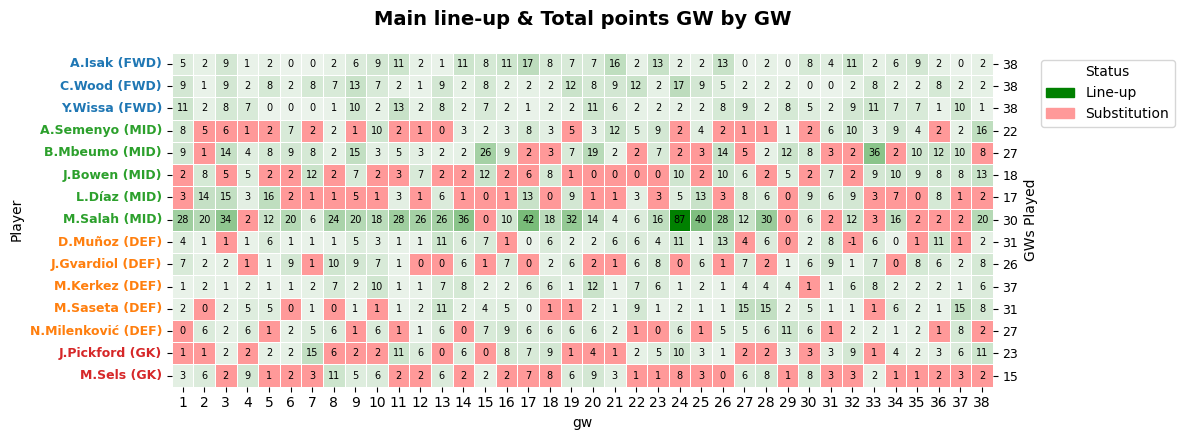

In [2602]:
# Re-name the player with short_name and position
your_team_df_full_final["short_name"] = your_team_df_full_final["name"].apply(shorten_name) + " (" + your_team_df_full_final["position"] + ")"

# Create a table of dream team players with metric of gw_played and total_points_included_captain_and_chips
agg_df = (
    your_team_df_full_final
    .groupby(["position", "short_name", "gw"], as_index=False)
    .agg({
        "gw_played": "max",
        "total_points_included_captain_and_chips": "sum"
    })
)

# Create a list of desired order for Position
position_order = ["FWD", "MID", "DEF", "GK"]

# Create a table for heatmap
heatmap_data = agg_df.pivot(index=["short_name","position"], columns="gw", values="gw_played").fillna(0).reset_index()       # Create a pivot table with metric of gw_played, replace NA = 0, reset index to be a normal table
heatmap_data["position"] = pd.Categorical(heatmap_data["position"], categories=position_order, ordered=True)                    # Apply position_order
heatmap_data = heatmap_data.sort_values(by="position", ascending=True).set_index("short_name").drop(columns=["position"])       # Sort by position_order & drop position column

# Create a table for label the total_points_included_captain_and_chips
points_data = agg_df.pivot(index=["short_name","position"], columns="gw", values="total_points_included_captain_and_chips").fillna(0).reset_index()        # Create a pivot table with metric of total_points_included_captain_and_chips, replace NA = 0, reset index to be a normal table       
points_data["position"] = pd.Categorical(points_data["position"], categories=position_order, ordered=True)                      # Apply position_order
points_data = points_data.sort_values(by="position", ascending=True).set_index("short_name").drop(columns=["position"])         # Sort by position_order & drop position column

# For heatmap color grading
heatmap_values = points_data.where(heatmap_data == 1, -1)                                                                       # Create heatmap values for color grading: if gw_played == 0 then value = -1 else points
max_points = int(points_data.max().max())                                                                                       # Find max points to apply for color
colors = ["#FF9999"] + sns.light_palette("green", n_colors=max_points + 1).as_hex()                                             # Create color frame from max points

# Prepare colormap for heatmap
from matplotlib.colors import ListedColormap
# cmap = ListedColormap(["#FF9999", "#228B22"])   # Color palete for heatmap
cmap = ListedColormap(colors)

# Create heatmap chart
plt.figure(figsize=(12, 4.5))
ax19 = sns.heatmap(
    heatmap_values,                                 # Use heatmap_values instead of heatmap_data
    cmap=cmap,
    linewidths=0.5,
    linecolor="white",
    cbar=False,
    annot=points_data.astype(int),
    fmt="d",
    annot_kws={"fontsize": 7, "color": "black", "va": "center"}
)

# Add Y-axis label
ax19.set_yticks([i + 0.5 for i in range(len(heatmap_data.index))])
ax19.set_yticklabels(heatmap_data.index, rotation=0, fontsize=9)

# Text color for Y-axis
position_colors = {
    "FWD": "#1f77b4",  # Blue
    "MID": "#2ca02c",  # Green
    "DEF": "#ff7f0e",  # Orange
    "GK":  "#d62728"   # Red
}
position_map = dict(zip(agg_df["short_name"], agg_df["position"]))      # Create dictionary
for tick_label in ax19.get_yticklabels():                                 # Assigt color for each tick label
    player_name = tick_label.get_text()
    player_position = position_map.get(player_name, "FWD")              # fallback FWD if missing
    tick_label.set_color(position_colors[player_position])
    tick_label.set_fontweight('bold')

# X-axis label
# ax.set_xticklabels(heatmap_values["gw"])

# Add manual legend
green_patch = mpatches.Patch(color="green", label="Line-up")
red_patch = mpatches.Patch(color="#FF9999", label="Substitution")
plt.legend(handles=[green_patch, red_patch],title="Status",bbox_to_anchor=(1.05, 1),loc='upper left')

# Add right Y-axis
total_match_played = heatmap_data.sum(axis=1).astype(int)
ax20 = ax19.twinx()
ax20.set_ylim(ax19.get_ylim())
ax20.set_yticks(ax19.get_yticks())
ax20.set_yticklabels(total_match_played, fontsize=9)
ax20.set_ylabel("GWs Played")

# Remove chart border
for _, spine in ax20.spines.items():
    spine.set_visible(False)

# Add title
plt.title("Main line-up & Total points GW by GW",fontsize=14, weight='bold', pad=20, ha='center')
plt.xlabel("Gameweek")
ax19.set_ylabel("Player")

plt.tight_layout()
plt.show()

> 1. The heatmap reveals that **`M.Salah`** was the cornerstone of our team, with **consistent starts** and **explosive returns** in key GWs — notably **GW03, 14, 17, 87, 25, 28** with 30 to 87 `total_points`.  
>
> 2. Among FWDs, **`A.Isak`**, **`Y. Wissa`** and **`C.Wood`** delivered moderately as they were always in the starting XI.
> 3. MIDs was generally productive, especially from **`B.Mbeumo`** *(notable spike in GW15)* and **`L.Díaz`** *(strong run on GW02-06)*. However, **`A.Semenyo`** was largely ineffective when started.
> 4. DEFs contribution was relatively low overall, with occasional `total_points` from **`D.Muñoz`** and **`M.Kerkez`**, while **`M.Saseta`** had frequent starts but limited returns.
> 5. GKs duties were shared, with **`J.Pickford`** being slightly more productive early on, but neither he nor **`M.Sels`** provided standout performances.

## 8.6. Your team **STATS**

> ##### In this section, we analyze the <span style="background-color: #665c00; font-weight: bold;">**season-long performance metrics**</span> of all players in our squad — focusing on **`total_points`**, **`value`**, **`goals`**, **`assists`** and **`selection` rates**.  
> - This comparison highlights who delivered consistently, who outperformed expectations and who underwhelmed — providing key insights into the <span style="background-color: #665c00; font-weight: bold;">**efficiency and impact**</span> of each squad member across the season.

In [2594]:
# Create a pivot table of each players of dream team
pivot_your_team = your_team_df_full_final.pivot_table(
     index = ["element","name","position","team"],
     values = ["total_points_included_captain_and_chips","assists","bonus","clean_sheets",
               "goals_scored","own_goals","saves","penalties_missed","penalties_saved","yellow_cards",
               "red_cards","minutes","selected","starts","ict_index","influence","creativity","threat"],
     aggfunc = sum
     ).sort_values(by="total_points_included_captain_and_chips", ascending=False).reset_index()

# Create a table to calculate average index
avg_index_your_team = your_team_df_full_final.groupby(["element","name","position","team"]).agg(
    total_points_sum=("total_points_included_captain_and_chips", "sum"),
    total_value_sum=("value", "sum"),
    total_minute_sum=("minutes", "sum"),
    total_selected_sum=("selected", "sum"),
    total_ict_sum=("ict_index", "sum"),
    total_influence_sum=("influence", "sum"),
    num_gw=("gw", "nunique"),                                   # Number of gw
    actual_played=("minutes", lambda x: (x > 0).sum())           # Minute > 0: Joined the match
)

# Add columns of average index
avg_index_your_team["avg_points"] = avg_index_your_team["total_points_sum"] / avg_index_your_team["num_gw"]
avg_index_your_team["avg_value"] = avg_index_your_team["total_value_sum"] / avg_index_your_team["num_gw"]
avg_index_your_team["avg_minute"] = avg_index_your_team["total_minute_sum"] / avg_index_your_team["num_gw"]
avg_index_your_team["avg_selected"] = avg_index_your_team["total_selected_sum"] / avg_index_your_team["num_gw"]
avg_index_your_team["avg_ict"] = avg_index_your_team["total_ict_sum"] / avg_index_your_team["num_gw"]
avg_index_your_team["avg_influence"] = avg_index_your_team["total_influence_sum"] / avg_index_your_team["num_gw"]
avg_index_your_team = avg_index_your_team[["avg_points","avg_value","avg_minute","avg_selected","avg_ict","avg_influence","num_gw"]].reset_index()

# Merge 2 tables
pivot_your_team = pivot_your_team.merge(avg_index_your_team, on=["element","name","position","team"])

# Apply desired order to "position"
pivot_your_team["position"] = pd.Categorical(
    pivot_your_team["position"],
    categories=position_order,
    ordered=True
)

# Sort by position and total_poins
pivot_your_team = pivot_your_team.sort_values(by=["position","total_points_included_captain_and_chips"], ascending=[True, False]) 

# Get numeric columns
numeric_cols10 = pivot_your_team.select_dtypes(include="number").columns.drop(["avg_value","avg_points"])

# Format numeric columns
pivot_your_team[numeric_cols10] = pivot_your_team[numeric_cols10].applymap(lambda x: "" if x == 0 or pd.isna(x) else f"{x:,.0f}")
pivot_your_team

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2907094835.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2907094835.py:48: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,element,name,position,team,assists,bonus,clean_sheets,creativity,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,starts,threat,total_points_included_captain_and_chips,yellow_cards,avg_points,avg_value,avg_minute,avg_selected,avg_ict,avg_influence,num_gw
2,401,Alexander Isak,FWD,Newcastle,6,36,12,573,23,293,"1,043","2,758",,,,,,"182,064,579",34,"1,320",213,1,6,9,73,"4,791,173",8,27,38
3,447,Chris Wood,FWD,Nott'm Forest,3,41,15,320,20,206,838,"2,958",,,,,,"112,518,335",35,900,200,1,5,7,78,"2,961,009",5,22,38
5,110,Yoane Wissa,FWD,Brentford,6,32,9,400,18,242,849,"2,921",,,,,,"45,055,267",34,"1,181",185,5,5,6,77,"1,185,665",6,22,38
0,328,Mohamed Salah,MID,Liverpool,18,55,15,"1,199",29,476,"1,577","3,374",,,,,,"254,065,676",38,"1,985",704,1,19,13,89,"6,685,939",13,42,38
1,99,Bryan Mbeumo,MID,Brentford,9,29,9,"1,108",20,341,"1,237","3,415",,1,,,,"133,925,307",38,"1,060",291,3,8,8,90,"3,524,350",9,33,38
4,514,Jarrod Bowen,MID,West Ham,11,21,8,738,13,272,903,"2,974",,,,,,"29,645,346",34,"1,081",193,1,5,7,78,"780,141",7,24,38
6,327,Luis Díaz,MID,Liverpool,7,21,15,748,13,246,771,"2,393",,,,,,"81,913,191",28,946,183,2,5,8,63,"2,155,610",6,20,38
7,78,Antoine Semenyo,MID,Bournemouth,7,14,11,689,11,268,792,"3,202",,,,,,"30,299,623",36,"1,204",165,9,4,6,84,"797,358",7,21,38
9,350,Joško Gvardiol,DEF,Man City,,15,13,502,5,185,847,"3,278",,,,,,"110,644,827",36,497,153,2,4,6,86,"2,911,706",5,22,38
11,573,Nikola Milenković,DEF,Nott'm Forest,2,2,13,108,5,127,805,"3,330",,,,,,"28,765,829",37,361,145,4,4,5,88,"756,996",3,21,38


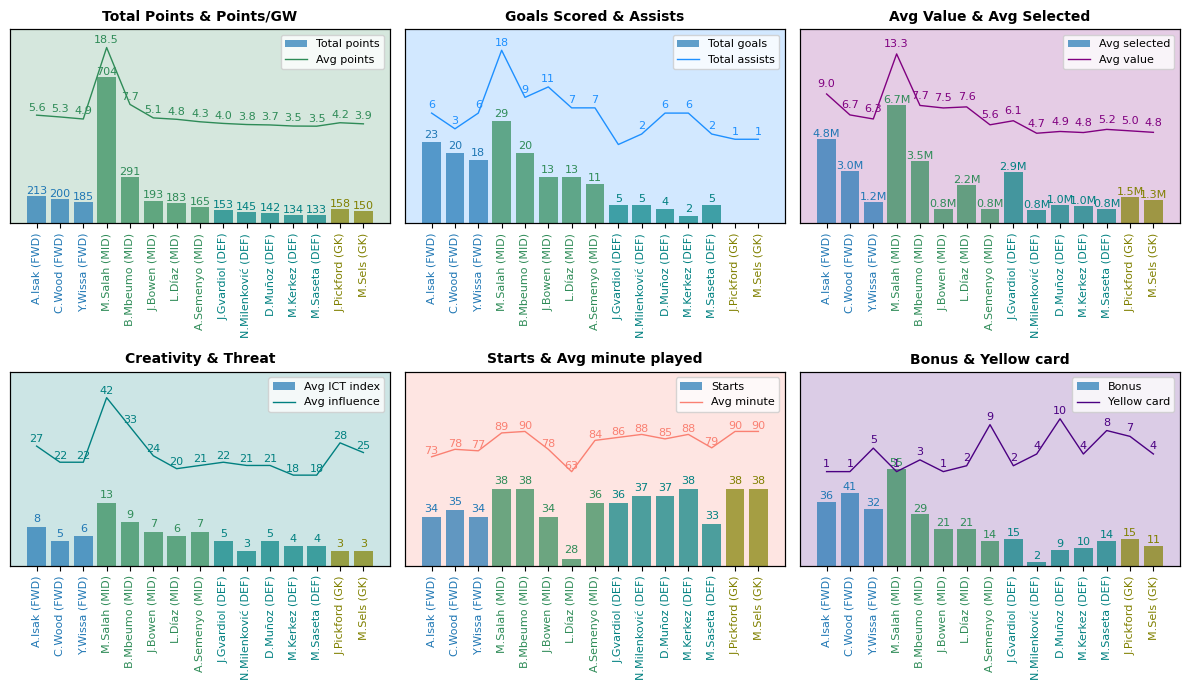

In [2619]:
# Cast cols to visualize to float
cols_to_convert = [
    "total_points_included_captain_and_chips", "avg_points",
    "goals_scored", "assists",
    "avg_value", "avg_selected",
    "avg_ict", "avg_influence",
    "starts", "avg_minute",
     "bonus", "yellow_cards"
]
for col in cols_to_convert:
    pivot_your_team[col] = pivot_your_team[col].replace(",", "", regex=True).replace("", "0").astype(float)

# Create 2x3 supblot 
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
axs = axs.flatten()

# Create each chart in suplot
charts = [
    ("total_points_included_captain_and_chips", "avg_points", "seagreen", "Total Points & Points/GW", (100, 900), (-15, 22), "Total points", "Avg points"),
    ("goals_scored", "assists", "dodgerblue", "Goals Scored & Assists", (0, 55), (-15, 22), "Total goals", "Total assists" ),
    ( "avg_selected", "avg_value", "purple", "Avg Value & Avg Selected", (0, 11000000), (-5, 16), "Avg selected", "Avg value"),
    ("avg_ict", "avg_influence", "teal", "Creativity & Threat", (0, 40), (-10, 50), "Avg ICT index", "Avg influence"),
    ("starts", "avg_minute", "salmon", "Starts & Avg minute played", (27, 55), (0, 130), "Starts", "Avg minute"),
    ("bonus", "yellow_cards", "indigo", "Bonus & Yellow card", (0, 110), (-15, 18), "Bonus", "Yellow card"),
]

from matplotlib.colors import to_rgba
# Draw each chart manually
for i, (col1, col2, color1, title, ylim1, ylim2, label1, label2) in enumerate(charts):
    ax1 = axs[i]
    ax2 = ax1.twinx()

    # Declare x, y axis
    x = pivot_your_team["name"].apply(shorten_name) + " (" + pivot_your_team["position"].astype(str) + ")"
    y1 = pivot_your_team[col1]
    y2 = pivot_your_team[col2]

    # Add different colors for each "position"
    position_colors = {
        "FWD": "tab:blue",
        "MID": "seagreen",
        "DEF": "teal",
        "GK":  "olive"
    }


    # Create bars and color for bars with each "position"
    # bars = ax1.bar(x, y1, color=color1, alpha=0.7, label=label1)
    bars = []
    for idx, (x_label, y_val) in enumerate(zip(x, y1)):
        position = pivot_your_team.iloc[idx]["position"]
        color = position_colors.get(position, "#1f77b4")                                                # fallback color
        bar = ax1.bar(x_label, y_val, color=color, alpha=0.7, label=label1 if idx == 0 else None)
        bars.append(bar[0])
    line = ax2.plot(x, y2, color=color1, linewidth=1, label=label2)

    # Add value labels to bars
    for idx, (bar, x_label, y_val) in enumerate(zip(bars, x, y1)):
        height = bar.get_height()
        if height > 0:
            if title == "Avg Value & Avg Selected":
                label_text = f'{height / 1_000_000:.1f}M'
            else:
                label_text = f'{height:,.0f}'
            position = pivot_your_team.iloc[idx]["position"]
            color = position_colors.get(position, "#1f77b4")
            ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label_text, ha='center', va='bottom', fontsize=8, color=color)

    # Add value labels to line
    for j, val in enumerate(y2):
        if val > 0:
            if title in ("Avg Value & Avg Selected","Total Points & Points/GW"):
                label_text = f'{val:.1f}'
            else:
                label_text = f'{val:.0f}'  # No decimal
            ax2.text(j, val + 0.5, label_text, ha='center', va='bottom', fontsize=8, color=color1)
    # Add color of each "position" to x-axis

    for idx, tick_label in enumerate(ax1.get_xticklabels()):
        position = pivot_your_team.iloc[idx]["position"]
        tick_color = position_colors.get(position, "#1f77b4")
        tick_label.set_color(tick_color)

    # Add background color for each chart
    ax1.set_facecolor(to_rgba(color1, alpha=0.2))       # Using matplotlib.colors.to_rgba to lighten color

    ax1.set_xticklabels(x, rotation=90, fontsize=8)
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)
    ax1.set_title(title, fontsize=10, fontweight="bold")

    ax1.set_yticks([])
    ax2.set_yticks([])
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    
    # Create legend manually
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=8)

fig.tight_layout()
plt.show()


> ##### Each chart offers valuable insight into different aspects of the players' impact throughout the season.
> 1. **`Total_points` & `Avg_points per GW`**
>
>    - **MIDs** dominate in both `total_points` and `avg_points`, especially `M.Salah` *(704 pts, 18.5 avg)* thanks to `captaincy`, and `B.Mbeumo` *(291 pts, 7.7 avg)*.
>    - **FWDs** like `Y.Wissa` *(avg 185 but few GWs)* and `A.Isak` *(213 pts)* also provide strong returns but vary more in consistency.
>    - **DEFs** and **GKs** lag significantly with `total_points` mostly under 160 and `avg_points` < 4.0.
> 2. **`Goals_scored` & `Assists`**
>
>    - Clear gap: **MIDs** lead again with both high goals and assists (outstanding `M.Salah` with 29 goals and 18 assists, followed by `B.Mbeumo` with 13 goals and 11 assists)
>    - **FWDs** like `A.Isak` *(23 goals & 6 assists)* provide strong goal output but less creative contribution.
>    - **DEFs** and **GKs** offer minimal goal involvement *(max 5-6 goals & assists)*, confirming limited attacking threat from backline.
> 3. **`Avg_value` & `Avg_selected`**
>
>    - **MIDs** have both high value *(from 6.1M to 13.3M, exceptional amazing `L.Diaz` at 5.6M)* and ownership — trusted assets.
>    - **FWDs** show **moderate value (£6.3–£9.0M)** but **higher selection rates** *(`avg_selected` 1.2-4.8M)*, suggesting they are viewed as cost-efficient options.
>    - **DEFs** and **GKs** form the budget core: Their `avg_value` stays low *(4.7M–5.2M)*, while `avg_selected` is also low *(< 1.0M selections)*, except for `J.Gvardiol` (2.9M selections)—likely due to his amazing last-season performance.
>    - ➡️➡️ The contrast highlights that FPL managers are more willing to invest and trust in **attacking roles**, especially **MID**, while **DEF/GK** are typically used to save funds.
> 4. **`ICT index` & `influence`**
>
>    - **MIDs** clearly lead in both `ict_index` and `influence`, driven by their all-around impact: creativity, threat and involvement in key plays. `M.Salah` and `B.Mbeumo` dominate these stats.
>    - **FWDs** show strong **`threat`**, contributing to solid `ict_index`, but fall short on **`influence`** compared to MIDs — highlighting their more narrow attacking role.
>    - **DEFs** have low `ict_index` and `influence` values, reflecting minimal contributions in creative and attacking phases. On the other hands, **GKs** having a really good `influence`.
>    - ➡️➡️ These metrics reinforce the importance of **MID-heavy strategies** in FPL — they not only score but also consistently influence matches.
> 5. **`Starts` & `Avg_minutes_played`**
>
>    - **GKs** and **DEFs** are most reliable for starts *(90 mins consistently)*.
>    - **MIDs** also offer stable minutes, though some like `L.Diaz` are more rotation-prone *(just 28/38 starts and 63 mins played per match)*.
>    - **FWDs** are the **least stable**, starting only **34–35/38 matches** and averaging **73–77 mins/game**. This likely reflects a common team strategy: Substitute FWDs in the final 15 minutes—especially when leading—to protect the result and manage players' fitness across fixtures.
> 6. **`Bonus` & `Yellow_cards`**
>
>    - **MIDs** earn the most `bonus` points *(`M.Salah`: 55, `B.Mbeumo`: 32)*, rewarded for key attacking contributions like `goals_scored`, `assists` and overall influence.
>    - **FWDs** also gain high bonuses thanks to goal involvement.
>    - **DEFs** and **GKs** contribute very little in bonuses (mostly <15), as their actions are less frequently rewarded by the BPS (Bonus Point System of FPL).
>    - **`Yellow_cards`** are most common among **DEFs**, reflecting frequent challenges and defensive duties. **MIDs** and **FWDs** accumulate fewer cards, likely due to their offensive roles *(except `A.Semeyo` with aggressively 09 `yellow_card`)*, and **GKs** also have low card counts.
>
> ##### **➡️➡️ <span style="background-color: #665c00; font-weight: bold;">Overall takeaways</span>**  
> - **`M.Salah` and `B.Mbeumo`** were the **standout MIDs** in terms of overall impact.  
> - **`A.Isak` and `Y.Wissa`** delivered efficiently up front — `Y.Wissa` especially in terms of explosive value.  
> - The **defensive unit** was solid but unspectacular, with a lack of attacking returns.  
> - **GKs were reliable**, but not game-changers.


# 9. Build a **PERFECT TEAM** automatically *( *** pending...)*

## 9.1. **PLAN** to build an **AUTOMATED** GW-by-GW team

> **1. Squad initialization (GW01)**
> - Select squad's 15 players: Players that have the highest `total_points` of each position of last season
> - Total `value` < 100
> - Formation constraints 1-5-5-3
>
> **2. Gameweek looping logic (GW02 to GW38)**
> For each upcoming GW:
> **2.1. Update player performance:**
>      - Filter the dataset by current `gw`
>      - Use CURRENT FORM: weighted average of last 3–5 GWs for metrics like: `total_points`, `goals_scored`, `assists`, `bonus`
> - **2.2. Select starting XI:**
>      - Pick 11 players that: <span style="background-color: #665c00; font-weight: bold;">HAVE GOOD CURRENT FORM</span> (High `avg_points` | >5 pts/match; Stable `starts` | >70% matches;  Stable `minutes` | >80 minutes played)
>      - Respect formation constraints <span style="background-color: #665c00; font-weight: bold;">1-4-3-3</span>
>      - Apply <span style="background-color: #665c00; font-weight: bold;">fixture context</span>: `was_home`, `opponent_team` (Should be aware when `opponent_team` is in Big 6)
>      - Bench 04 players (remained players)
> - **2.3. Choose `captain` & `vice-captain`**
>      - `captain` = player that: is <span style="background-color: #665c00; font-weight: bold;">THE HIGHEST TOTAL_POINTS OF LAST SEASON</span> or <span style="background-color: #665c00; font-weight: bold;">TOP 03 CURRENT TOTAL_POINTS</span>
>      - `vice_captain` = player that: is <span style="background-color: #665c00; font-weight: bold;">THE 2nd HIGHEST TOTAL_POINTS OF LAST SEASON</span> or <span style="background-color: #665c00; font-weight: bold;">TOP 05 CURRENT TOTAL_POINTS<span>
> - **2.4. Make 01 transfer (optional)**
>      - Identify the weakest player that: have <span style="background-color: #665c00; font-weight: bold;">LOW CURRENT FORM</span> *(low `avg_points` | <5 pts/match; unstable `starts` | <70% matches;  Unstable `minutes` | >80 minutes played)* and <span style="background-color: #665c00; font-weight: bold;">POOR FIXTURE AHEAD</span> *(`opponent_team` is in Big 6)*
>      - Replace with player that: <span style="background-color: #665c00; font-weight: bold;">SAME POSITION; NOT EXCEEDING BUDGET; Repects the 3-player-per-team limit; GOOD CURRENT FORM, GOOD FIXTURE AHEAD</span>
> - **2.5. Apply chips logic**
>      - Use `bench_boost` when 04 benched players: have <span style="background-color: #665c00; font-weight: bold;">GOOD CURRENT FORM</span> (*`avg_points` > 4*)
>      - Use `triple_captain` when the `captain`: haves <span style="background-color: #665c00; font-weight: bold;">THE 1st DOUBLE GW</span> *(`count_of_fixture` > 1)*
>      - Use `free_hit` when there are many players: have <span style="background-color: #665c00; font-weight: bold;">BLANK FOR NEXT GW</span> *(> 30% of players)*
>           - Replace players that: <span style="background-color: #665c00; font-weight: bold;">HAVE BLANK FOR NEXT GW</span>
>           - Replace with players that: <span style="background-color: #665c00; font-weight: bold;">SAME POSITION; NOT EXCEEDING BUDGET; Repects the 3-player-per-team limit; GOOD CURRENT FORM, GOOD FIXTURE AHEAD</span>
>      - Use `wildcard` when: <span style="background-color: #665c00; font-weight: bold;">TOTAL_POINTS AFTER SEVERAL GWs IS LOW</span> *(avg `total_points` < 40)*
>           - Replace players that: <span style="background-color: #665c00; font-weight: bold;">HAVE POOR CURRENT FORM</span>
>           - Replace with players that: <span style="background-color: #665c00; font-weight: bold;">SAME POSITION; NOT EXCEEDING BUDGET; Repects the 3-player-per-team limit; GOOD CURRENT FORM, GOOD FIXTURE AHEAD</span>
>
> **3. Budget and value tracking**
> - Update team budget each GW:
>    - If player prices fluctuate, apply selling value logic (50% of price rise gained)
>    - Track team total `value`
>
> **4. Output table**
>    - GW-by-GW table:   
>
>         - 1-4. **Match info**: GW, Fixture, Opponent_team, Was_home   
>
>         - 5-9. **Player info**: Element, Name, Team, Position, Value   
>         - 10-24. **Performance index**: Total_points, Goals_scored, Assists, Bonus, Clean_sheets, Creativity, Own_goals, Saves, Penalties_saved, Penalties_missed, Yellow_cards, Red_cards, Minutes, Starts, Threat   
>         - 25-32. **Play info** (value = 1 or 0): Starting_xi, New_transfered, Captain, Vice_captain, Triple_captain, Bench_boost, Free_hit, Wildcard   
>         - 33 . **Final points including captain & chips**: Final_total_point   
>    - Our Team table:   
>         - 1-4. **Match info**: GW, Fixture, Opponent_team, Was_home   
>
>         - 5-7. **Team info**: Total_value, No_of_transfers, No_of_starting_xi   
>         - 8-22. **Performance index**: Total_points, Goals_scored, Assists, Bonus, Clean_sheets, Creativity, Own_goals, Saves, Penalties_saved, Penalties_missed, Yellow_cards, Red_cards, Minutes, Starts, Threat   
>         - 23-28. **Play info** (value = 1 or 0): Captain, Vice_captain, Triple_captain, Bench_boost, Free_hit, Wildcard   
>         - 29 . **Total final points including captain & chips**: Final_total_point
---

## 9.2. **MODEL BUILDING**

### 9.2.1. **Squad initialization** (GW01)

In [2501]:
your_perfect_team = df[
    (df["gw"] == 1) & 
    (df["element"].isin(your_team["element"].unique()))
]
your_perfect_team["name"] = your_perfect_team["name"].apply(shorten_name)
your_perfect_team = your_perfect_team[["gw", "fixture", "opponent_team", "was_home", "element", "name", "team", "position", "value",
                                     "total_points", "goals_scored", "assists", "bonus", "clean_sheets", "own_goals", "saves", "penalties_saved", "penalties_missed", "yellow_cards", "red_cards", "ict_index", "influence", "creativity", "threat", "minutes", "starts"]]
def select_starting_xi(group):
    selected = pd.DataFrame()
    # GK (max 1)
    gk = group[group["position"] == "GK"].nlargest(1, "total_points")
    selected = pd.concat([selected, gk])
    # DEF (max 4)
    def_ = group[group["position"] == "DEF"].nlargest(4, "total_points")
    selected = pd.concat([selected, def_])
    # MID (max 3)
    mid = group[group["position"] == "MID"].nlargest(3, "total_points")
    selected = pd.concat([selected, mid])
    # FWD (max 3)
    fwd = group[group["position"] == "FWD"].nlargest(3, "total_points")
    selected = pd.concat([selected, fwd])
    # If >= 11 players (due to full of each Position) then get the top 11 players
    selected = selected.nlargest(11, "total_points")
    # Create a match_played columns = 1 for line-up players
    selected["starting_xi"] = 1
    return selected

starting_xi_gw_1 = select_starting_xi(your_perfect_team)
your_perfect_team = pd.merge(your_perfect_team, starting_xi_gw_1[["element", "gw", "fixture", "starting_xi"]], on=["element", "gw", "fixture"], how="left")
your_perfect_team["starting_xi"] = your_perfect_team["starting_xi"].fillna(0)

your_perfect_team

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1423/2060648762.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gw,fixture,opponent_team,was_home,element,name,team,position,value,total_points,goals_scored,assists,bonus,clean_sheets,own_goals,saves,penalties_saved,penalties_missed,yellow_cards,red_cards,ict_index,influence,creativity,threat,minutes,starts,starting_xi
0,1,6,3,True,447,C.Wood,Nott'm Forest,FWD,6,9,1,0,3,1,0,0,0,0,0,0,6,32,6,21,71,1,1
1,1,6,16,False,70,M.Kerkez,Bournemouth,DEF,4,1,0,0,0,0,0,0,0,0,1,0,3,12,13,2,90,1,1
2,1,5,17,True,401,A.Isak,Newcastle,FWD,8,5,0,1,0,1,0,0,0,0,0,0,4,26,11,6,90,1,1
3,1,9,6,False,350,J.Gvardiol,Man City,DEF,6,7,0,0,1,1,0,0,0,0,0,0,3,23,3,5,90,1,1
4,1,8,7,True,110,Y.Wissa,Brentford,FWD,6,11,1,1,3,0,0,0,0,0,1,0,11,50,14,44,83,1,1
5,1,7,2,True,514,J.Bowen,West Ham,MID,8,2,0,0,0,0,0,0,0,0,0,0,2,5,17,2,72,1,0
6,1,4,10,False,328,M.Salah,Liverpool,MID,12,14,1,1,3,1,0,0,0,0,0,0,15,58,24,70,90,1,1
7,1,6,3,True,573,N.Milenković,Nott'm Forest,DEF,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,6,16,False,78,A.Semenyo,Bournemouth,MID,6,8,1,0,1,0,0,0,0,0,0,0,10,39,7,53,90,1,1
9,1,9,13,True,163,M.Saseta,Chelsea,DEF,5,2,0,0,0,0,0,0,0,0,0,0,2,18,4,2,79,1,1


### 9.2.2. **GW looping** (GW02 to GW38)

In [2502]:
def transfer_one_player(df, your_perfect_team, current_gw=1):
    # 1. prepare columns
    allowed_cols = set(your_perfect_team.columns)
    # Copy current gw
    current_team = your_perfect_team[your_perfect_team["gw"] == current_gw].copy()
    # Add new columns if there isnt any
    if "new_transfer" not in current_team.columns:
        current_team["new_transfer"] = 0
    if "next_transfer" not in current_team.columns:
        current_team["next_transfer"] = 0

    # 2. Get the player to be sub-out
    out_player = current_team.nsmallest(1, "total_points").iloc[0]
    out_element = out_player["element"]
    out_position = out_player["position"]
    out_value = out_player["value"]
    # Label the player by next_transfer = 1
    your_perfect_team.loc[
        (your_perfect_team["gw"] == current_gw) & 
        (your_perfect_team["element"] == out_element), 
        "next_transfer"
    ] = 1

    # 3. Get the sub-in player
    next_gw = current_gw + 1
    candidates = df[
        (df["gw"] == next_gw) &
        (df["position"] == out_position) &
        (df["value"] <= out_value) &
        (~df["element"].isin(current_team["element"]))  # Not duplicated
    ].copy()
    candidates["new_transfer"] = 0              

    if candidates.empty:
        print("No suitable players found.")
        current_team["gw"] = next_gw
        return pd.concat([your_perfect_team, current_team], ignore_index=True)
    # Remove columns that not in your_perfect_team
    candidates = candidates[[col for col in candidates.columns if col in allowed_cols]]
    # Get the highest total_points players
    in_player = candidates.nlargest(1, "total_points").iloc[0]
    new_row = in_player.copy()
    new_row["new_transfer"] = 1
    new_row["next_transfer"] = 0
    new_row["gw"] = next_gw

    # 4. Create a team for GW02
    remaining_team = current_team[current_team["element"] != out_element].copy()
    remaining_team["gw"] = next_gw
    gw2_team = pd.concat([remaining_team, pd.DataFrame([new_row])], ignore_index=True)

    # 5. Merge to the table
    updated_team = pd.concat([your_perfect_team, gw2_team], ignore_index=True)

    return updated_team

your_perfect_team = transfer_one_player(df, your_perfect_team, current_gw=1)
your_perfect_team = your_perfect_team.fillna(0)

your_perfect_team

,gw,fixture,opponent_team,was_home,element,name,team,position,value,total_points,goals_scored,assists,bonus,clean_sheets,own_goals,saves,penalties_saved,penalties_missed,yellow_cards,red_cards,ict_index,influence,creativity,threat,minutes,starts,starting_xi,next_transfer,new_transfer
0,1,6,3,True,447,C.Wood,Nott'm Forest,FWD,6,9,1,0,3,1,0,0,0,0,0,0,6,32,6,21,71,1,1,0,0
1,1,6,16,False,70,M.Kerkez,Bournemouth,DEF,4,1,0,0,0,0,0,0,0,0,1,0,3,12,13,2,90,1,1,0,0
2,1,5,17,True,401,A.Isak,Newcastle,FWD,8,5,0,1,0,1,0,0,0,0,0,0,4,26,11,6,90,1,1,0,0
3,1,9,6,False,350,J.Gvardiol,Man City,DEF,6,7,0,0,1,1,0,0,0,0,0,0,3,23,3,5,90,1,1,0,0
4,1,8,7,True,110,Y.Wissa,Brentford,FWD,6,11,1,1,3,0,0,0,0,0,1,0,11,50,14,44,83,1,1,0,0
5,1,7,2,True,514,J.Bowen,West Ham,MID,8,2,0,0,0,0,0,0,0,0,0,0,2,5,17,2,72,1,0,0,0
6,1,4,10,False,328,M.Salah,Liverpool,MID,12,14,1,1,3,1,0,0,0,0,0,0,15,58,24,70,90,1,1,0,0
7,1,6,3,True,573,N.Milenković,Nott'm Forest,DEF,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1,6,16,False,78,A.Semenyo,Bournemouth,MID,6,8,1,0,1,0,0,0,0,0,0,0,10,39,7,53,90,1,1,0,0
9,1,9,13,True,163,M.Saseta,Chelsea,DEF,5,2,0,0,0,0,0,0,0,0,0,0,2,18,4,2,79,1,1,0,0


#### 8.3.2.+ **Team overall tracking**

In [2506]:
your_perfect_team["actual_play_starting_xi"] = ((your_perfect_team["starting_xi"] == 1) & (your_perfect_team["minutes"] > 0)).astype(int)

your_perfect_team_OVERALL = your_perfect_team.groupby(["gw"]).agg(
     starting_xi=("starting_xi","sum"),
     total_value=("value","sum"),
     total_points=("total_points","sum"),
     goals_scored=("goals_scored","sum"),
     assists=("assists","sum"),
     bonus=("bonus","sum"),
     clean_sheets=("clean_sheets","sum"),
     ict_index=("ict_index","sum"),
     influence=("influence","sum"),
     creativity=("creativity","sum"),
     threat=("threat","sum"),
     own_goals=("own_goals","sum"),
     saves=("saves","sum"),
     penalties_saved=("penalties_saved","sum"),
     penalties_missed=("penalties_missed","sum"),
     yellow_cards=("yellow_cards","sum"),
     red_cards=("red_cards","sum"),
     starts=("starts","sum"),
     actual_played_players=("actual_play_starting_xi","sum"),
     next_transfer=("next_transfer","sum"),
     new_transfer=("new_transfer","sum")
)
your_perfect_team_OVERALL = your_perfect_team_OVERALL[["starting_xi","actual_played_players","total_value","total_points", "goals_scored", "assists", "bonus", "clean_sheets", "creativity", "own_goals", "saves", "penalties_saved", "penalties_missed", "yellow_cards", "red_cards", "starts", "threat", "next_transfer", "new_transfer"]]
your_perfect_team_OVERALL

,starting_xi,actual_played_players,total_value,total_points,goals_scored,assists,bonus,clean_sheets,creativity,own_goals,saves,penalties_saved,penalties_missed,yellow_cards,red_cards,starts,threat,next_transfer,new_transfer
gw,,,,,,,,,,,,,,,,,,,
1,11,11,95,79,5,4,13,5,199,0,5,0,0,2,0,14,259,1,0
2,11,11,95,91,5,5,16,6,220,0,5,0,0,2,0,15,263,0,1


** *Pending* **

---
# *** **THE END** ***